# EDA of Lending Club Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 200)

In [3]:
plt.rcParams["figure.figsize"] = (20,6)

In [4]:
## Loading the csv as data frame

df = pd.read_csv('loan.csv')
print(df.shape)
df.head()

(39717, 111)


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- Data is of share 39717 rows and 111 columns
- Data does contain "NANs" will have to be inspected for missing values
- `loan_status` is the target variable that tell us whether the current loan is paid back or charged off or still running
- Since we are interested in understanding the factors that has strong association with loan repayment or default, we can igone the data related to `loan_status` = `'Current'`
- 1140 records will be droped

### Selecting data that is relevent for the analysis

In [6]:
## subsetting the data for analysis

df1 = df[df['loan_status']!='Current']
print(df1.shape)

(38577, 111)


### Checking for duplicate records

- there are two identifier columns `id` and `member_id`, will use these columns to check for presence of any duplicate records

In [7]:
df1.duplicated('id').sum()

0

In [8]:
df1.duplicated('member_id').sum()

0

- There are no duplicate records based on the `id` and `member_id` columns
- The columns `id` and `member_id` adds no value to the analysis and will be droped

In [9]:
df1.drop(columns=['id', 'member_id'], inplace=True)
print(df1.shape)

(38577, 109)


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Inspecting for missing values

#### checking row wise missing data

In [10]:
df1.isna().sum(axis = 1)*100/df1.shape[1]

0        53.211009
1        52.293578
2        54.128440
3        51.376147
5        53.211009
           ...    
39712    54.128440
39713    54.128440
39714    55.963303
39715    55.963303
39716    54.128440
Length: 38577, dtype: float64

In [11]:
df1[df1.isna().sum(axis = 1)*100/df1.shape[1]>=20].shape

(38577, 109)

- It has been observed that there are lot of missing values in each rows, that indicates there may be columns with lot of missing values
- We will analyse the column wise missing data to decide on these records

#### checking column wise missing data

In [12]:
df1.info(max_cols=df.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 109 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    loan_amnt                       38577 non-null  int64  
 1    funded_amnt                     38577 non-null  int64  
 2    funded_amnt_inv                 38577 non-null  float64
 3    term                            38577 non-null  object 
 4    int_rate                        38577 non-null  object 
 5    installment                     38577 non-null  float64
 6    grade                           38577 non-null  object 
 7    sub_grade                       38577 non-null  object 
 8    emp_title                       36191 non-null  object 
 9    emp_length                      37544 non-null  object 
 10   home_ownership                  38577 non-null  object 
 11   annual_inc                      38577 non-null  float64
 12   verification_sta

In [13]:
## Checking the propotion of missing values in each column

df1.isna().sum()*100/df1.shape[0]

loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.472717
purpose                             0.000000
title                               0.028514
zip_code                            0.000000
addr_state                          0.000000
dti       

- As we can see, there are quite a few columns with 100% missing values
- We will discard all the columns with more than 20% missing values, as imputing 20% or more values could add bias to the data

In [14]:
## Checking columns with more than 20% of missing data

missing20p_cols = df1.columns[np.where(df1.isna().sum()*100/df1.shape[0]>=20)].tolist()

In [15]:
## following columns have more than 20% of data missing
print("There are {} columns have more than 20% of data missing \n".format(len(missing20p_cols)))
print(missing20p_cols)

There are 58 columns have more than 20% of data missing 

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_t

- There are 58 columns out of 109 have 20% or more missing data
- We assume it would be safer to remove these columns from analysis
- Columns with less than 20% of data missing will be considered for missing value imputation after further analysis

In [16]:
### droping columns with 20% or more missing values 

df1 = df1.drop(columns = missing20p_cols)
print(df1.shape)

(38577, 51)


In [17]:
## columns having <20% missing values

missing_cols = df1.columns[df1.isna().sum()*100/df1.shape[0]>0].tolist()
missing_cols

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

- Above columns have less than 20% missing values
- These columns will be furhter analysed for applying appropriate missing value treatments

In [18]:
df1[missing_cols].isna().sum()

emp_title                     2386
emp_length                    1033
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [19]:
df1[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   36191 non-null  object 
 1   emp_length                  37544 non-null  object 
 2   title                       38566 non-null  object 
 3   revol_util                  38527 non-null  object 
 4   last_pymnt_d                38506 non-null  object 
 5   last_credit_pull_d          38575 non-null  object 
 6   collections_12_mths_ex_med  38521 non-null  float64
 7   chargeoff_within_12_mths    38521 non-null  float64
 8   pub_rec_bankruptcies        37880 non-null  float64
 9   tax_liens                   38538 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.2+ MB


**Analysing column 'emp_title'**

In [20]:
## Analysing column 'emp_title'

print("Number of missing values : ", df1.emp_title.isna().sum())
df1.emp_title.value_counts()

Number of missing values :  2386


US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

- `'emp_title'`, represents - The job title supplied by the Borrower when applying for the loan. 
- it has non standard vlaues, that means `high cardinality`, **28820 unique values**
- it is observed column 'emp_title' has `2386 (6.19%) data points missing`
- As we understand high cardinality does not add any value to the analysis hence we have choosen to **drop** this variable 

**Analysing column 'emp_length'**

In [21]:
## Analysing column 'emp_length'

print("Number of missing values : ",df1['emp_length'].isna().sum())
df1.emp_length.value_counts()

Number of missing values :  1033


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

- `'emp_length'` indicates - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- it is observed column 'emp_length' has 1033 data points missing (2.7%)
- has  11 distinctive categories, '10+ years' class has the highest frequency 
- '10+ years' class will be used to impute the missing values in this variable

In [22]:
## replacing missing values with '10+ years' value

df1['emp_length'] = df1['emp_length'].fillna('10+ years')
print(df1['emp_length'].isna().sum())

0


**Analysing column 'title'**

In [23]:
## Analysing column 'title'

print("Number of missing values : ",df1.title.isna().sum())
df1.title.value_counts()

Number of missing values :  11


Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

- `'title'`, represents - The loan title provided by the borrower
- it has non standard vlaues, that means `high cardinality`, **19297 unique values**
- though it has less missing values (11), we will **drop** this varaible due to high cardinality

**Analysing column 'revol_util'**

In [24]:
## Analysing column 'revol_util'

print("Number of missing values : ",df1.revol_util.isna().sum())
df1.revol_util.value_counts()

Number of missing values :  50


0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

- `'revol_util'` stands for Revolving line utilization rate, is expressed as percentage of credit amount used relative to available revolving credit limit. 
- data to be cleaned for `"%"` and to be converted to float
- missing values (50 data pionts) will be imputed either with mean or median after looking in the distribution of values

In [25]:
### Removing the '%' symbol in the column 'revol_util' and converting the values to float

df1['revol_util'] = df1['revol_util'].apply(lambda x : float(str(x).split("%")[0]))

In [26]:
df1['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

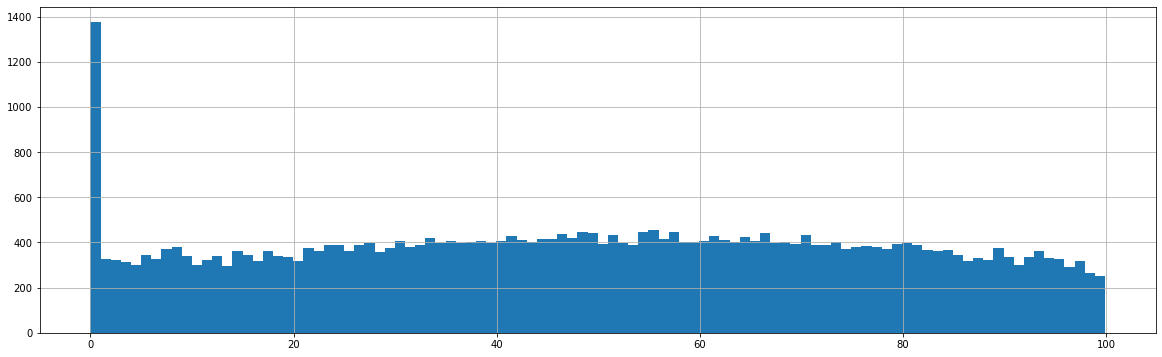

In [27]:
## checking for the distribution

plt.figure(figsize=[20, 6] )
df1['revol_util'].hist(bins=100);

In [28]:
df1.revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

- since mean and median are close by and distribution also look uniform except for the 0th value, which has very high count, we will impute the missing value by median

In [29]:
## Imputing with median value

median = df1.revol_util.median()
print("Median = ", median)
df1['revol_util'] = df1['revol_util'].fillna(median)
print("Number of missing values : ", df1['revol_util'].isna().sum())

Median =  49.1
Number of missing values :  0


**Analysing column 'last_pymnt_d'**

In [30]:
## Analysing column 'last_pymnt_d'
print(df1.last_pymnt_d.dtype)
print("Number of missing values : ",df1.last_pymnt_d.isna().sum())
df1.last_pymnt_d.value_counts()

object
Number of missing values :  71


Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-14     832
Jan-14     832
Aug-12     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Oct-10     216
Mar-16     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Dec-15     176
Sep-10     176
Apr-16     173
Feb-16     169
May-16    

- The column `last_pymnt_d` represents the 'Last month payment was received', 
- It has 71 missing values
- Since we are interested in profile of the loan applicant to understand the driving factor associated with risk of the loan, we can **drop** this column.

**Analysing column 'last_credit_pull_d'**

In [31]:
## Analysing column 'last_credit_pull_d'
print(df1.last_credit_pull_d.dtype)
print("Number of missing values : ", df1.last_credit_pull_d.isna().sum())
df1.last_credit_pull_d.value_counts()

object
Number of missing values :  2


May-16    9333
Apr-16    2393
Mar-16    1122
Feb-13     843
Feb-16     733
Jan-16     657
Dec-15     647
Mar-13     576
Mar-14     564
Dec-14     562
Jul-14     555
Sep-14     546
Jul-15     535
Feb-14     531
Nov-15     529
Oct-14     529
Aug-14     522
Jan-14     516
Sep-15     512
Oct-15     502
Nov-14     497
Apr-14     494
Nov-13     473
May-14     473
Jun-14     465
May-13     448
Jan-15     436
Apr-13     425
May-15     422
Dec-13     422
Aug-15     422
Oct-13     416
Nov-12     404
Jul-13     396
Sep-12     391
Sep-13     390
Apr-15     388
Aug-12     377
Jun-15     375
Dec-12     374
Mar-15     371
Aug-13     370
Jun-13     370
Feb-12     368
Feb-15     358
Mar-12     338
Oct-12     332
May-12     324
Apr-12     308
Jun-12     308
Jul-12     297
Jan-12     258
Mar-11     257
Aug-11     254
Dec-11     245
Nov-11     201
May-11     193
Jun-11     165
Sep-11     157
Jul-11     156
Feb-11     151
Oct-11     148
Apr-11     135
Jan-11     129
Dec-10     111
Jul-10     107
Sep-10    

In [32]:
df1[df1.last_credit_pull_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,NaN,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,for my toy business,900xx,CA,4.04,0,Oct-97,0,4,0,7172,80.6,9,f,0.0,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,1000,1000,875.0,36 months,7.12%,30.94,A,A1,NaN,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Research On Global Warming,941xx,CA,0.65,0,Jul-97,1,7,0,2227,3.8,37,f,0.0,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


- Since we do not have the last credit pull date for  2 records, but we know the status of the loan for these records, we can substitute the missing values from last payment date column
- We need this column for further in the analysis referencing 

In [33]:
### replacing the missing values with values from 'last_pumnt_d'

df1.last_credit_pull_d = df1.last_credit_pull_d.fillna(df1.last_pymnt_d)
df1[df1.last_credit_pull_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [34]:
### Converting last_credit_pull_d to date&time
# df2.issue_d = df2.issue_d.apply(lambda x: pd.to_datetime(dt.datetime.strptime(x, '%b-%y')))

df1.last_credit_pull_d = df1.last_credit_pull_d.apply(lambda x : pd.to_datetime(dt.datetime.strptime(x, '%b-%y')))
df1.last_credit_pull_d.dtype

dtype('<M8[ns]')

**Analysing column 'collections_12_mths_ex_med'**

In [35]:
## Analysing column 'collections_12_mths_ex_med'

print("Number of missing values : ", df1.collections_12_mths_ex_med.isna().sum())
df1.collections_12_mths_ex_med.value_counts()

Number of missing values :  56


0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

- The column `collections_12_mths_ex_med` represents - number of collections in 12 months excluding medical collections
- This column has 56 missing values
- Since this column has only one value '0', it will be **droped**

**Analysing column 'chargeoff_within_12_mths'**

In [36]:
## Analysing column 'chargeoff_within_12_mths'

print("Number of missing values : ", df1.chargeoff_within_12_mths.isna().sum())
df1.chargeoff_within_12_mths.value_counts()

Number of missing values :  56


0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

- The column `chargeoff_within_12_mths` represents - number of charge-offs within 12 months
- This column has 56 missing values
- Since this column has only one value '0', it will be **droped**

**Analysing column 'pub_rec_bankruptcies'**

In [37]:
## Analysing column 'pub_rec_bankruptcies'

print("Number of missing values : ", df1.pub_rec_bankruptcies.isna().sum())
df1.pub_rec_bankruptcies.value_counts()

Number of missing values :  697


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

- the column `pub_rec_bankruptcies` represents - Number of public record bankruptcies / number of bankruptices cases filed
- it may offer some value in the analysis
- it has 3 values '0', '1', '2'. These values can be treated as categorical values
- it has 697 missing values, it will be imputed with mode value - '0'.

In [38]:
## Imputing missing values with mode value

df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.fillna(0)
df1.pub_rec_bankruptcies.isna().sum()

0

In [39]:
## Chaning the data type from float to category

df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.astype('category')
print(df1.pub_rec_bankruptcies.dtype)

category


**Analysing column 'tax_liens'**

In [40]:
## Analysing column 'tax_liens'

print("Number of missing values : ", df1.tax_liens.isna().sum())
df1.tax_liens.value_counts()

Number of missing values :  39


0.0    38538
Name: tax_liens, dtype: int64

- The column `tax_liens` represents - Number of tax liens, legal claim against the assets of an individual for failing to pay tax owed to the government
- It has 39 missing values
- Since this column has only one value '0', it will be **droped**

In [41]:
## Droping the above mentioned columns

drop_cols1 = ['emp_title', 'title', 'last_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
df1.drop(columns=drop_cols1, inplace=True)
print(df1.shape)
df1.head()

(38577, 45)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,2016-05-01,1,INDIVIDUAL,0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,2013-09-01,1,INDIVIDUAL,0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,2016-05-01,1,INDIVIDUAL,0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,2016-04-01,1,INDIVIDUAL,0,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,2016-01-01,1,INDIVIDUAL,0,0,0.0


In [42]:
## Checking for any missing values after missing value treatment

df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

- No missing values
- We will inspect the other columns for distribution and outliers

### Selecting the information/columns based on the understandings form data dictionary

- Some of the information are directly due to approval of loan application, that is after sactioning the loan
- Hence may not offer valuable information on qualifying the loan application in first place
- Such information/columns will be droped from the analysis
- Below are the columns not considered for the analysis

In [43]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

- After going through the data_dictionary, some of columns will be droped from the analysis because these columns are results of approval of the loan and offer less information in deciding the risk of the loan application, columns not considered are;
    - `'funded_amnt'` - The total amount committed to that loan at that point in time, post approval
    - `'funded_amnt_inv'` - The total amount committed by investors for that loan at that point in time, post approval
    - `'term'` - The number of payments on the loan. Values are in months and can be either 36 or 60, post approval
    - `'int_rate'` - Interest Rate on the loan, post approval
    - `'installment'` - The monthly payment owed by the borrower if the loan originates, post approval
    - 
    - `'pymnt_plan'` - Indicates if a payment plan has been put in place for the loan, post approval
    - `'url'` - URL for the LC page with listing data.
    - `'initial_list_status'` - The initial listing status of the loan. Possible values are – W, F, post approval
    - `'out_prncp'` - Remaining outstanding principal for total amount funded, post approval
    - `'out_prncp_inv'` - Remaining outstanding principal for portion of total amount funded by investors, post approval
    - `'total_pymnt'` - Payments received to date for total amount funded, post approval
    - `'total_pymnt_inv'` - Payments received to date for portion of total amount funded by investors, post approval
    - `'total_rec_prncp'`- Principal received to date, post approval
    - `'total_rec_int'` - Interest received to date, post approval
    - `'total_rec_late_fee'` - Late fees received to date, post approval
    - `'recoveries'` - post charge off gross recovery, post approval
    - `'collection_recovery_fee'` - post charge off collection fee, post approval
    - `'last_pymnt_amnt'` - Last total payment amount received, post approval
    - `'policy_code'` - public or privte/new product, related to loan product, not to applicant

In [44]:
drop_cols = ['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'pymnt_plan', 'url', 
             'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
             'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
             'policy_code']

df2 = df1.drop(columns=drop_cols)
print(df2.shape)
df2.head()

(38577, 26)


,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,5000,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,2016-05-01,INDIVIDUAL,0,0,0.0
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,2013-09-01,INDIVIDUAL,0,0,0.0
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,2016-05-01,INDIVIDUAL,0,0,0.0
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,2016-04-01,INDIVIDUAL,0,0,0.0
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,2016-01-01,INDIVIDUAL,0,0,0.0


In [45]:
df2.describe(include='all')

C:\Users\dhana\AppData\Local\Temp/ipykernel_8512/2243461472.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all')


,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,38577.000000,38577,38577,38577,38577,3.857700e+04,38577,38577,38577,38577,38577,38577,38577.000000,38577.000000,38577,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577,38577,38577.0,38577.0,38577.0
unique,NaN,7,35,11,5,NaN,3,55,2,14,822,50,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,NaN,106,1,NaN,NaN,3.0
top,NaN,B,A4,10+ years,RENT,NaN,Not Verified,Nov-11,Fully Paid,debt_consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-01 00:00:00,INDIVIDUAL,NaN,NaN,0.0
freq,NaN,11675,2873,9521,18480,NaN,16694,2062,32950,18055,583,6949,NaN,NaN,360,NaN,NaN,NaN,NaN,NaN,NaN,9333,38577,NaN,NaN,36935.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-01 00:00:00,NaN,NaN,NaN,NaN
mean,11047.025430,NaN,NaN,NaN,NaN,6.877797e+04,NaN,NaN,NaN,NaN,NaN,NaN,13.272727,0.146668,NaN,0.871737,9.275423,0.055422,13289.489826,48.703292,22.052648,NaN,NaN,0.0,0.0,NaN
std,7348.441646,NaN,NaN,NaN,NaN,6.421868e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.673044,0.492271,NaN,1.071546,4.401588,0.237804,15866.492241,28.346356,11.425861,NaN,NaN,0.0,0.0,NaN
min,500.000000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,0.0,0.0,NaN
25%,5300.000000,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,8.130000,0.000000,NaN,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,NaN,NaN,0.0,0.0,NaN


- From the above we can see that some of the columns have single value like - `application_type`, `acc_now_delinq` and `delinq_amnt`, hance we may need to drop them 

In [46]:
df2.application_type.value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [47]:
df2.acc_now_delinq.value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

In [48]:
df2.delinq_amnt.value_counts()

0    38577
Name: delinq_amnt, dtype: int64

In [49]:
## Dropping the columns with single value -  high cardinality

drop_cols2 = ['application_type', 'acc_now_delinq', 'delinq_amnt']
df2.drop(columns=drop_cols2, inplace=True)
print(df2.shape)

(38577, 23)


### Perparing the filtered data for analysis

In [50]:
print(df2.shape)
df2.head()

(38577, 23)


,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,2016-05-01,0.0
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,2013-09-01,0.0
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,2016-05-01,0.0
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,2016-04-01,0.0
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,2016-01-01,0.0


- Data considered for Analyis has 23 columns and 38577 rows

In [51]:
## checking the data for appropriate data type

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   grade                 38577 non-null  object        
 2   sub_grade             38577 non-null  object        
 3   emp_length            38577 non-null  object        
 4   home_ownership        38577 non-null  object        
 5   annual_inc            38577 non-null  float64       
 6   verification_status   38577 non-null  object        
 7   issue_d               38577 non-null  object        
 8   loan_status           38577 non-null  object        
 9   purpose               38577 non-null  object        
 10  zip_code              38577 non-null  object        
 11  addr_state            38577 non-null  object        
 12  dti                   38577 non-null  float64       
 13  delinq_2yrs     

- Object data type to be converted into category data type
- `'issue_d'` and `'earliest_cr_line'` columns to be converted into date&time columns

In [52]:
## Converting object data type to category data type

to_cat_cols = df2.select_dtypes(include=['object']).columns.to_list()
print(to_cat_cols)

['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line']


In [53]:
## Removing 'issue_d' and 'earliest_cr_line'

to_cat_cols = [ i for i in to_cat_cols if i not in ['issue_d', 'earliest_cr_line']]
to_cat_cols

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state']

In [54]:
df2[to_cat_cols] = df2[to_cat_cols].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   grade                 38577 non-null  category      
 2   sub_grade             38577 non-null  category      
 3   emp_length            38577 non-null  category      
 4   home_ownership        38577 non-null  category      
 5   annual_inc            38577 non-null  float64       
 6   verification_status   38577 non-null  category      
 7   issue_d               38577 non-null  object        
 8   loan_status           38577 non-null  category      
 9   purpose               38577 non-null  category      
 10  zip_code              38577 non-null  category      
 11  addr_state            38577 non-null  category      
 12  dti                   38577 non-null  float64       
 13  delinq_2yrs     

In [55]:
## Converting data columns into datatime datatype

df2.issue_d = df2.issue_d.apply(lambda x: pd.to_datetime(dt.datetime.strptime(x, '%b-%y')))
df2.earliest_cr_line = df2.earliest_cr_line.apply(lambda x: pd.to_datetime(dt.datetime.strptime(x, '%b-%y')))
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   grade                 38577 non-null  category      
 2   sub_grade             38577 non-null  category      
 3   emp_length            38577 non-null  category      
 4   home_ownership        38577 non-null  category      
 5   annual_inc            38577 non-null  float64       
 6   verification_status   38577 non-null  category      
 7   issue_d               38577 non-null  datetime64[ns]
 8   loan_status           38577 non-null  category      
 9   purpose               38577 non-null  category      
 10  zip_code              38577 non-null  category      
 11  addr_state            38577 non-null  category      
 12  dti                   38577 non-null  float64       
 13  delinq_2yrs     

- From the description from Data dictionary following columns can be treated as categorical columns;
    -- `'delinq_2yrs'` , `'inq_last_6mths'`, `'open_acc'`,`'pub_rec'`, and `'total_acc'`

In [56]:
## converting numerical columns into categorical columns

to_cat_cols2 = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']
df2[to_cat_cols2] = df2[to_cat_cols2].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   grade                 38577 non-null  category      
 2   sub_grade             38577 non-null  category      
 3   emp_length            38577 non-null  category      
 4   home_ownership        38577 non-null  category      
 5   annual_inc            38577 non-null  float64       
 6   verification_status   38577 non-null  category      
 7   issue_d               38577 non-null  datetime64[ns]
 8   loan_status           38577 non-null  category      
 9   purpose               38577 non-null  category      
 10  zip_code              38577 non-null  category      
 11  addr_state            38577 non-null  category      
 12  dti                   38577 non-null  float64       
 13  delinq_2yrs     

### Univariate Analysis

In [57]:
## Data used for analysis

print(df2.shape)
print(df2.columns)
df2.head()

(38577, 23)
Index(['loan_amnt', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,2016-05-01,0.0
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,2013-09-01,0.0
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,2016-05-01,0.0
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,2016-04-01,0.0
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,2016-01-01,0.0


In [58]:
## Function to check for outliers

def out_liers(data):
    print("Provided data type is -",data.dtype)
    if (data.dtype in ['int64', 'int32', 'int16', 'int', 'float64', 'float32', 'float16', 'float']):
        Q1 = np.quantile(data, 0.25)
        Q3 = np.quantile(data, 0.75)
        IQR = Q3-Q1
        LL = Q1-(1.5*IQR)
        UL = Q3+(1.5*IQR)

        outs = data[(data>UL) | (data<LL)]
        print("Lower Limit {}, Upper Limit {}".format(LL, UL))
        print("There are {} outliers".format(len(outs)))

        return outs
       
    else:
        print("ERROR: Only 'int' and 'float' data type to be used!!")
        return

    

**Analysing the 'loan_amt' column**

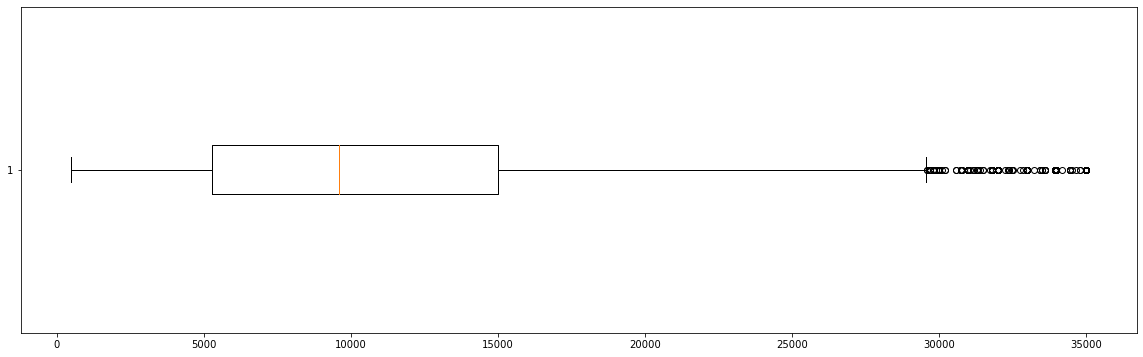

In [59]:
## Ploting Boxplot to check for outliers

plt.boxplot(df2.loan_amnt, vert=False );

- There are outliers, we will inspect further

In [60]:
## checking for outliers

out_liers(df2.loan_amnt)

Provided data type is - int64
Lower Limit -9250.0, Upper Limit 29550.0
There are 1088 outliers


31       31825
80       35000
128      35000
185      35000
268      35000
         ...  
19800    32000
19811    32000
19825    30000
19838    30000
19857    35000
Name: loan_amnt, Length: 1088, dtype: int64

In [61]:
df2.loan_amnt.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .90, .95] )

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
10%       3090.000000
20%       5000.000000
30%       6000.000000
40%       7750.000000
50%       9600.000000
60%      11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
95%      25000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

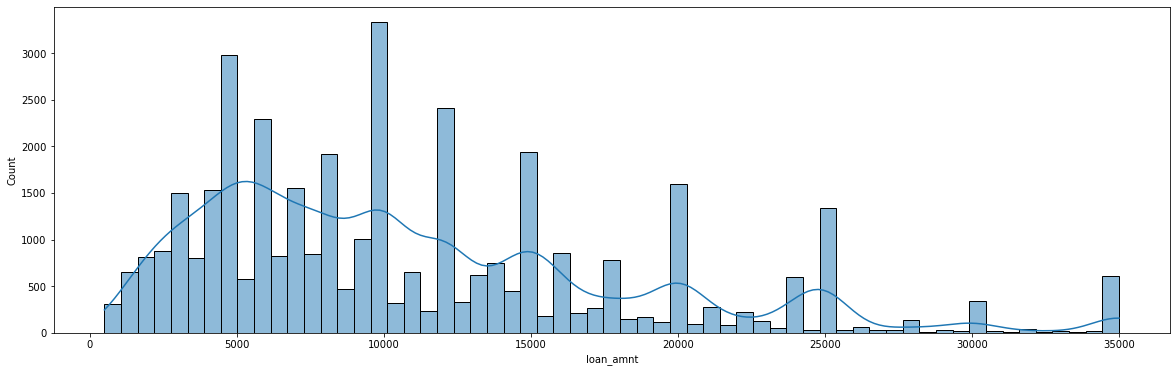

In [62]:
## checking the distribution  - 'loan_amt'

sns.histplot(df2.loan_amnt, stat= 'count', kde=True, );

**Observations**

- `loan_amt` - This is the amount of the loan applied by the borrower, can be considred for the analysis
- There are 1088 outliers
- However, these outliers are actual loan amount applied for, hence will be analysed against the loan status
- We can also bucket them into bins for analysing with loan status
- 50% of loan applicants have applied for loan amount less than or equal to 9600
- 95% of loan applicants have applied for loan amount less than or equal to 25000

**Analysing the 'grade' column**

In [63]:
## checking unique values and counts

print(df2.grade.unique())
df2.grade.value_counts(normalize=True)*100

['B', 'C', 'A', 'E', 'F', 'D', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


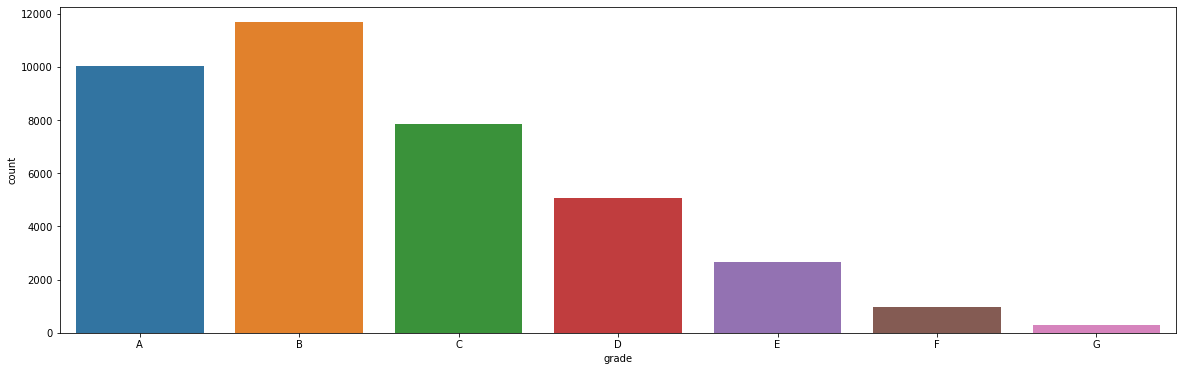

In [64]:
## count plot

sns.countplot(df2.grade);

**Observations**
- `'grade'` - is LC assigned loan grade
- This column has 7 categories
- 'grade' categories 'A', 'B', 'C' and 'D' constitue the majority, categories 'E', 'F' and 'G' combined represents < 11% data 
- We can consider combining 'E', 'F', and 'G' categories into one category

**Analysing the 'sub_grade' column**

In [65]:
## checking unique values and counts

print(df2.sub_grade.unique())
df2.sub_grade.value_counts(normalize=True)*100

['B2', 'C4', 'C5', 'C1', 'A4', ..., 'G1', 'F5', 'F4', 'G5', 'G3']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']


A4    7.447443
B3    7.323016
A5    7.037872
B5    6.778650
B4    6.317236
C1    5.327008
B2    5.187029
C2    5.005573
A3    4.691915
B1    4.658216
A2    3.909065
C3    3.857221
D2    3.333593
C4    3.126215
C5    2.991420
A1    2.952536
D3    2.892915
D1    2.413355
D4    2.379656
D5    2.161910
E1    1.871582
E2    1.591622
E3    1.337585
E4    1.099101
E5    1.003188
F1    0.790627
F2    0.603987
F3    0.451046
F4    0.391425
F5    0.292921
G1    0.243669
G2    0.199601
G4    0.139980
G3    0.116650
G5    0.075174
Name: sub_grade, dtype: float64

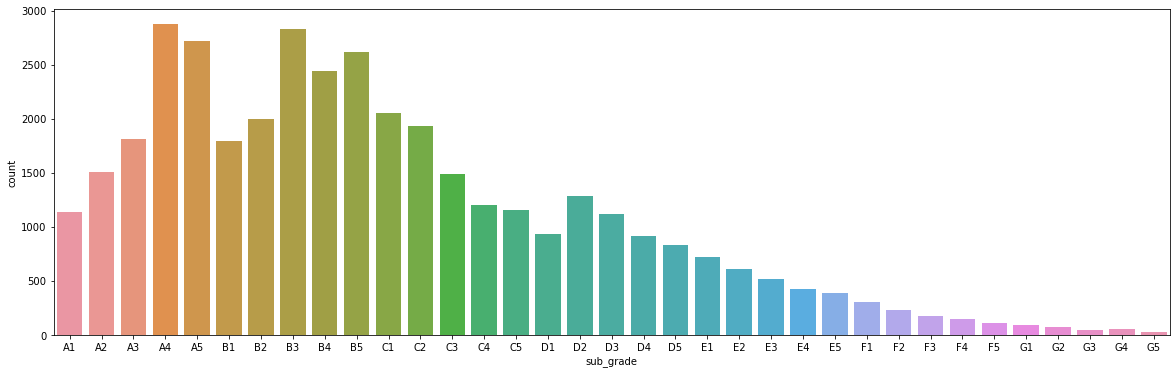

In [66]:
## count plot

sns.countplot(df2.sub_grade);

**Observations**
- `'sub_grade'` - is LC assigned loan sub_grades
- Each 'grade' is further divided inot 5 sub categories
- This column has 35 categories
- 'sub_grades' categories 'A1' to D5' constitue the majority

**Analysing the 'emp_length' column**

In [67]:
## checking unique values and counts

print(df2.emp_length.unique())
df2.emp_length.value_counts(normalize=True)*100

['10+ years', '< 1 year', '3 years', '8 years', '9 years', ..., '5 years', '1 year', '6 years', '2 years', '7 years']
Length: 11
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year']


10+ years    24.680509
< 1 year     11.685719
2 years      11.123208
3 years      10.399979
4 years       8.663193
5 years       8.279545
1 year        8.214739
6 years       5.619929
7 years       4.435285
8 years       3.719833
9 years       3.178059
Name: emp_length, dtype: float64

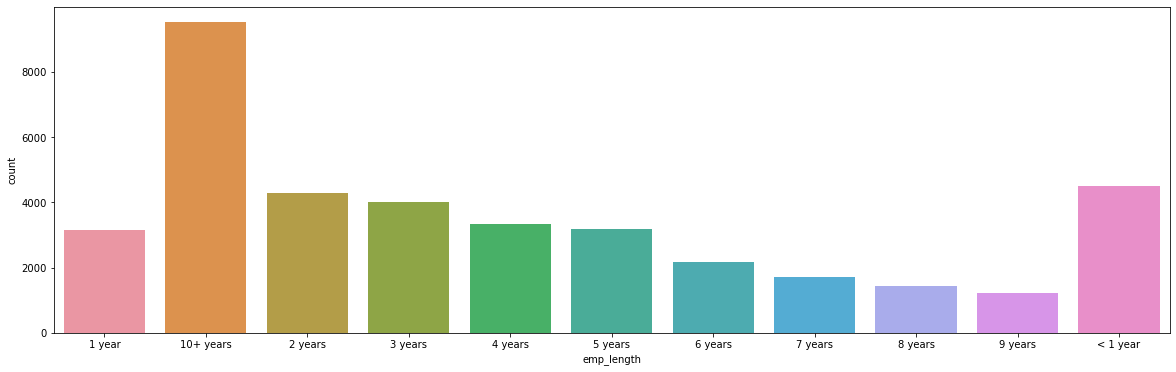

In [68]:
## count plot

sns.countplot(df2.emp_length);

**Observations**
- `'emp_length'` - is Employment length in years, at the time of application
- This column has 11 categories
- Most of the loan applicant about 25% are with 10+ years of employment history
- Applicant with 7, 8, 9 years of employment length have less than 5% of data in each category
- We can further regroup this column into fewer categories to get more insights wrt. loan status

**Analysing the 'home_ownership' column**

In [69]:
## checking unique values and counts

print(df2.home_ownership.unique())
df2.home_ownership.value_counts(normalize=True)*100

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']


RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

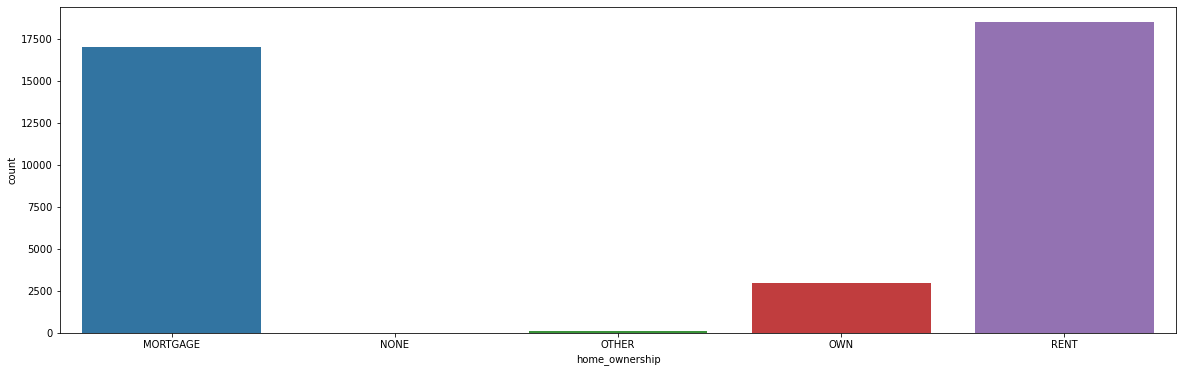

In [70]:
## count plot

sns.countplot(df2.home_ownership);

**Observations**
- `'home_ownership'` - is The home ownership status provided by the borrower during registration. LC values are: RENT, OWN, MORTGAGE, OTHER.
- This column has 5 categories - RENT, OWN, MORTGAGE, OTHER and NONE
- None category can be considered as missing values and it is also the minor category, We can merge NONE with RENT, as RENT is the majority class (~48%)
- customers living in RENTED House and customers who have mortgaged their homes are the majority loan applicants  
- 'OWN' and 'OTHER' class represent minority class

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


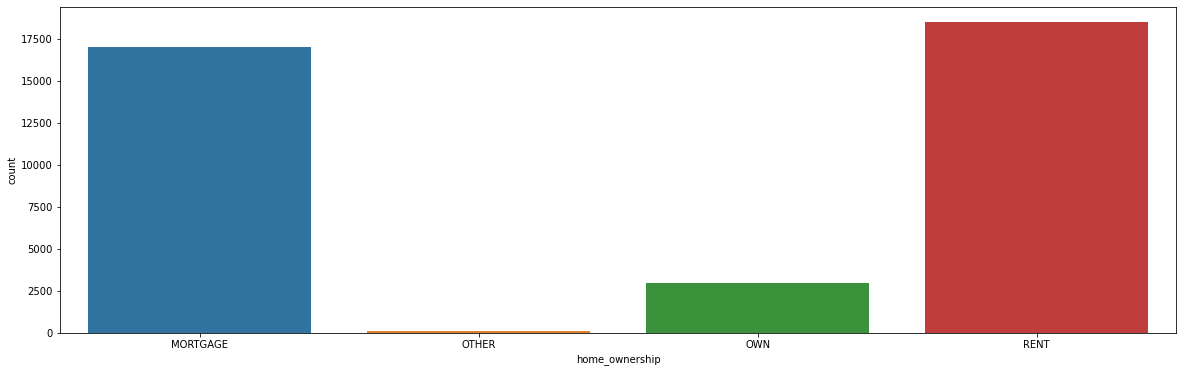

In [71]:
## Replacing NONE class with RENT Class

df2.home_ownership.replace('NONE', 'RENT', inplace=True)
sns.countplot(df2.home_ownership);

**Analysing the 'annual_inc' column**

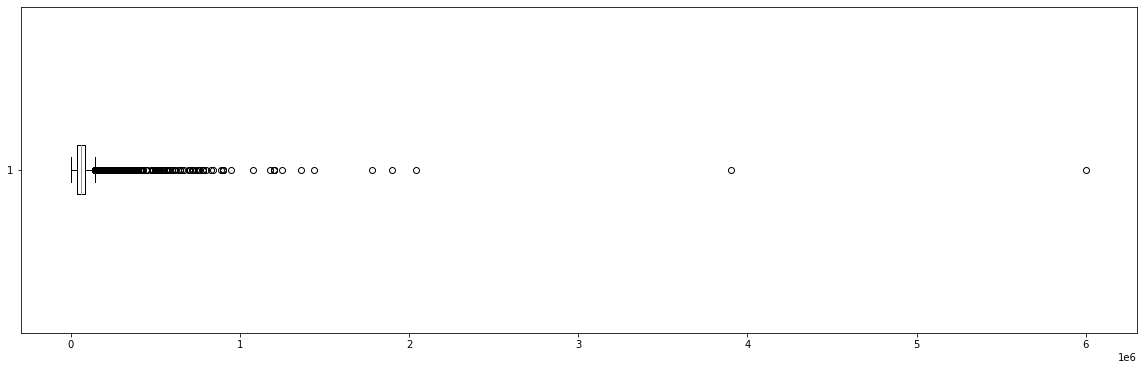

In [72]:
## Ploting Boxplot to check for outliers

plt.boxplot(df2.annual_inc, vert=False );

- There are some extreemly large values

In [73]:
## checking for outliers

out_liers(df2.annual_inc)

Provided data type is - float64
Lower Limit -23000.0, Upper Limit 145000.0
There are 1762 outliers


74       150000.0
80       150000.0
170      225000.0
185      168000.0
298      150000.0
           ...   
39694    150000.0
39703    200000.0
39706    180000.0
39707    180000.0
39715    200000.0
Name: annual_inc, Length: 1762, dtype: float64

In [74]:
df2.annual_inc.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .90, .95] )

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.719616e+04
30%      4.450000e+04
40%      5.000400e+04
50%      5.886800e+04
60%      6.500400e+04
70%      7.500000e+04
80%      9.000000e+04
90%      1.150000e+05
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

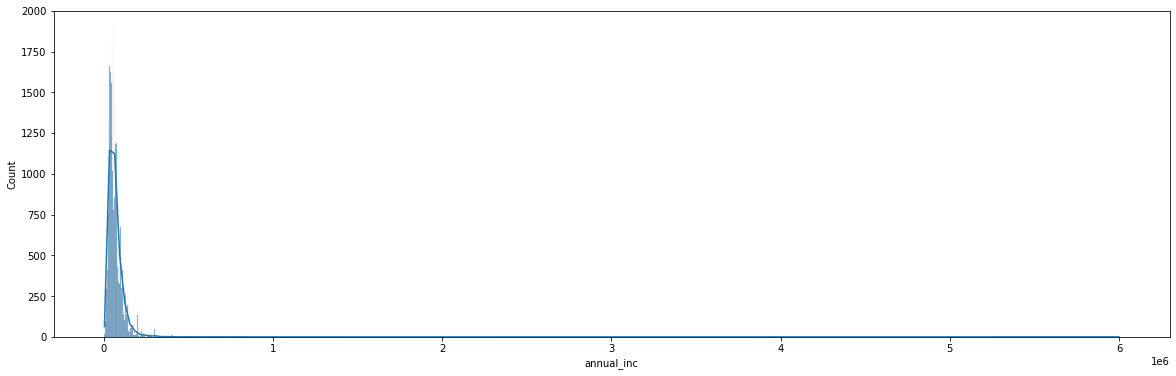

In [75]:
## checking the distribution  - 'annual_inc'

sns.histplot(df2.annual_inc, stat= 'count', kde=True, );

**Observations**

- `annual_inc` - The self-reported annual income provided by the borrower during registration.
- There are extreme outliers and in total 1762 outliers
- However, these outliers are actual income disclosed by the applicants and will be considered for analysis
- We can bucket them into bins for analysing with loan status
- 50% of loan applicants have annual income less than or equal to 58868, where as mean annual income is 68777 which is due to presence of outliers
- From the distribution plot, data looks extreemly right skewed. 

**Analysing the 'verification_status' column**

In [76]:
## checking unique values and counts

print(df2.verification_status.unique())
df2.verification_status.value_counts(normalize=True)*100

['Verified', 'Source Verified', 'Not Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']


Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


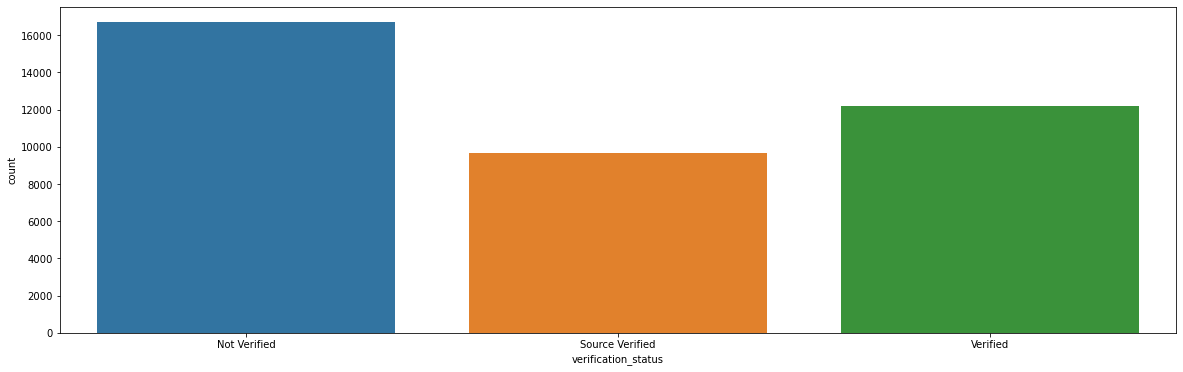

In [77]:
## count plot

sns.countplot(df2.verification_status);

**Observations**

- `verification_status` - Indicates if income was verified by LC, not verified, or if the income source was verified
- There are 3 categories 
- For about 57% of applicants, there has been somre sort of varification done
- For rest 43% of applicants, there is no varification done 
- can be regrouped into 2 categories - Verified and Not Verified by combining Verified with Source Verified

**Analysing the 'issue_d' column**

- `issue_d` - data issuance of the loan
- May not directly help in the analysis, but can be used to derive new feature when used with `earliest_cr_line`
- deriving year and month from the 'issue_d' column

In [78]:
df2.issue_d.describe()

C:\Users\dhana\AppData\Local\Temp/ipykernel_8512/656661672.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.issue_d.describe()


count                   38577
unique                     55
top       2011-11-01 00:00:00
freq                     2062
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [79]:
## Creating YEAR and MONTH Coulumns from 'issue_d' column

df2['issue_year'] = df2.issue_d.apply(lambda x: pd.to_datetime(x).year)
df2['issue_month'] = df2.issue_d.apply(lambda x: pd.to_datetime(x).month)
df2.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
0,5000,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,2016-05-01,0.0,2011,12
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,2013-09-01,0.0,2011,12
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,2016-05-01,0.0,2011,12
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,2016-04-01,0.0,2011,12
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,2016-01-01,0.0,2011,12


In [80]:
## checking the counts for each year as proportion 

df2.issue_year.value_counts(normalize=True)*100

2011    53.181948
2010    29.893460
2009    12.224901
2008     4.049045
2007     0.650647
Name: issue_year, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


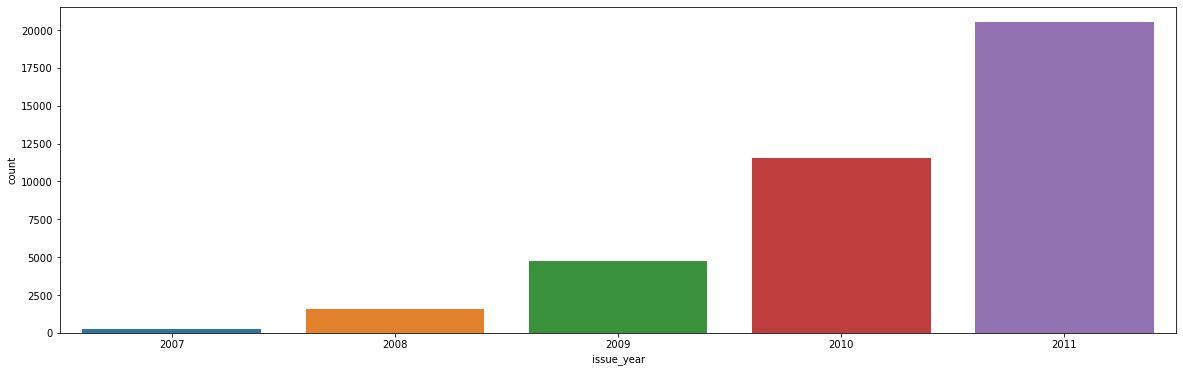

In [81]:
## count plot

sns.countplot(df2.issue_year);

**Observations**
- data represents loan issued between 2007 and 2011
- There is an explonential increase in loan issuance year by year
- data contains less than 10% of loan issued in 2007 and 2008
- data contains more than 53% of loan been issued in 2011 

In [82]:
## checking the counts for each month as proportion 

df2.issue_month.value_counts(normalize=True)*100

12    10.926200
11    10.384426
10     9.749333
9      9.067579
8      8.782435
7      8.686523
6      8.243254
5      7.566685
4      7.338570
3      6.975659
1      6.166887
2      6.112450
Name: issue_month, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


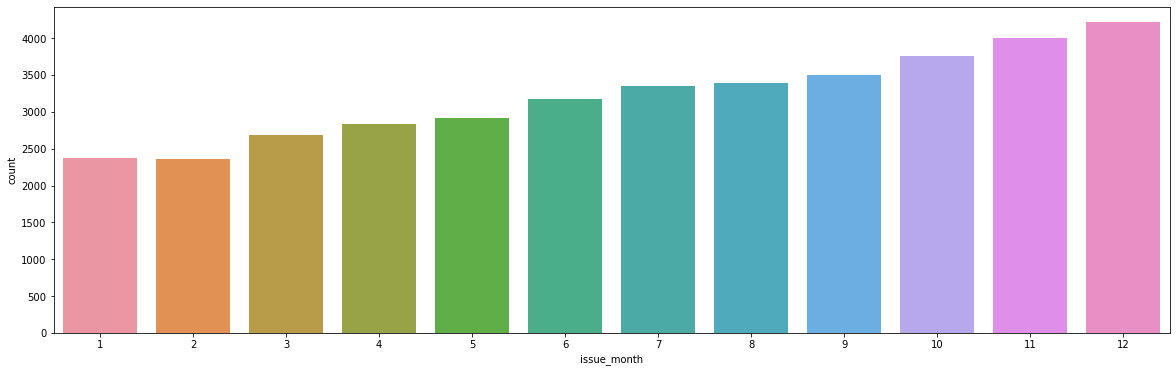

In [83]:
## count plot

sns.countplot(df2.issue_month);

**Observations**
- There is a gradual increase in the loan issuance from January to December
- number of loans issued at the end of the year is more compared to begining of the year
- November and December are the months having highest loan issuance
- May be attributed to Chirtsmas and New year shopping 

**Analysing the 'loan_status' column**

In [84]:
## checking unique values and counts

print(df2.loan_status.unique())
df2.loan_status.value_counts(normalize=True)*100

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']


Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


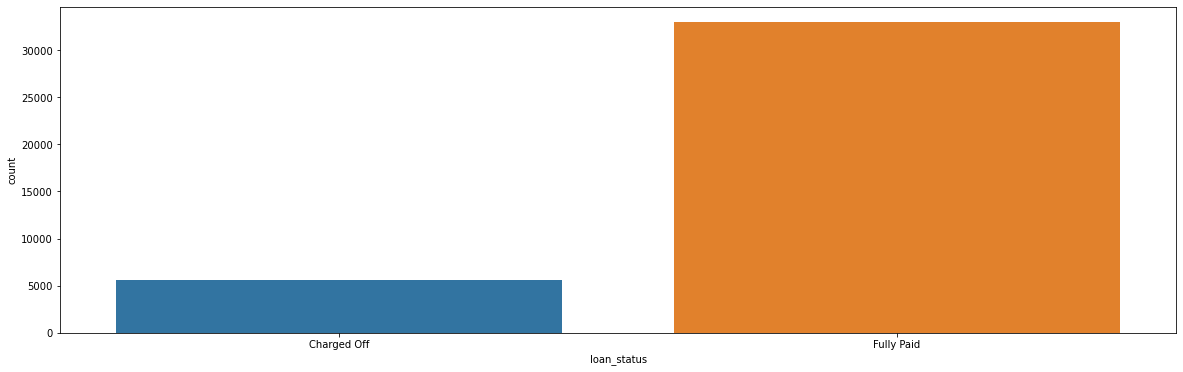

In [85]:
## count plot

sns.countplot(df2.loan_status);

**Observations**
- `'loan_status'` is the target column
- It has 2 categories 'Fully Pain' and 'Charged Off'
- Data is skewed as it has 85% of Fully Paid category compared to 15% of Charged off category

**Analysing the 'purpose' column**

In [86]:
## checking unique values and counts

print(df2.purpose.unique())
df2.purpose.value_counts(normalize=True)*100

['credit_card', 'car', 'small_business', 'other', 'wedding', ..., 'moving', 'vacation', 'house', 'renewable_energy', 'educational']
Length: 14
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']


debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

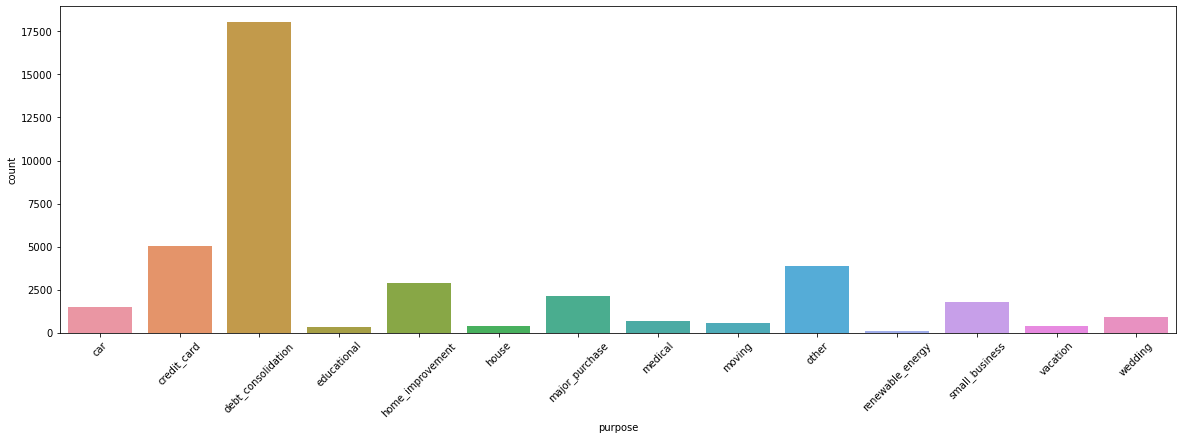

In [87]:
## count plot

sns.countplot(df2.purpose);
plt.xticks(rotation=45);

**Observations**
- `'purpose'` - A category provided by the borrower for the loan request. 
- There are 14 categories
- `'debt_consolidation'` category represents the majority class < 46% of data

**Analysing the 'addr_state' column**

In [88]:
## checking unique values and counts

print(df2.addr_state.unique())
df2.addr_state.value_counts(normalize=True)*100

['AZ', 'GA', 'IL', 'CA', 'NC', ..., 'IA', 'NE', 'ID', 'IN', 'ME']
Length: 50
Categories (50, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']


CA    18.013324
NY     9.586023
FL     7.208959
TX     6.892708
NJ     4.640071
IL     3.831298
PA     3.805376
VA     3.548747
GA     3.522824
MA     3.362107
OH     3.053633
MD     2.651839
AZ     2.200793
WA     2.120434
CO     1.985639
NC     1.944164
CT     1.881950
MI     1.824922
MO     1.736786
MN     1.568292
NV     1.241672
SC     1.189828
WI     1.140576
AL     1.127615
OR     1.127615
LA     1.106877
KY     0.806180
OK     0.743967
KS     0.661016
UT     0.653239
AR     0.609171
DC     0.546958
RI     0.502890
NM     0.474376
WV     0.445862
HI     0.430308
NH     0.430308
DE     0.292921
MT     0.215154
WY     0.207377
AK     0.202193
SD     0.160718
VT     0.137388
MS     0.049252
TN     0.044068
IN     0.023330
ID     0.015553
NE     0.012961
IA     0.012961
ME     0.007777
Name: addr_state, dtype: float64

<AxesSubplot:xlabel='addr_state', ylabel='count'>

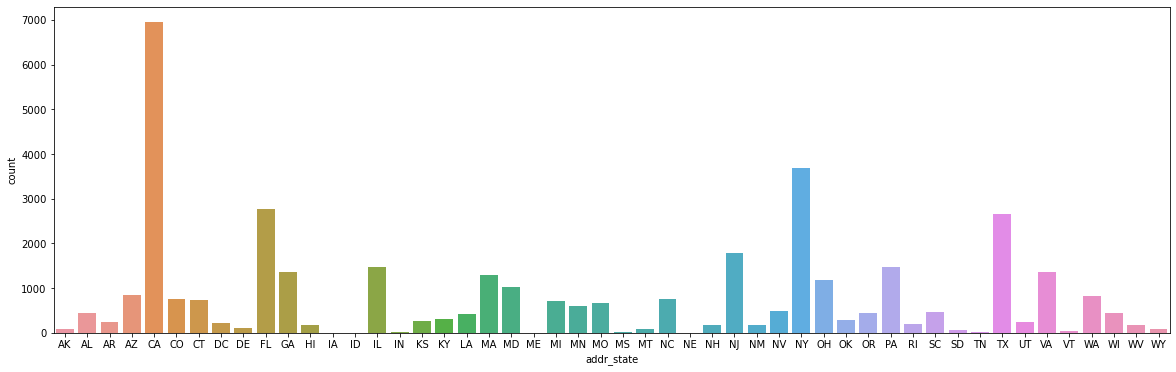

In [89]:
## count plot

sns.countplot(df2.addr_state)

**Observations**
- `'addr_state'` - The state provided by the borrower in the loan application
- The data contains applicants from all 50 states of USA
- The state `'CA'` has the highest loan issuance and state `'ME'` the lowest 
- Minority states can be combined

**Analysing the 'dti' column**

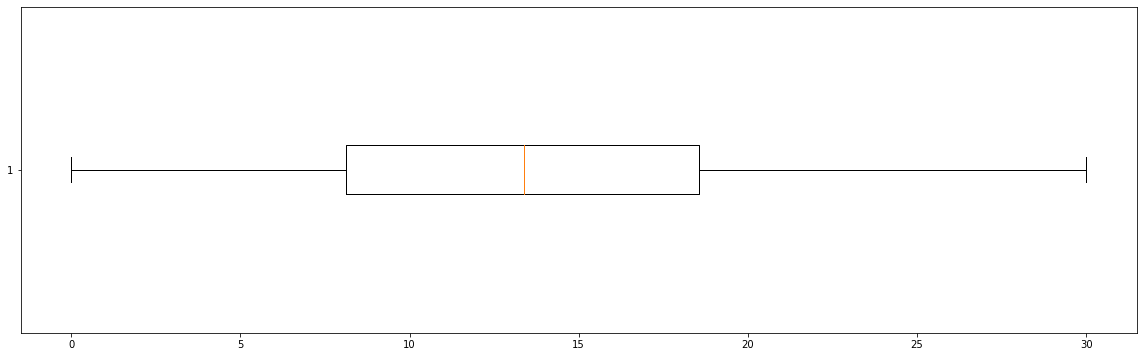

In [90]:
## Ploting Boxplot to check for outliers

plt.boxplot(df2.dti, vert=False );

In [91]:
## checking for outliers

out_liers(df2.dti)

Provided data type is - float64
Lower Limit -7.514999999999995, Upper Limit 34.205
There are 0 outliers


Series([], Name: dti, dtype: float64)

In [92]:
df2.dti.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .90, .95] )

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
10%          4.060000
20%          6.910000
30%          9.240000
40%         11.350000
50%         13.370000
60%         15.310000
70%         17.430000
80%         19.710000
90%         22.290000
95%         23.800000
max         29.990000
Name: dti, dtype: float64

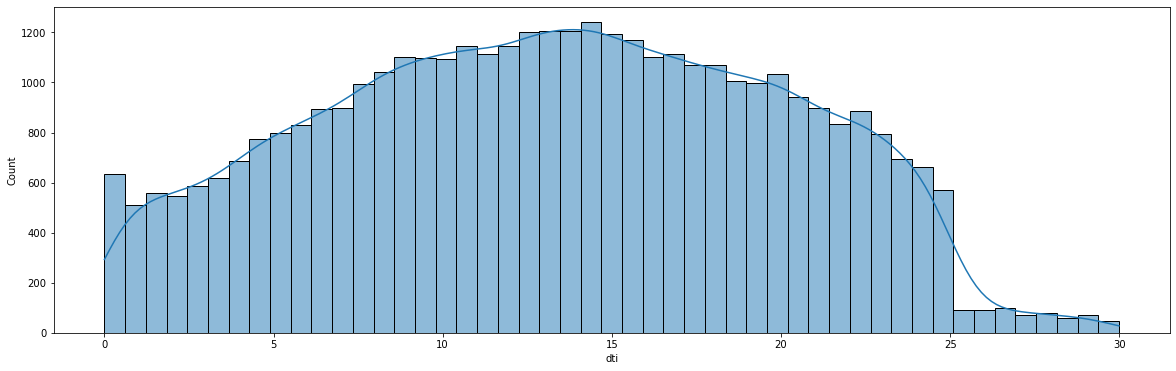

In [93]:
## checking the distribution  - 'annual_inc'

sns.histplot(df2.dti, stat= 'count', kde=True, );

**Observations**
- `'dti'`: "debt-to-income" expressed as percentage - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- This is a good indicator of borrowers ability to repay the loan, higher the ratio indicates lower the ability to pay the newer debts
- There are no outliers in the 'dti' data
- The mean and median dti are 13.27 and 13.37, which are close to each other
- Distribution of dti looks Normal excpet for right tail, 
- Max dti is close to 30%

**Analysing the 'delinq_2yrs' column**

In [94]:
## checking unique values and counts

print(df2.delinq_2yrs.unique())
df2.delinq_2yrs.value_counts(normalize=True)*100

[0, 2, 3, 1, 4, ..., 5, 8, 7, 9, 11]
Length: 11
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 11]


0     89.136014
1      8.313244
2      1.744563
3      0.549550
4      0.155533
5      0.054437
6      0.025922
7      0.010369
8      0.005184
9      0.002592
11     0.002592
Name: delinq_2yrs, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delinq_2yrs', ylabel='count'>

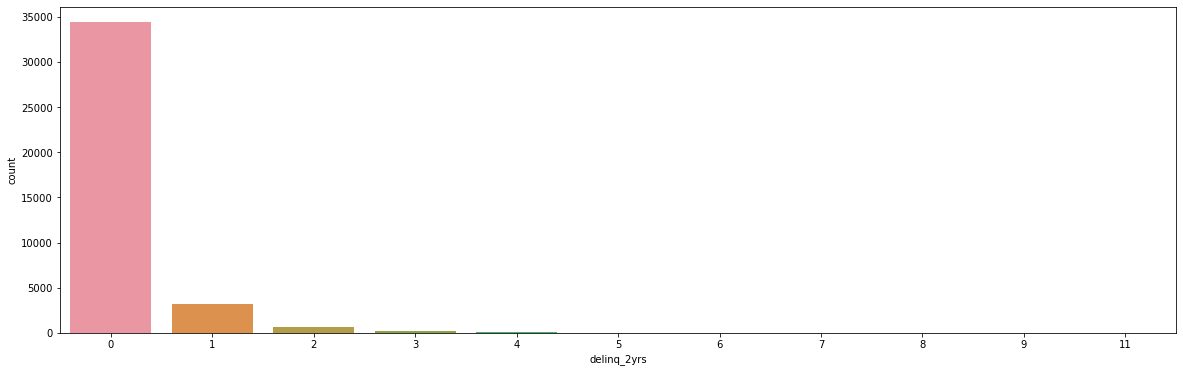

In [95]:
## count plot

sns.countplot(df2.delinq_2yrs)

**Observations**
- `'delinq_2yrs'`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2
- Indicates the trubles the borrower has in makeing timely repayments
- Close to 90% of borrowers have zero delinquency in past 2 years
- Arround 10% of borrowers have atleast 1 delinquent payment history
- We can create binary categories - 0 and 1+ and check with loan status

**Analysing the 'earliest_cr_line' column**

- Deriving 'earliest credit line year' from the data 

In [96]:
df2.earliest_cr_line.describe()

C:\Users\dhana\AppData\Local\Temp/ipykernel_8512/3048361513.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.earliest_cr_line.describe()


count                   38577
unique                    524
top       1999-10-01 00:00:00
freq                      360
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [97]:
## Converted dates for earliest_cr_line
df2.earliest_cr_line[-100:]

39617   2063-05-01
39618   1998-10-01
39619   1993-05-01
39620   2001-10-01
39621   1989-11-01
39622   1982-07-01
39623   1997-08-01
39624   2000-11-01
39625   1997-06-01
39626   1999-04-01
39627   1998-07-01
39628   2000-01-01
39629   1999-04-01
39630   1983-11-01
39631   1997-11-01
39632   1996-12-01
39633   2004-03-01
39634   1992-08-01
39635   1994-11-01
39636   2004-08-01
39637   2002-12-01
39638   1997-10-01
39639   1992-01-01
39640   1996-07-01
39641   1992-09-01
39642   1991-06-01
39643   1995-04-01
39644   1985-09-01
39645   1979-06-01
39646   2001-10-01
39647   1991-05-01
39648   1997-06-01
39649   1971-02-01
39650   1994-12-01
39651   2002-10-01
39652   2004-02-01
39653   2001-08-01
39654   2002-10-01
39655   2000-09-01
39656   2000-03-01
39657   1999-07-01
39658   2000-02-01
39659   1999-05-01
39660   1999-05-01
39661   1984-09-01
39662   1984-09-01
39663   2001-08-01
39664   2000-08-01
39665   2002-11-01
39666   1992-11-01
39667   1992-07-01
39668   1994-02-01
39669   1990

In [98]:
## Nonconverted dates
df1.earliest_cr_line[-100:]

39617    May-63
39618    Oct-98
39619    May-93
39620    Oct-01
39621    Nov-89
39622    Jul-82
39623    Aug-97
39624    Nov-00
39625    Jun-97
39626    Apr-99
39627    Jul-98
39628    Jan-00
39629    Apr-99
39630    Nov-83
39631    Nov-97
39632    Dec-96
39633    Mar-04
39634    Aug-92
39635    Nov-94
39636    Aug-04
39637    Dec-02
39638    Oct-97
39639    Jan-92
39640    Jul-96
39641    Sep-92
39642    Jun-91
39643    Apr-95
39644    Sep-85
39645    Jun-79
39646    Oct-01
39647    May-91
39648    Jun-97
39649    Feb-71
39650    Dec-94
39651    Oct-02
39652    Feb-04
39653    Aug-01
39654    Oct-02
39655    Sep-00
39656    Mar-00
39657    Jul-99
39658    Feb-00
39659    May-99
39660    May-99
39661    Sep-84
39662    Sep-84
39663    Aug-01
39664    Aug-00
39665    Nov-02
39666    Nov-92
39667    Jul-92
39668    Feb-94
39669    Jul-90
39670    May-00
39671    May-93
39672    Sep-80
39673    Dec-92
39674    Mar-00
39675    Apr-91
39676    Mar-95
39677    Nov-93
39678    Jul-04
39679   

**Observation**

- `'earliest_cr_line_yr'` The month the borrower's earliest reported credit line was opened
- It has been observed that data contain future dates eg, 2068, 2054, 2046..etc. 
- After 2008, the dates are jumping to 2048 till 2068
- This may be due to system miss interpreting 1948 till 1968 as 2048 and 2068. Because the only two digit of the year is captured in the original data
- This can be verified with `last_credit_pull_d` date

In [99]:
## Checking with last_credit_pull_d.

df2[df2.earliest_cr_line > df2.last_credit_pull_d][['earliest_cr_line', 'last_credit_pull_d', 'loan_status']]

,earliest_cr_line,last_credit_pull_d,loan_status
1576,2062-09-01,2013-09-01,Fully Paid
1764,2068-09-01,2015-09-01,Fully Paid
3274,2067-09-01,2015-05-01,Fully Paid
3349,2065-02-01,2014-11-01,Fully Paid
3403,2067-06-01,2013-04-01,Charged Off
3595,2067-08-01,2014-04-01,Fully Paid
3976,2063-12-01,2014-11-01,Fully Paid
4426,2068-09-01,2016-05-01,Fully Paid
4435,2068-09-01,2015-10-01,Fully Paid
4478,2063-03-01,2016-05-01,Fully Paid


In [100]:
## number of data haiving future dates

df2[df2.earliest_cr_line > df2.last_credit_pull_d].shape

(85, 25)

- We consider the future dates as system read error and substract 100 years from them
- eg 2046 into 1946

In [101]:
df2['adj_earliest_cr_line'] = df2.earliest_cr_line.apply(lambda x : x - dt.timedelta(36524) if x > dt.datetime(2009,1,1) else x)
df2[['earliest_cr_line', 'adj_earliest_cr_line']][-100:]

,earliest_cr_line,adj_earliest_cr_line
39617,2063-05-01,1963-05-02
39618,1998-10-01,1998-10-01
39619,1993-05-01,1993-05-01
39620,2001-10-01,2001-10-01
39621,1989-11-01,1989-11-01
39622,1982-07-01,1982-07-01
39623,1997-08-01,1997-08-01
39624,2000-11-01,2000-11-01
39625,1997-06-01,1997-06-01
39626,1999-04-01,1999-04-01


In [102]:
## Creating YEAR and MONTH Coulumns from 'issue_d' column

df2['earliest_cr_line_yr'] = df2.adj_earliest_cr_line.apply(lambda x: pd.to_datetime(x).year)
df2.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,adj_earliest_cr_line,earliest_cr_line_yr
0,5000,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,2016-05-01,0.0,2011,12,1985-01-01,1985
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,2013-09-01,0.0,2011,12,1999-04-01,1999
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,2016-05-01,0.0,2011,12,2001-11-01,2001
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,2016-04-01,0.0,2011,12,1996-02-01,1996
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,2016-01-01,0.0,2011,12,2004-11-01,2004


In [103]:
## checking the counts for each year as proportion 

df2.earliest_cr_line_yr.value_counts(normalize=True)*100

2000    8.191409
1999    7.507064
1998    7.188221
2001    6.382041
1997    6.187625
1996    5.708064
1995    5.386629
1994    5.049641
2002    4.899292
2003    4.699692
2004    4.476761
2005    3.802784
1993    3.784639
2006    2.991420
1992    2.667392
1990    2.605179
1991    2.449646
1989    2.161910
1988    1.837883
2007    1.809368
1987    1.529409
1986    1.239080
1985    1.137984
1984    1.023926
1983    0.834694
1982    0.557327
1981    0.469191
1980    0.453638
1978    0.417347
1979    0.406978
2008    0.396609
1977    0.290328
1976    0.241076
1975    0.215154
1974    0.160718
1973    0.158125
1972    0.127019
1970    0.121834
1971    0.116650
1969    0.095912
1968    0.049252
1967    0.046660
1966    0.028514
1963    0.025922
1965    0.020738
1964    0.015553
1962    0.012961
1954    0.005184
1961    0.005184
1959    0.002592
1956    0.002592
1946    0.002592
1950    0.002592
Name: earliest_cr_line_yr, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


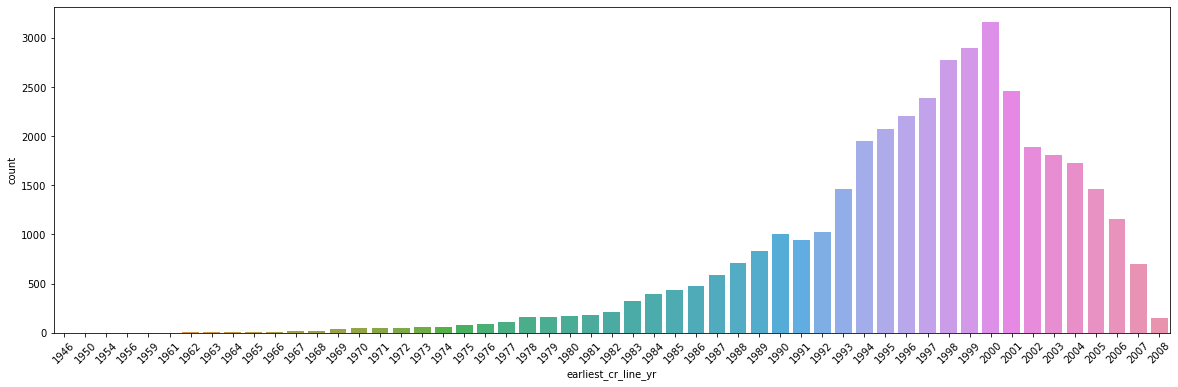

In [104]:
## count plot

sns.countplot(df2.earliest_cr_line_yr, )
plt.xticks(rotation = 45);

**Observation**
- we can see that after adjusting for the year, most of the borrowers have their earliest credit line availed between 1994 and 2006
- We can use this data to derive new freature

**Analysing the 'inq_last_6mths' column**

In [105]:
## checking unique values and counts

print(df2.inq_last_6mths.unique())
df2.inq_last_6mths.value_counts(normalize=True)*100

[1, 5, 2, 3, 0, 4, 6, 7, 8]
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]


0    48.497810
1    27.633046
2    14.656401
3     7.732587
4     0.819141
5     0.373279
6     0.163310
7     0.088135
8     0.036291
Name: inq_last_6mths, dtype: float64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


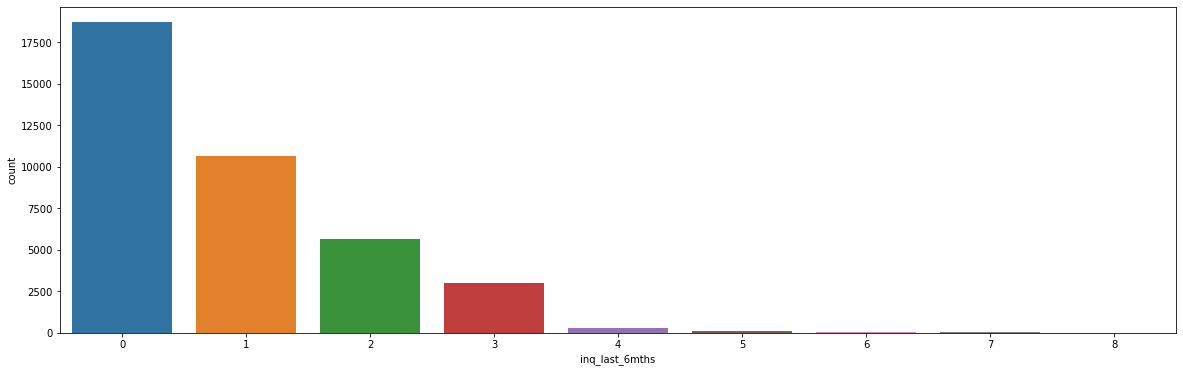

In [106]:
## count plot

sns.countplot(df2.inq_last_6mths);

**Observations**
- `'inq_last_6mths'` - The number of inquiries in past 6 months (excluding auto and mortgage inquiries) 
- There are 9 categories
- `'0'` category represents the majority class < 48% of data

**Analysing the 'pub_rec' column**

In [107]:
## checking unique values and counts

print(df2.pub_rec.unique())
df2.pub_rec.value_counts(normalize=True)*100

[0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]


0    94.634108
1     5.218135
2     0.124426
3     0.018146
4     0.005184
Name: pub_rec, dtype: float64

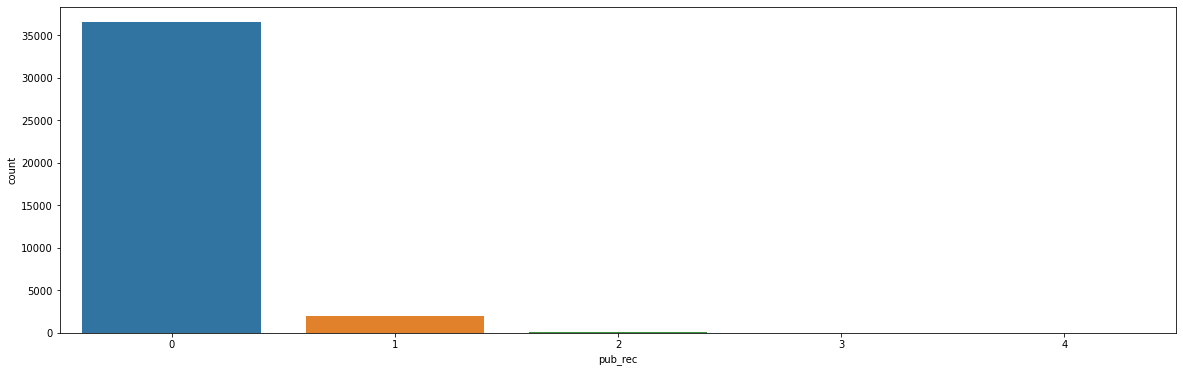

In [108]:
## count plot

sns.countplot(df2.pub_rec);

**Observations**
- `'pub_rec'` - Number of derogatory public records.
- it is assumed that more the pub_rec counts, bad on the profile of the borrower
- There are 4 categories,  representing number of records in public
- Majority of the data is concentrated in categories - 0
- Data can be regrouped as binary 0 and non 0

**Analysing the 'revol_bal' column**

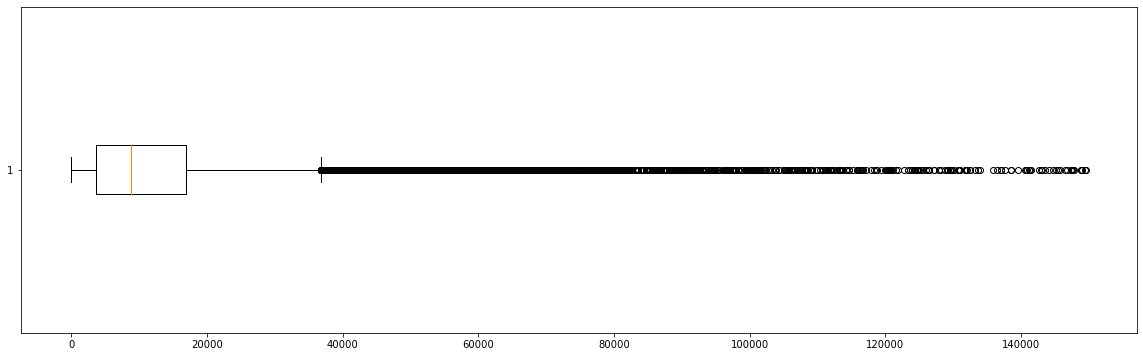

In [109]:
## Boxplot to check for outliers

plt.boxplot(df2.revol_bal, vert=False);

In [110]:
## counting outliers

out_liers(df2.revol_bal)

Provided data type is - int64
Lower Limit -16243.0, Upper Limit 36805.0
There are 2423 outliers


42       43936
46       74351
74       63864
166      71890
226      45449
         ...  
39688    41674
39706    40934
39707    60568
39711    66033
39715    85607
Name: revol_bal, Length: 2423, dtype: int64

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


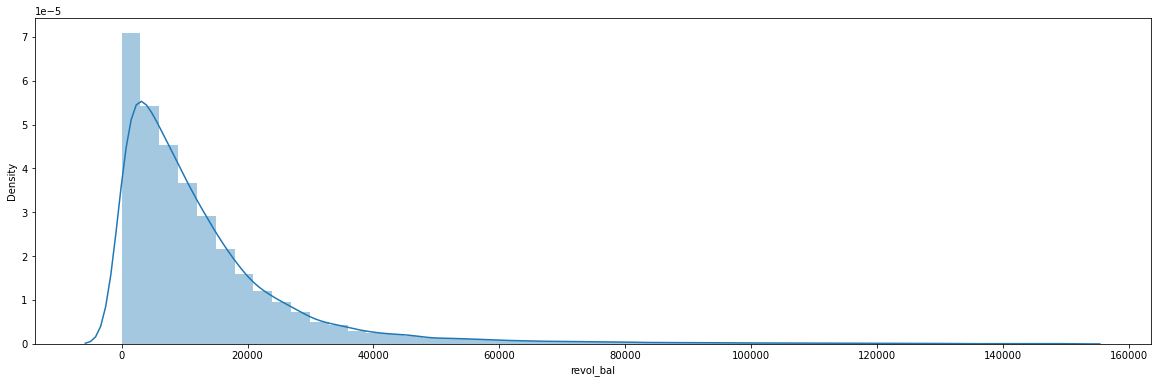

In [111]:
## count plot

sns.distplot(df2.revol_bal);

In [112]:
df2.revol_bal.describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

**Observations**
- `'revol_bal'` - Total credit revolving balance.
- This can be a risk indicator, higher the revolving balance riskier is the applicant
- Data has some large outliers, there are total 2423 outliers
- Data is right skewed
- Median is much smaller compared to Mean reflecting the affect of the outlier

**Analysing the 'revol_util' column**

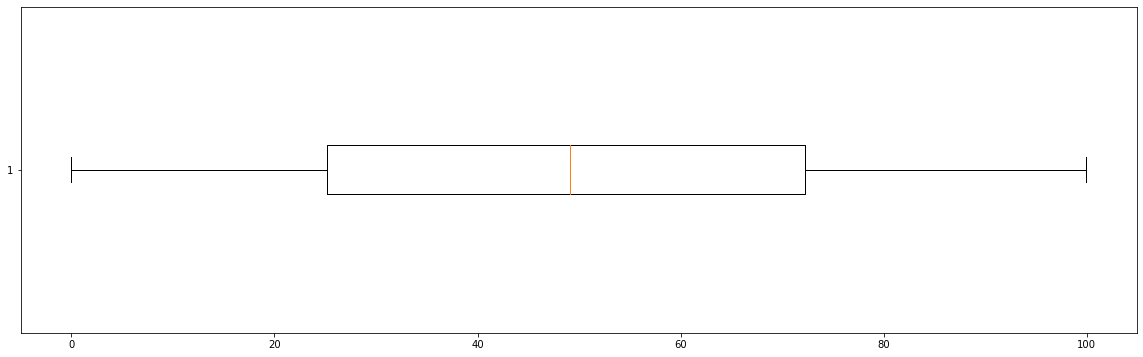

In [113]:
## Boxplot to check for outliers

plt.boxplot(df2.revol_util, vert=False);

In [114]:
## counting outliers

out_liers(df2.revol_util)

Provided data type is - float64
Lower Limit -45.3, Upper Limit 142.7
There are 0 outliers


Series([], Name: revol_util, dtype: float64)

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


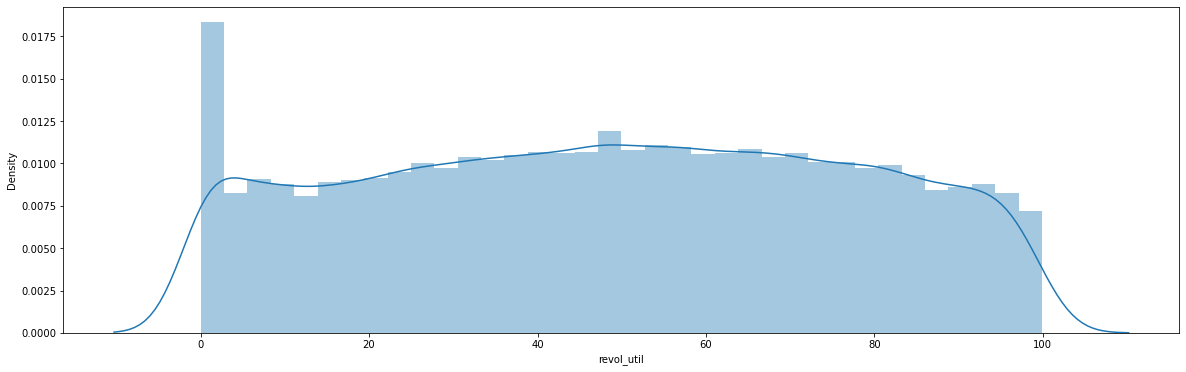

In [115]:
## count plot

sns.distplot(df2.revol_util);

In [116]:
df2.revol_util.describe()

count    38577.000000
mean        48.703292
std         28.346356
min          0.000000
25%         25.200000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

**Observations**
- `'revol_util'` - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- This can be a risk indicator, higher the revolving utilization riskier is the applicant
- Data has no outliers
- Data looks uniformly distributed except for the 0th value
- Median and Mean are closer to eachother

**Analysing the 'total_acc' column**

In [117]:
## checking unique values and counts

print(df2.total_acc.unique())
df2.total_acc.value_counts(normalize=True)*100

[9, 4, 10, 37, 12, ..., 73, 70, 68, 65, 2]
Length: 82
Categories (82, int64): [2, 3, 4, 5, ..., 80, 81, 87, 90]


16    3.691319
15    3.675765
17    3.657620
14    3.636882
20    3.603183
18    3.574669
13    3.540970
21    3.515048
19    3.377660
12    3.346554
22    3.255826
11    3.216943
24    3.165098
23    3.139176
10    3.038080
25    2.892915
9     2.737382
27    2.724421
26    2.659616
8     2.563704
28    2.449646
29    2.317443
30    2.193017
7     2.107473
31    1.988231
32    1.970086
6     1.747155
33    1.617544
34    1.586438
35    1.451642
5     1.407574
36    1.301294
37    1.202789
38    1.132799
39    1.106877
4     1.075771
40    0.819141
41    0.736190
42    0.715452
43    0.650647
44    0.570288
46    0.471784
3     0.464007
45    0.461415
47    0.425124
48    0.378464
49    0.326619
50    0.295513
52    0.256630
63    0.241076
53    0.215154
51    0.204785
54    0.165902
55    0.139980
56    0.124426
57    0.108873
61    0.106281
59    0.101097
62    0.095912
58    0.085543
60    0.069990
64    0.012961
66    0.010369
67    0.010369
2     0.010369
65    0.007777
76    0.00

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


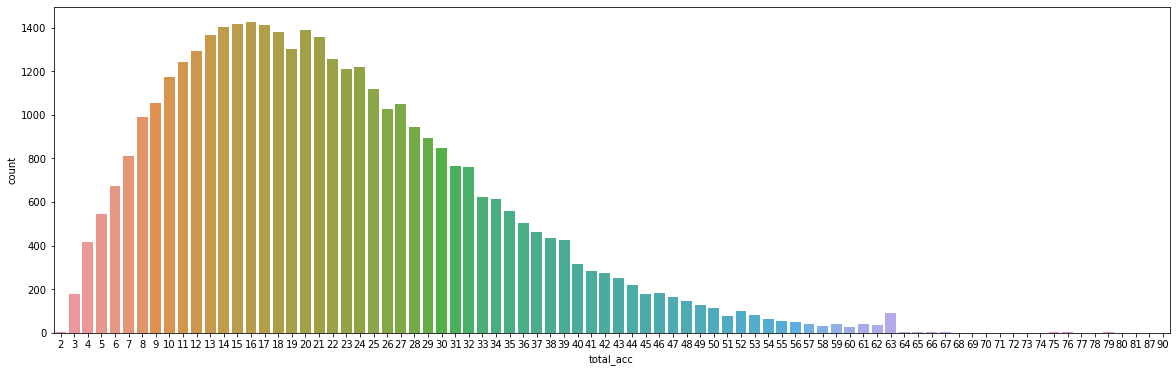

In [118]:
## count plot

sns.countplot(df2.total_acc);

**Observations**
- `'total_acc'` - The total number of credit lines currently in the borrower's credit file
- it is assumed that more number of credit lines, bad on the profile of the borrower
- Number of credit lines are treated as categorical values
- The mode is 16, majority of data is concentrated between 5 and 39
- There are some extreem values like - 87, 90

**Analysing the 'pub_rec_bankruptcies' column**

In [119]:
## checking unique values and counts

print(df2.pub_rec_bankruptcies.unique())
df2.pub_rec_bankruptcies.value_counts(normalize=True)*100

[0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0.0    95.743578
1.0     4.243461
2.0     0.012961
Name: pub_rec_bankruptcies, dtype: float64

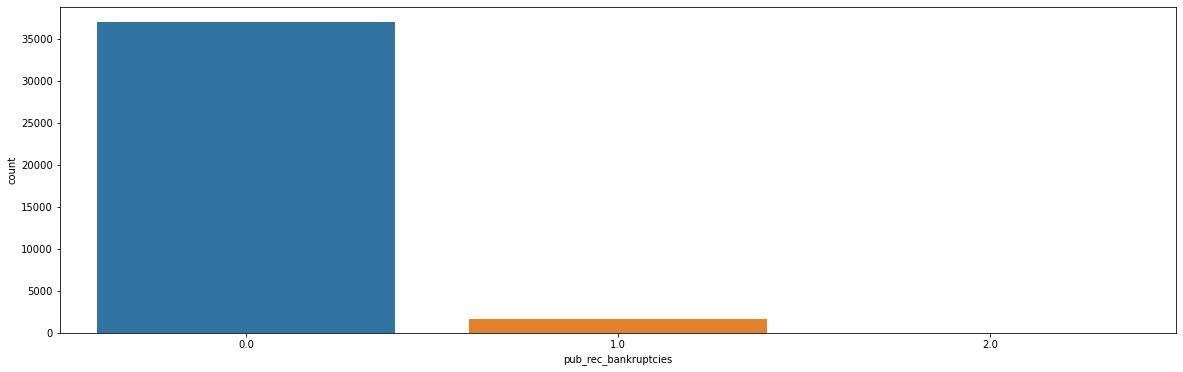

In [120]:
## count plot

sns.countplot(df2.pub_rec_bankruptcies);

**Observations**
- `'pub_rec_bankruptcies'` - Number of public record bankruptcies
- it is assumed that more number of bankruptcies, is bad on the profile of the borrower
- There are 3 categories 0, 1, 2 representing number of bankruptcies
- more than 95% of borrowers has 0 bankruptcies
- can be converted into binary class - 0 and more than 0

### Segmented and Bi-variate Analysis

**Inspecting the correlation among independent variables**

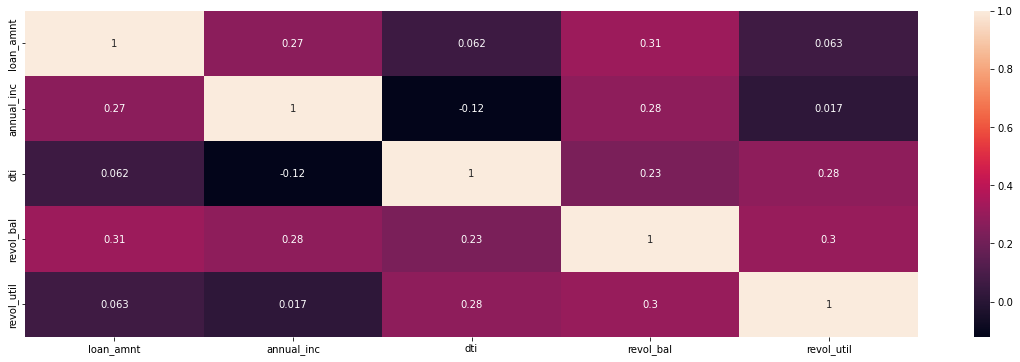

In [121]:
df3 = df2[['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'loan_status']]
sns.heatmap(df3.corr(), annot=True);

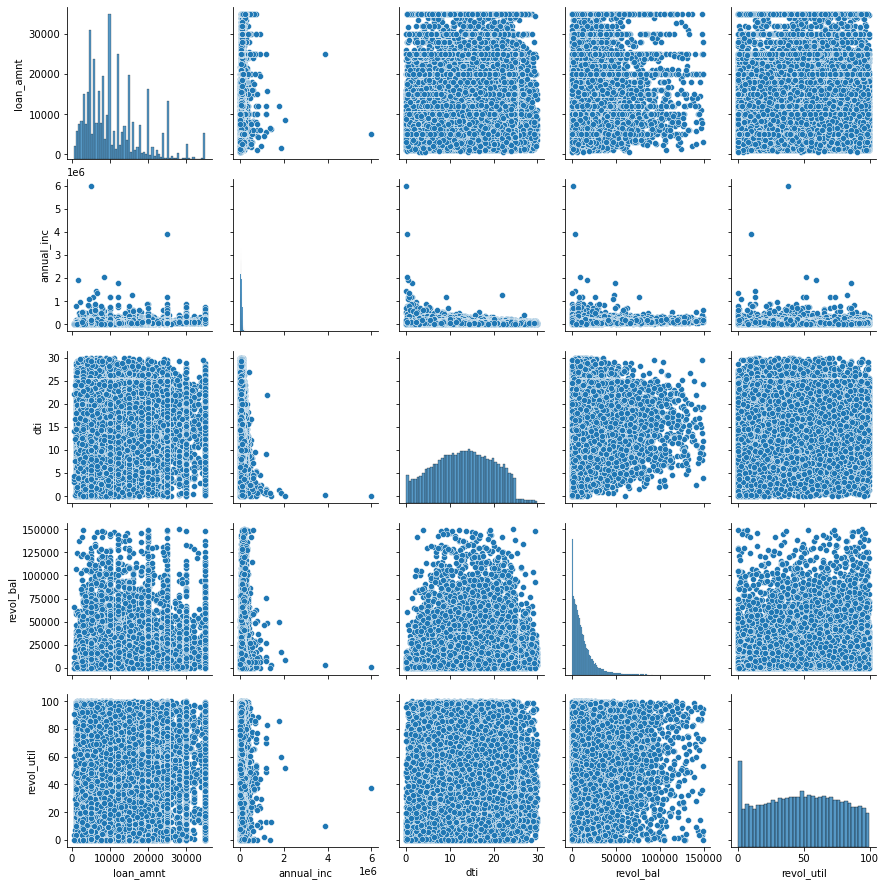

In [122]:
sns.pairplot(df3);

- There is no indication of strong correlation among independent variables

**Loan_status Vs Numerical Variables**

In [123]:
df2.columns

Index(['loan_amnt', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month',
       'adj_earliest_cr_line', 'earliest_cr_line_yr'],
      dtype='object')

In [124]:
## As we have seen in the univariate analysis there exists outliers we will use median as the metrics
## Median of numerical variables segmented by Loan_status


df2.groupby(by = 'loan_status').median()

,loan_amnt,annual_inc,dti,revol_bal,revol_util,issue_year,issue_month,earliest_cr_line_yr
loan_status,,,,,,,,
Charged Off,10000.0,53000.0,14.29,9211.0,58.2,2011.0,8.0,1998.0
Fully Paid,9600.0,60000.0,13.20,8682.5,47.6,2011.0,7.0,1998.0


**Observations**
- Median of continuous variables - `loan-amnt`, `dti`, `revol_bal` and `revol_util` are higher for Charge Off compared to Fully Paid 
- Median of `annual_inc` is higher for fully paid compared to Charge off
- Will analyse each numerical variables vs Loan_amnt individually 

**Loan_status vs Loan_amt**

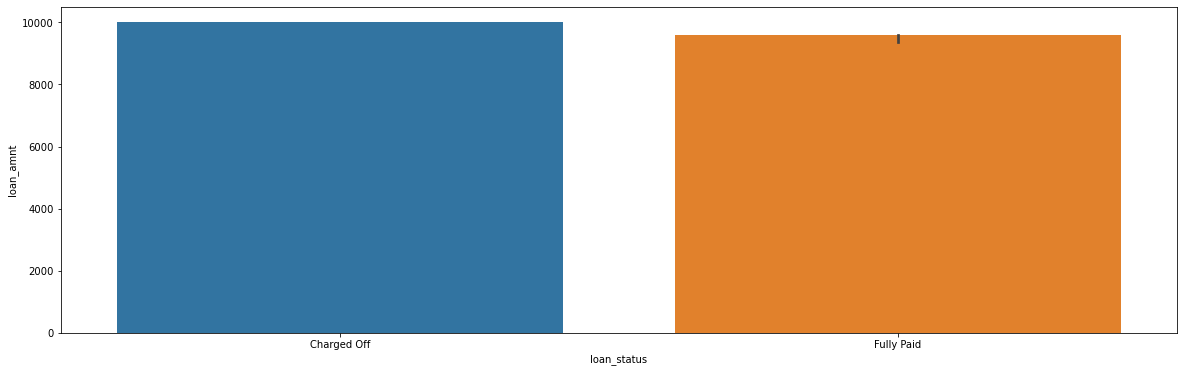

In [125]:
## Ploting the median values for loan amount different loan status

sns.barplot(data=df2, x="loan_status", y="loan_amnt", estimator=np.median);

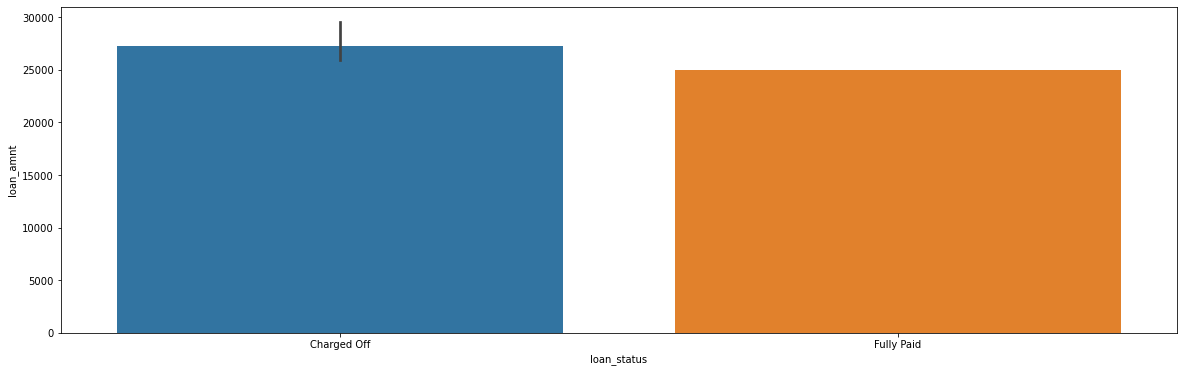

In [126]:
## Ploting the 95th percentile values for loan amount different loan status

sns.barplot(data=df2, x="loan_status", y="loan_amnt", estimator=lambda x: np.quantile(x,0.95));

In [127]:
df2.groupby(by='loan_status')['loan_amnt'].quantile(.95)

loan_status
Charged Off    27300.0
Fully Paid     25000.0
Name: loan_amnt, dtype: float64

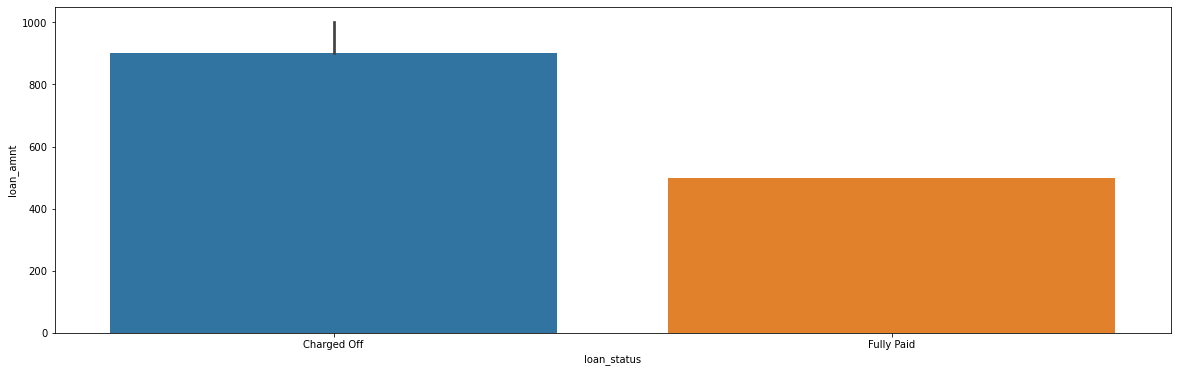

In [128]:
sns.barplot(data=df2, x="loan_status", y="loan_amnt", estimator=np.min);

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


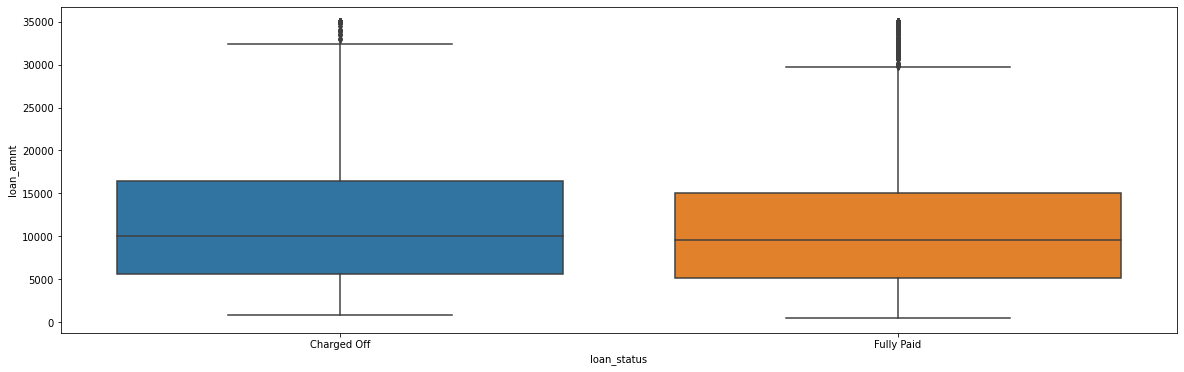

In [129]:
## Box plot comparing loan status with respect to loan amount

sns.boxplot(df2.loan_status, df2.loan_amnt);

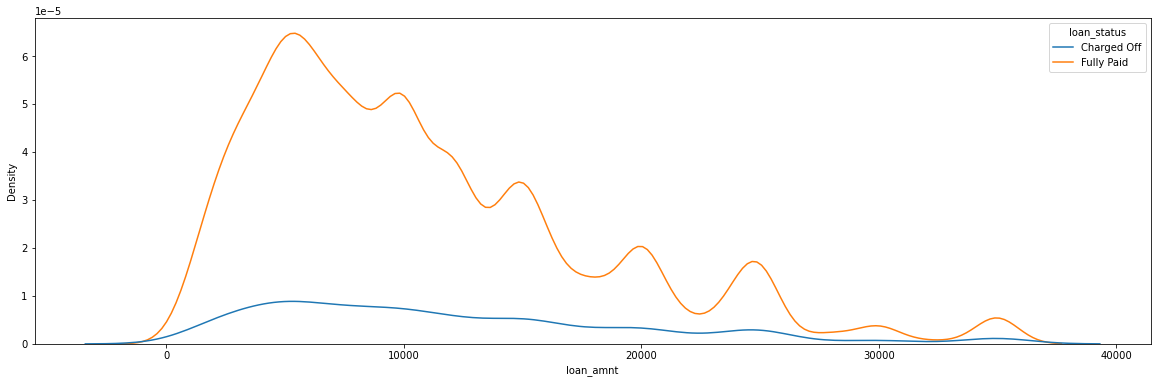

In [130]:
## Visualizing the distribution of loan amount with respect to loan status

sns.kdeplot(data=df2, x="loan_amnt", hue="loan_status");

**Observation**
- We observe that median, 75% percentile, 95% percentile and upper whisker are higher for charged off loans
- This indicates high value loans have higher risk of being charged off, but Fully paid loans also has some outliers 
- As we can see from the KDE plot both Fully paid and Charged off loans spread over the range, Fully paid loans are multi modal and peaking around 5000 mark, even the Charged off segment
- Hence, only considering loan amount independent to other borrowers attributes like bti, annual income etc is not a good measure

**Loan_status vs annual_inc**

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


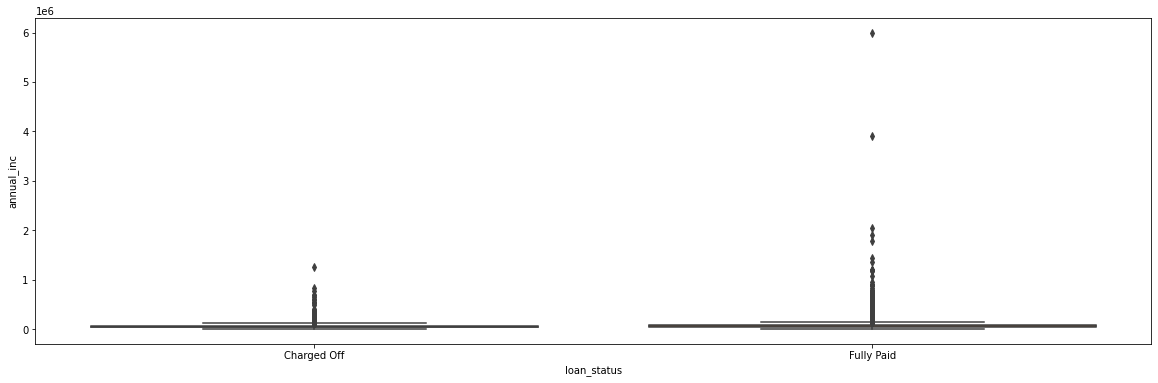

In [131]:
## Box plot comparing loan status with respect to annual_inc

sns.boxplot(df2.loan_status, df2.annual_inc);

**Droping the outliers from annual income**

In [132]:
## getting the index of the outliers

income_outliers_ind = out_liers(df2.annual_inc).index.tolist()
print(income_outliers_ind)

Provided data type is - float64
Lower Limit -23000.0, Upper Limit 145000.0
There are 1762 outliers
[74, 80, 170, 185, 298, 331, 336, 392, 567, 586, 596, 603, 689, 717, 760, 809, 836, 873, 958, 1069, 1134, 1151, 1165, 1210, 1217, 1268, 1348, 1366, 1430, 1433, 1462, 1463, 1473, 1491, 1546, 1569, 1609, 1612, 1617, 1620, 1671, 1691, 1721, 1773, 1788, 1805, 1808, 1836, 1884, 1914, 1949, 1979, 1991, 2093, 2123, 2127, 2131, 2138, 2147, 2250, 2257, 2300, 2331, 2343, 2363, 2364, 2486, 2551, 2598, 2620, 2629, 2682, 2738, 2775, 2781, 2923, 2949, 2952, 2961, 2963, 2972, 2983, 3000, 3047, 3095, 3133, 3151, 3152, 3164, 3165, 3168, 3177, 3218, 3236, 3278, 3301, 3349, 3370, 3377, 3413, 3439, 3455, 3471, 3475, 3482, 3486, 3495, 3498, 3503, 3512, 3521, 3544, 3556, 3567, 3580, 3655, 3709, 3718, 3725, 3735, 3756, 3773, 3783, 3789, 3792, 3803, 3826, 3831, 3844, 3846, 3852, 3863, 3868, 3877, 3901, 3905, 3912, 3915, 3949, 3970, 3994, 4006, 4043, 4057, 4129, 4155, 4167, 4179, 4183, 4190, 4229, 4233, 4254, 425

In [133]:
## droping the outliers

df4 = df2.drop(index=income_outliers_ind)
print(df4.shape)

(36815, 27)


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


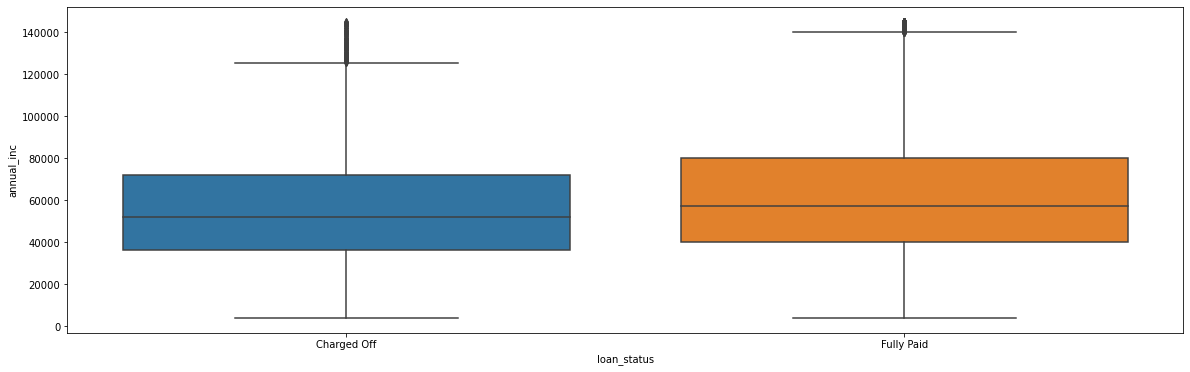

In [134]:
## Box plot comparing loan status with respect to annual_inc after removing the outliers

sns.boxplot(df4.loan_status, df4.annual_inc);

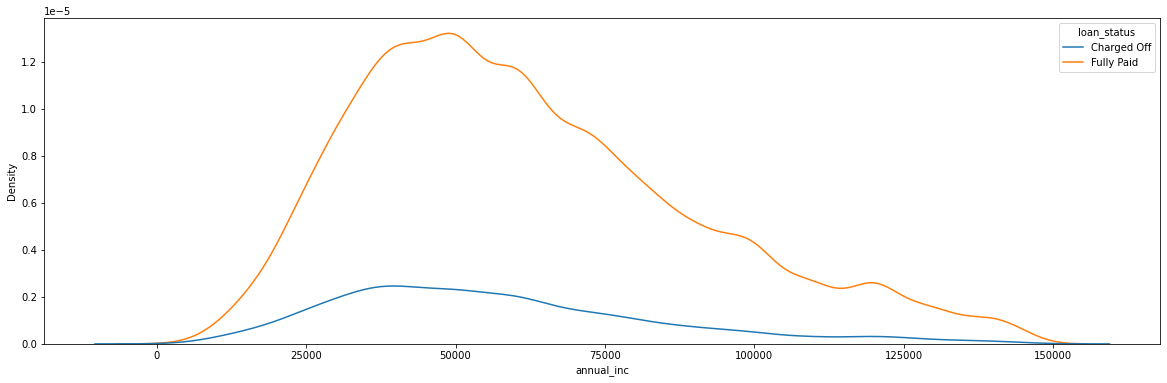

In [135]:
## Visualizing the distribution of annual_inc with respect to loan status after removing the outliers

sns.kdeplot(data=df4, x="annual_inc", hue="loan_status");

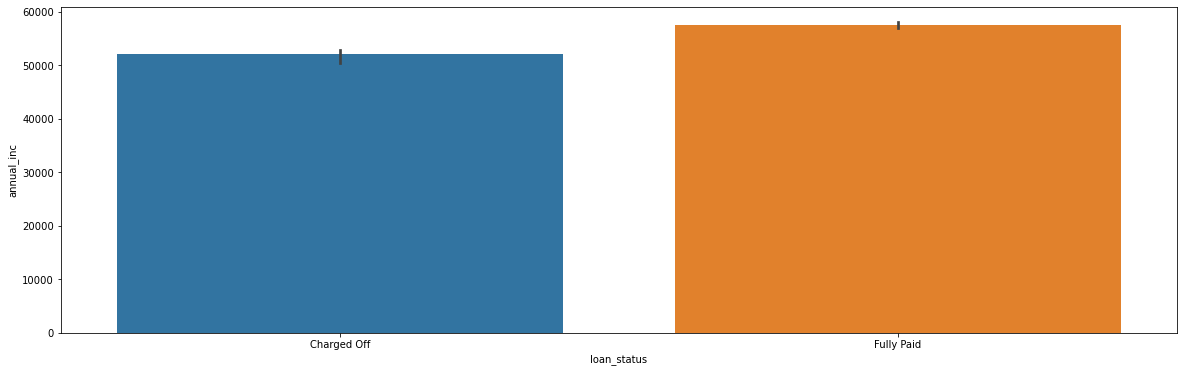

In [136]:
## Ploting the median values for annual_inc different loan status

sns.barplot(data=df4, x="loan_status", y="annual_inc", estimator=np.median);

In [137]:
df4.groupby(by='loan_status').median()['annual_inc']

loan_status
Charged Off    51996.0
Fully Paid     57496.0
Name: annual_inc, dtype: float64

**Observations**
- after removing the outliers the median annual income (57496) of the borrowers who have fully paid the loan is significantly higher than those who defaulted the loan (51996)
- Same can also be observed in the box plot where the median, Q3 and top whisker is higher for fully paid borrowers 
-‘annual_inc’, when used along with other variables can be a good indicator of risk, we will use this variable with other categorical variables to ensure the usefulness 

**Loan_status vs dti**

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


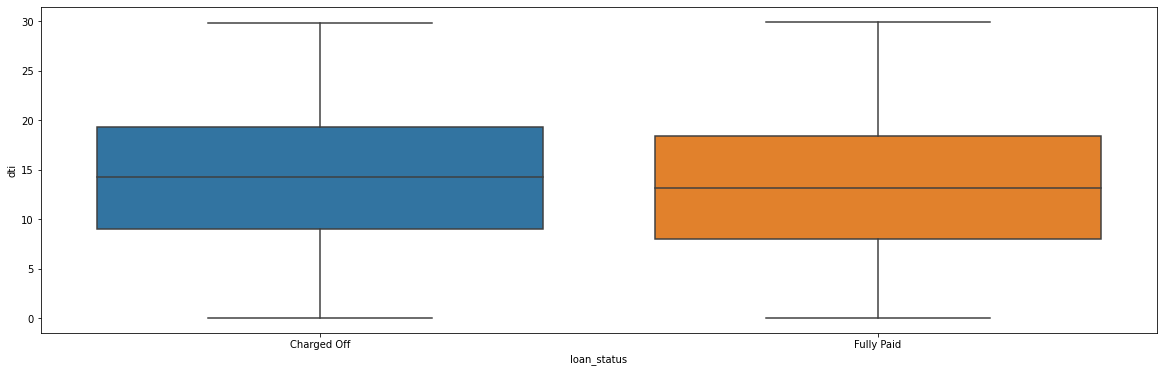

In [138]:
## Box plot comparing loan status with respect to dti

sns.boxplot(df2.loan_status, df2.dti);

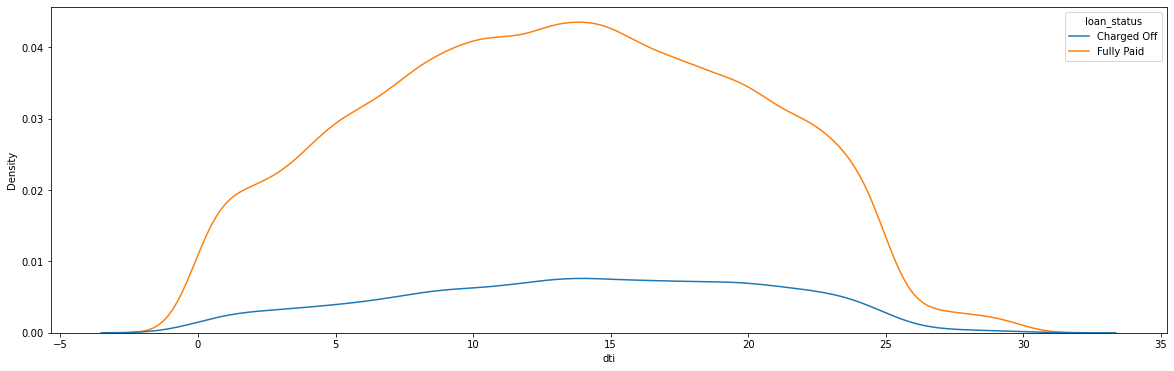

In [139]:
## Visualizing the distribution of dti with respect to loan status

sns.kdeplot(data=df2, x="dti", hue="loan_status");

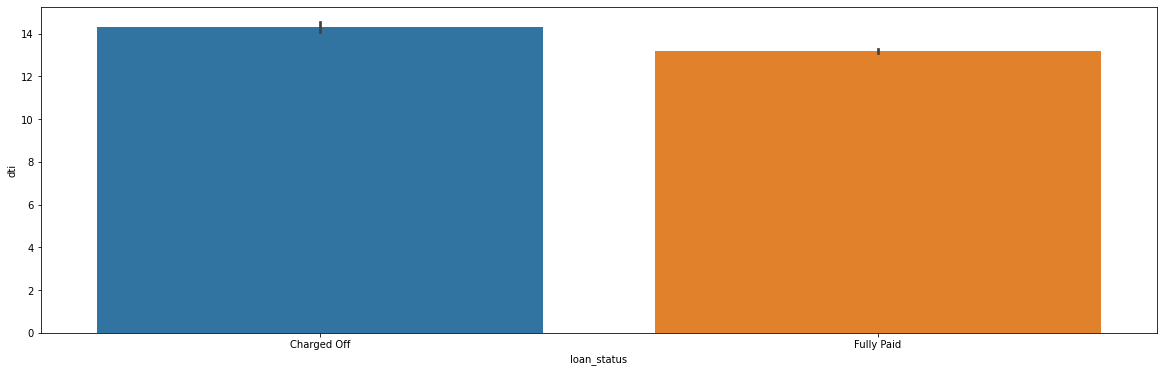

In [140]:
## Ploting the median values for dti different loan status

sns.barplot(data=df2, x="loan_status", y="dti", estimator=np.median);

In [141]:
df2.groupby(by='loan_status').median()['dti']

loan_status
Charged Off    14.29
Fully Paid     13.20
Name: dti, dtype: float64

**Observation**
- Median for dti for Charge off segment is 14.29, which is higher compared to Fully Paid segment, which is 13.20
- From boxplot Median, Q3 are higher for Charged off segment 
- It indicates higher 'dti' has higher risk of loan been Charged off
- ‘dit’ to be analysed along with other categorical variables

**Loan_status vs revol_bal**

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


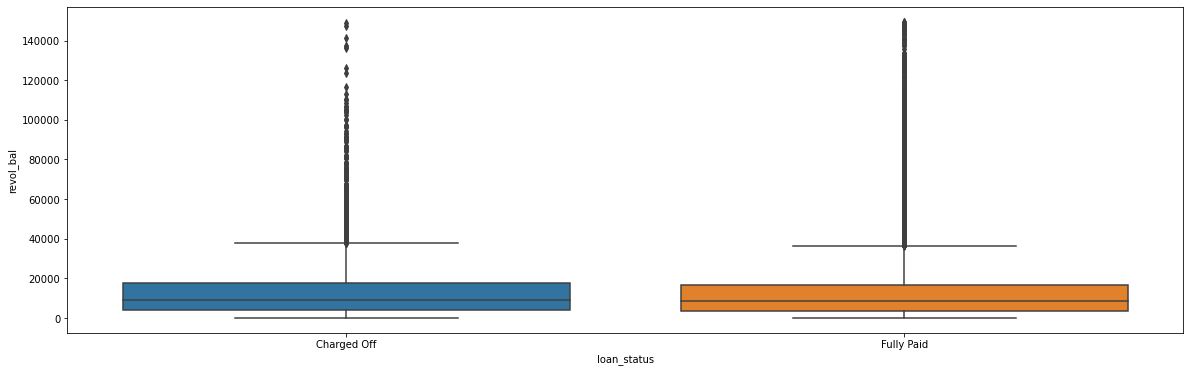

In [142]:
## Box plot comparing loan status with respect to revol_bal

sns.boxplot(df2.loan_status, df2.revol_bal);

- Droping the outliers

In [143]:
## getting the index of the outliers

revol_bal_outliers_ind = out_liers(df2.revol_bal).index.tolist()
print(revol_bal_outliers_ind)

Provided data type is - int64
Lower Limit -16243.0, Upper Limit 36805.0
There are 2423 outliers
[42, 46, 74, 166, 226, 331, 357, 427, 430, 466, 567, 570, 609, 734, 756, 757, 803, 836, 884, 929, 958, 1128, 1133, 1151, 1181, 1210, 1366, 1371, 1372, 1420, 1430, 1463, 1473, 1491, 1529, 1573, 1612, 1620, 1633, 1691, 1697, 1763, 1772, 1787, 1791, 1797, 1805, 1883, 1913, 1931, 1993, 2017, 2057, 2216, 2313, 2319, 2430, 2521, 2556, 2568, 2622, 2643, 2682, 2732, 2781, 2797, 2831, 2842, 2902, 2920, 2966, 2972, 2976, 2983, 2989, 3006, 3010, 3037, 3047, 3060, 3066, 3091, 3123, 3135, 3154, 3163, 3164, 3167, 3176, 3194, 3197, 3210, 3216, 3231, 3235, 3249, 3256, 3275, 3284, 3301, 3312, 3344, 3349, 3364, 3377, 3383, 3411, 3413, 3434, 3439, 3456, 3486, 3495, 3511, 3512, 3521, 3531, 3534, 3536, 3544, 3546, 3556, 3567, 3568, 3580, 3591, 3595, 3607, 3656, 3710, 3725, 3733, 3763, 3773, 3783, 3792, 3807, 3838, 3846, 3868, 3874, 3898, 3901, 3904, 3912, 3915, 3916, 3921, 3935, 3945, 4004, 4030, 4038, 4045, 404

In [144]:
## droping the outliers

df5 = df2.drop(index=revol_bal_outliers_ind)
print(df5.shape)

(36154, 27)


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


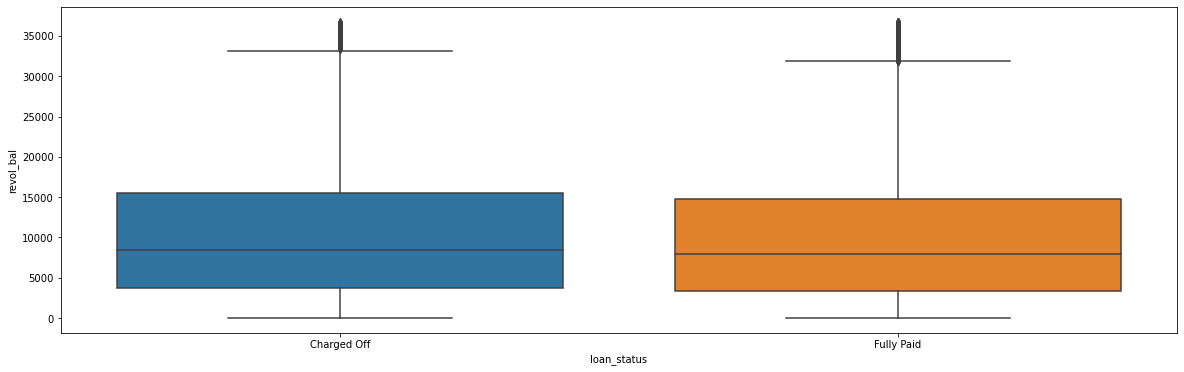

In [145]:
## Box plot comparing loan status with respect to revol_bal after removing the outliers

sns.boxplot(df5.loan_status, df5.revol_bal);

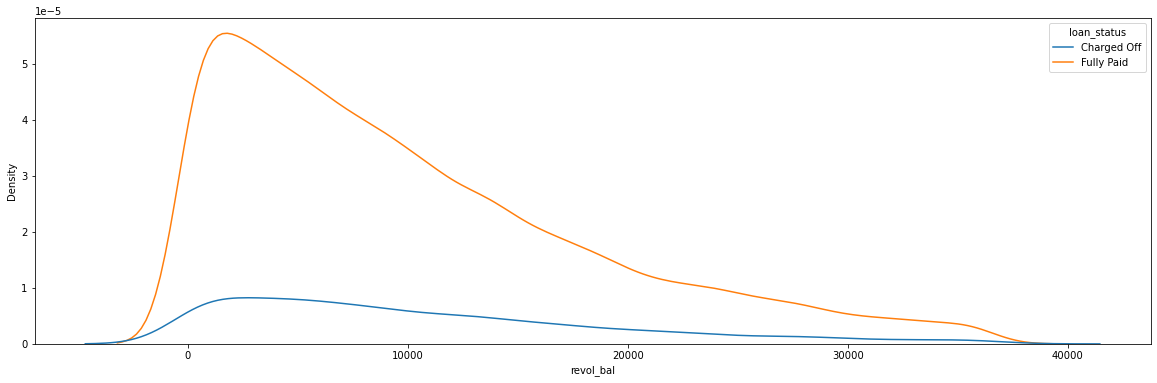

In [146]:
## Visualizing the distribution of revol_bal with respect to loan status after removing the outliers

sns.kdeplot(data=df5, x="revol_bal", hue="loan_status");

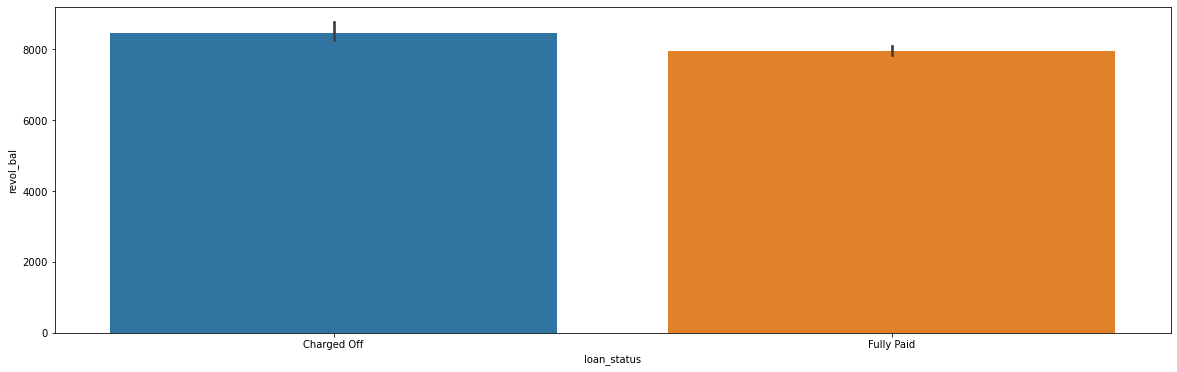

In [147]:
## Ploting the median values for revol_bal different loan status

sns.barplot(data=df5, x="loan_status", y="revol_bal", estimator=np.median);

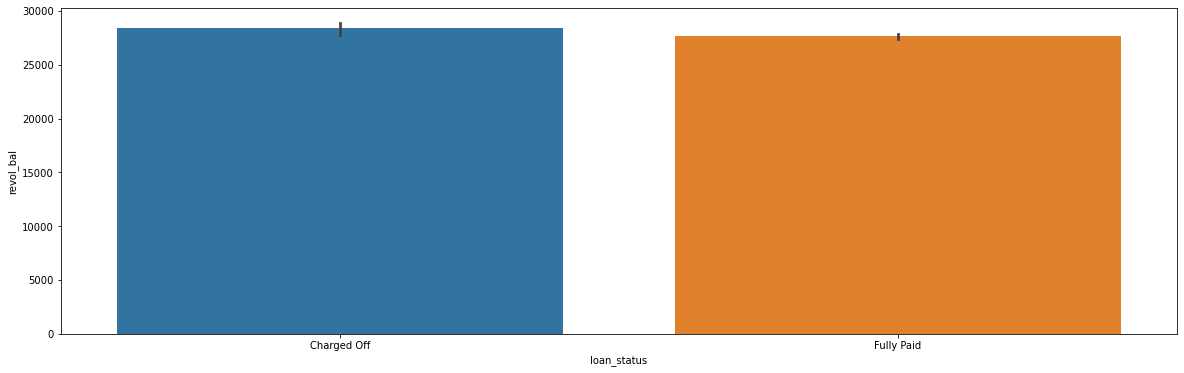

In [148]:
## Ploting the 95% percentile values for revol_bal different loan status

sns.barplot(data=df5, x="loan_status", y="revol_bal", estimator=lambda x: np.quantile(x,0.95));

In [149]:
df5.groupby(by='loan_status').median()['revol_bal']

loan_status
Charged Off    8466.0
Fully Paid     7959.0
Name: revol_bal, dtype: float64

**Observation**
- Median for revol_bal for Charge off segment is 8466, which is quite high compared to Fully Paid segment, which is 7959
- From boxplot Median, Q3 and top whisker are higher for Charged off segment 
- It indicates higher 'revol_bal' has higher risk of loan been Charged off
- ‘revol_bal’ to be analysed along with other categorical values 

**Loan_status vs revol_util**

C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


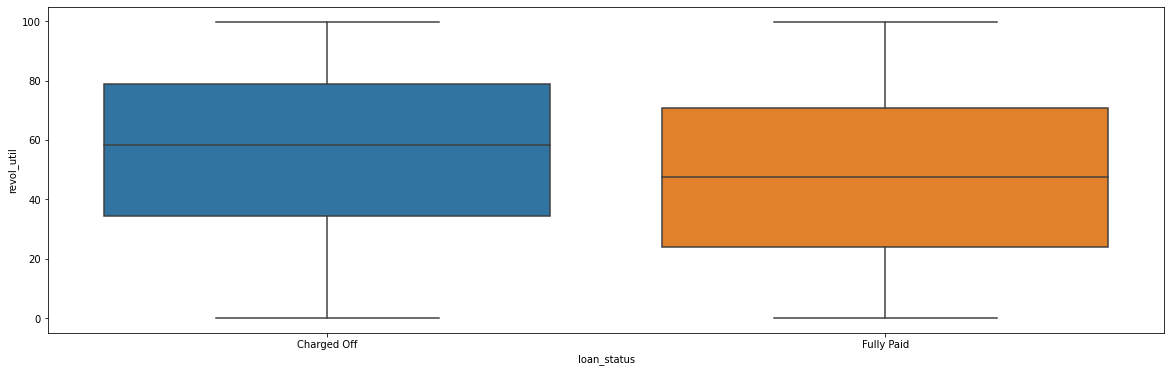

In [150]:
## Box plot comparing loan status with respect to revol_util

sns.boxplot(df2.loan_status, df2.revol_util);

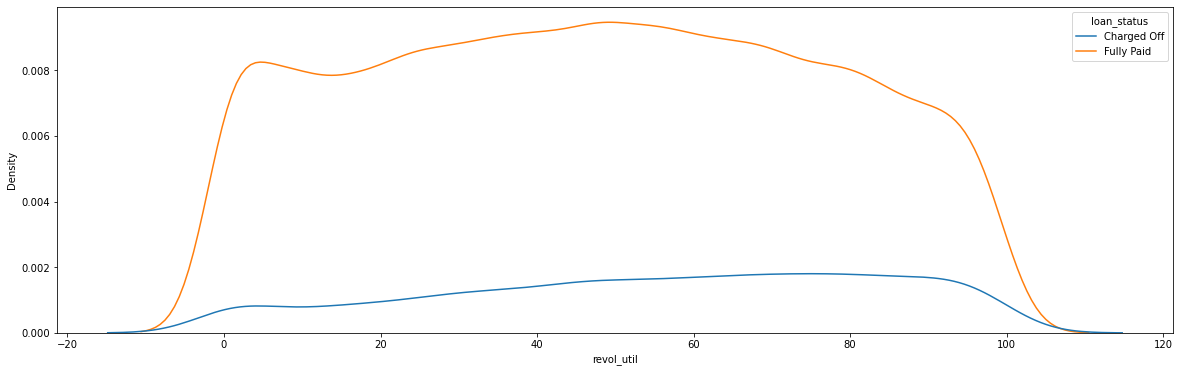

In [151]:
## Visualizing the distribution of revol_util with respect to loan status

sns.kdeplot(data=df2, x="revol_util", hue="loan_status");

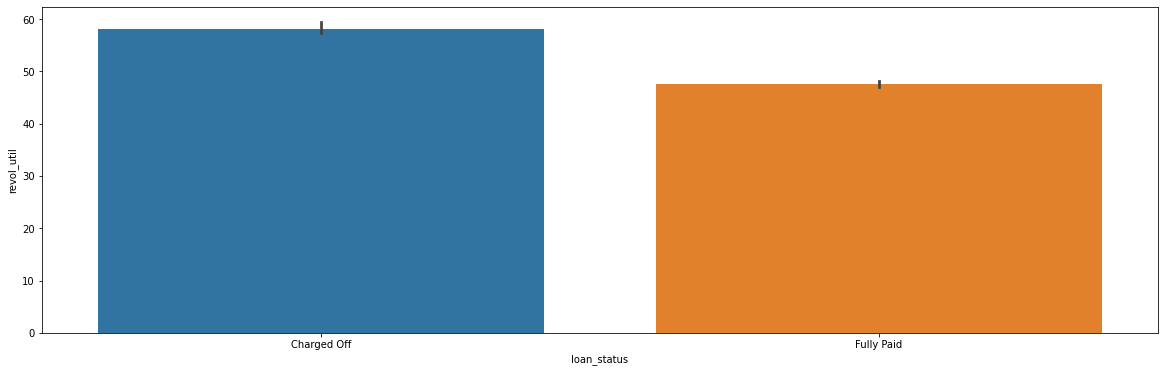

In [152]:
## Ploting the median values for revol_util different loan status

sns.barplot(data=df2, x="loan_status", y="revol_util", estimator=np.median);

In [153]:
df2.groupby(by='loan_status').median()['revol_util']

loan_status
Charged Off    58.2
Fully Paid     47.6
Name: revol_util, dtype: float64

**Observation**
- Median for `revol_util` for Charge off segment is 58.2, which is quite high compared to Fully Paid segment, which is 47.6
- From boxplot Q1, Median, Q3 are higher for Charged off segment 
- It indicates higher 'revol_util' has higher risk of loan been Charged off
- ‘revol_util’ to be analysed along with other categorical values 

**Loan_status vs grade**

In [154]:
## inspecting the proportion of each grade counts across loan status segments

ct_status_grade = pd.crosstab(df2.grade, df2.loan_status, normalize= 'index', margins=True,)
ct_status_grade.drop(index=['All'], inplace=True)
ct_status_grade

loan_status,Charged Off,Fully Paid
grade,,
A,0.059930,0.940070
B,0.122056,0.877944
C,0.171943,0.828057
D,0.219862,0.780138
E,0.268494,0.731506
F,0.326844,0.673156
G,0.337793,0.662207


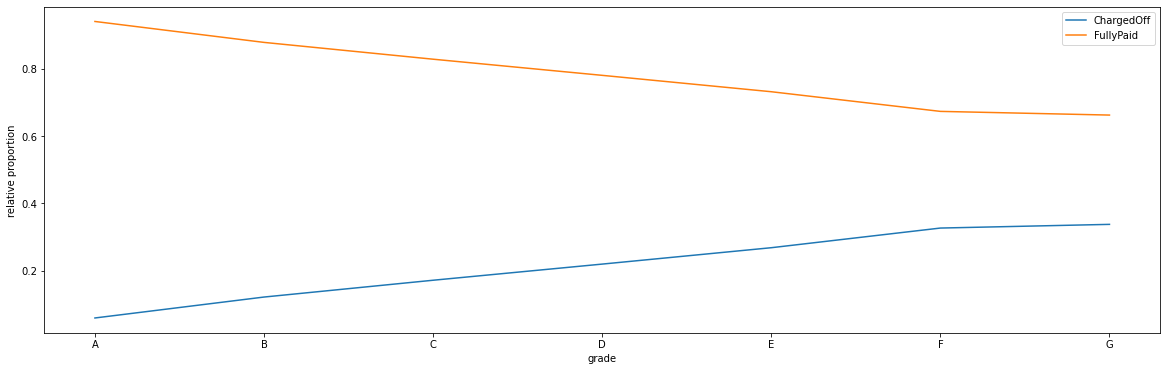

In [155]:
plt.plot(ct_status_grade['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_grade['Fully Paid'], label = 'FullyPaid')
plt.xlabel('grade')
plt.ylabel('relative proportion')
plt.legend();

In [156]:
## Pivoting the median value of annual income across loan status and grade, with outliers removed for annual_inc
pivot_anualInc_grade = df4.pivot_table(values='annual_inc', index='grade', columns='loan_status', aggfunc=np.median)
pivot_anualInc_grade

loan_status,Charged Off,Fully Paid
grade,,
A,45444.0,57000.0
B,50000.0,56500.0
C,50000.0,55000.0
D,53000.0,58000.0
E,57300.0,63000.0
F,64575.0,70802.0
G,65000.0,77500.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


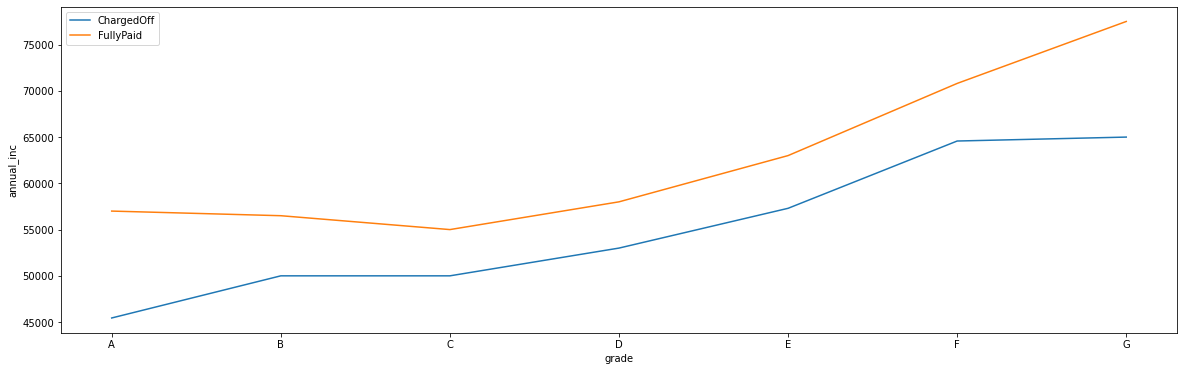

In [157]:
plt.plot(pivot_anualInc_grade['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_anualInc_grade['Fully Paid'], label = 'FullyPaid')
plt.xlabel('grade')
plt.ylabel('annual_inc')
plt.legend();

In [158]:
## Pivoting the median value of dti income across loan status and grade
pivot_dti_grade = df2.pivot_table(values='dti', index='grade', columns='loan_status', aggfunc=np.median)
pivot_dti_grade

loan_status,Charged Off,Fully Paid
grade,,
A,13.24,11.40
B,14.31,13.40
C,14.69,13.94
D,14.03,14.27
E,14.54,14.33
F,14.54,14.73
G,14.83,14.63


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


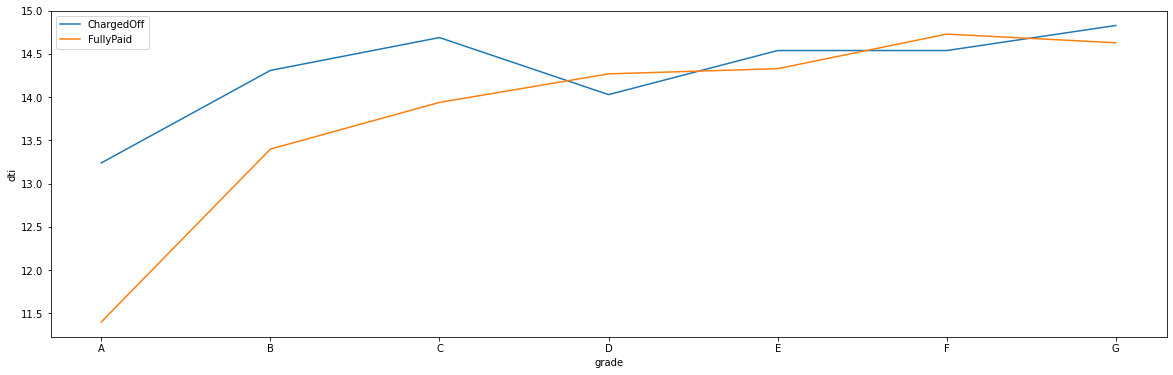

In [159]:
plt.plot(pivot_dti_grade['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_grade['Fully Paid'], label = 'FullyPaid')
plt.xlabel('grade')
plt.ylabel('dti')
plt.legend();

In [160]:
## Pivoting the median value of revol_bal across loan status and grade, with outliers removed for revol_bal
pivot_revol_bal_grade = df5.pivot_table(values='revol_bal', index='grade', columns='loan_status', aggfunc=np.median)
pivot_revol_bal_grade

loan_status,Charged Off,Fully Paid
grade,,
A,7072.0,6203.5
B,7590.5,8403.0
C,8641.0,8396.5
D,8180.0,8716.5
E,10871.0,10430.0
F,11814.0,10362.0
G,11413.0,12717.5


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


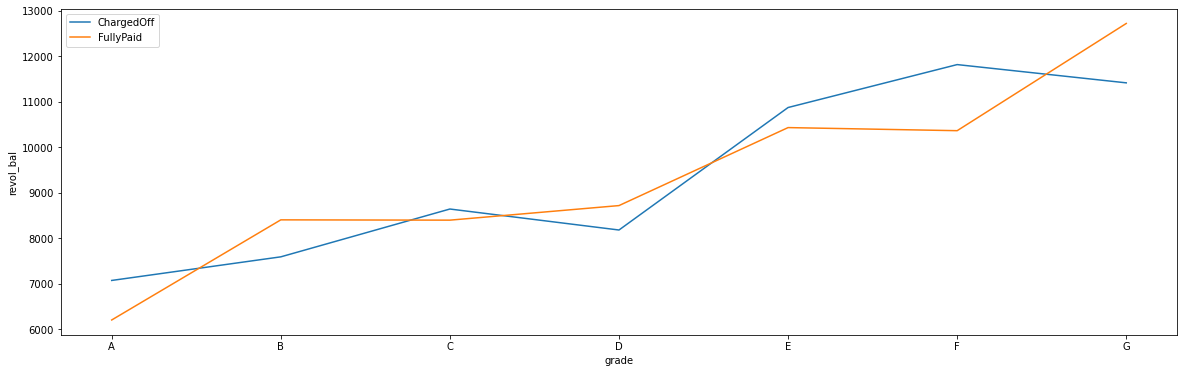

In [161]:
plt.plot(pivot_revol_bal_grade['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revol_bal_grade['Fully Paid'], label = 'FullyPaid')
plt.xlabel('grade')
plt.ylabel('revol_bal')
plt.legend();

In [162]:
## Pivoting the median value of revol_bal across loan status and grade, with outliers removed for revol_bal
pivot_revol_util_grade = df2.pivot_table(values='revol_util', index='grade', columns='loan_status', aggfunc=np.median)
pivot_revol_util_grade

loan_status,Charged Off,Fully Paid
grade,,
A,33.4,25.40
B,47.2,47.20
C,58.1,59.40
D,65.6,68.40
E,75.1,72.25
F,77.0,75.70
G,81.1,85.65


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


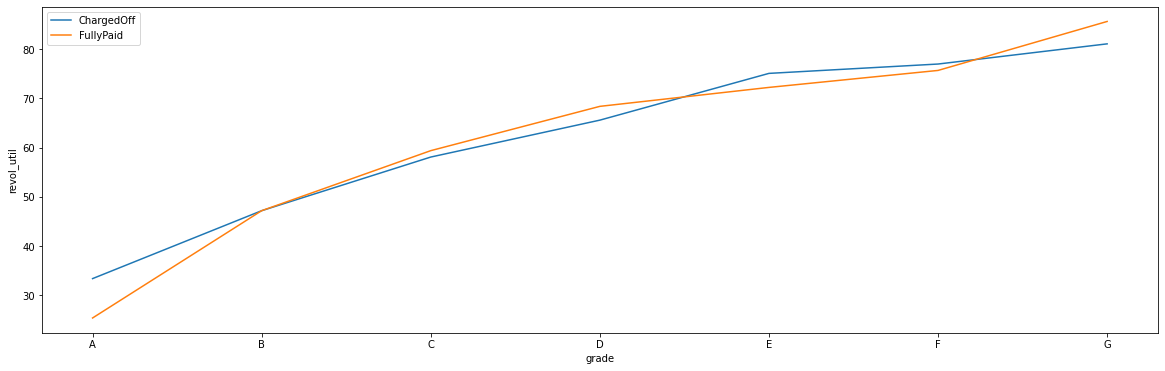

In [163]:
plt.plot(pivot_revol_util_grade['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revol_util_grade['Fully Paid'], label = 'FullyPaid')
plt.xlabel('grade')
plt.ylabel('revol_util')
plt.legend();

**Observations**
- The risk of Charge Off incease linearly for Grade segments from A to G, higher for grades D, E, F and G
- The median `annual_inc` across the grade is low for Charged off segmetn
- Higher median value for `dti` for grades A, B, C good indicators to detect risks for these grades

**Loan_status vs sub_grade**

In [164]:
## inspecting the proportion of each sub_grade counts across loan status segments

ct_status_subgrade = pd.crosstab(df2.sub_grade, df2.loan_status, normalize= 'index', margins=True,)
ct_status_subgrade.drop(index=['All'], inplace=True)
ct_status_subgrade.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
sub_grade,,
F5,0.477876,0.522124
G3,0.422222,0.577778
G2,0.363636,0.636364
F4,0.350993,0.649007
G5,0.344828,0.655172
G1,0.329787,0.670213
F2,0.300429,0.699571
F1,0.298361,0.701639
E4,0.297170,0.702830


**Observations**
- The risk of Charge Off is relatively high for sub-groups of D, E, F, G 
- Specially for sub-groupd - F5, G3, G2, F4, G5, G1 and F2, which is 30% and more

**Loan_status vs emp_length**

In [165]:
## inspecting the proportion of each emp_length counts across loan status segments

ct_status_emplen = pd.crosstab(df2.emp_length, df2.loan_status, normalize= 'index', margins=True,)
# ct_status_emplen.drop(index=['All'], inplace=True)
ct_status_emplen.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
emp_length,,
10+ years,0.163743,0.836257
7 years,0.153711,0.846289
All,0.145864,0.854136
1 year,0.143894,0.856106
5 years,0.143394,0.856606
< 1 year,0.141748,0.858252
6 years,0.141605,0.858395
8 years,0.141463,0.858537
3 years,0.138335,0.861665


In [166]:
## Pivoting the median value of loan_amnt across loan status and emp_length
pivot_loaAmt_empLength = df2.pivot_table(values='loan_amnt', index='emp_length', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_empLength

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,8912.5,8000.0
10+ years,12000.0,10000.0
2 years,9000.0,8287.5
3 years,10000.0,9000.0
4 years,10000.0,9600.0
5 years,10000.0,9775.0
6 years,11100.0,10000.0
7 years,12000.0,10000.0
8 years,12000.0,10000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


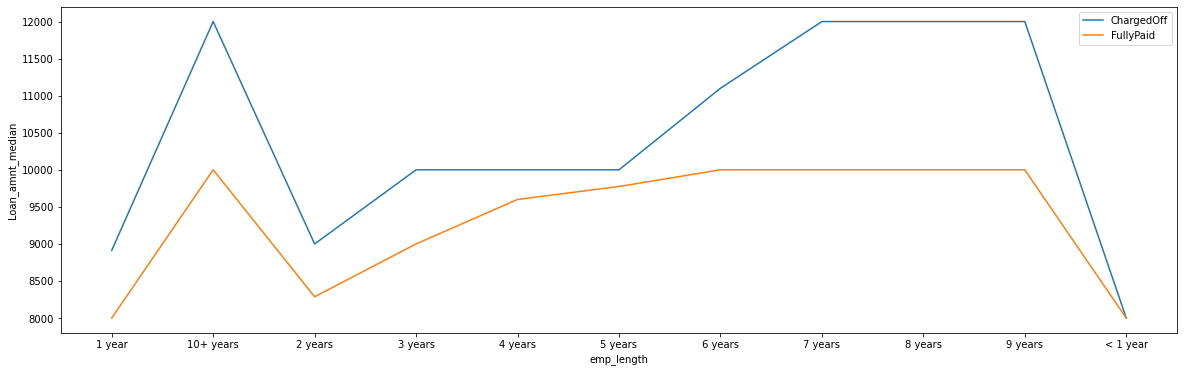

In [167]:
plt.plot(pivot_loaAmt_empLength['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_empLength['Fully Paid'], label = 'FullyPaid')
plt.xlabel('emp_length')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [168]:
## Pivoting the median value of annual income across loan status and emp_length, with outliers removed for annual_inc
pivot_annInc_empLength = df4.pivot_table(values='annual_inc', index='emp_length', columns='loan_status', aggfunc=np.median)
pivot_annInc_empLength

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,47500.0,51000.0
10+ years,58044.0,65000.0
2 years,45000.0,51700.0
3 years,50400.0,55000.0
4 years,50000.0,56004.0
5 years,53000.0,56461.0
6 years,55000.0,58811.0
7 years,51531.5,60000.0
8 years,56500.0,60000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


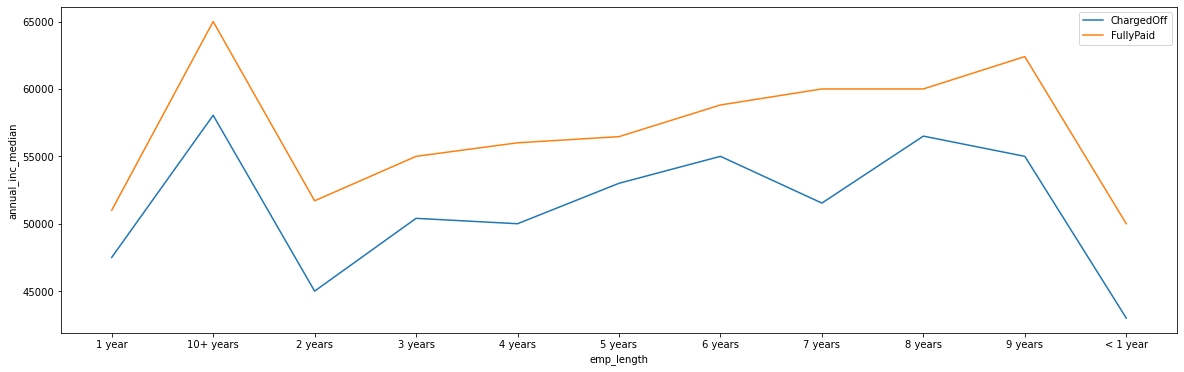

In [169]:
plt.plot(pivot_annInc_empLength['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_empLength['Fully Paid'], label = 'FullyPaid')
plt.xlabel('emp_length')
plt.ylabel('annual_inc_median')
plt.legend();

In [170]:
## Pivoting the median value of dti income across loan status and emp_length
pivot_dti_empLength = df2.pivot_table(values='dti', index='emp_length', columns='loan_status', aggfunc=np.median)
pivot_dti_empLength

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,14.350,12.820
10+ years,14.560,13.465
2 years,13.990,13.090
3 years,14.100,13.090
4 years,13.610,13.115
5 years,14.485,13.325
6 years,14.560,13.780
7 years,15.350,13.500
8 years,15.320,13.625


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


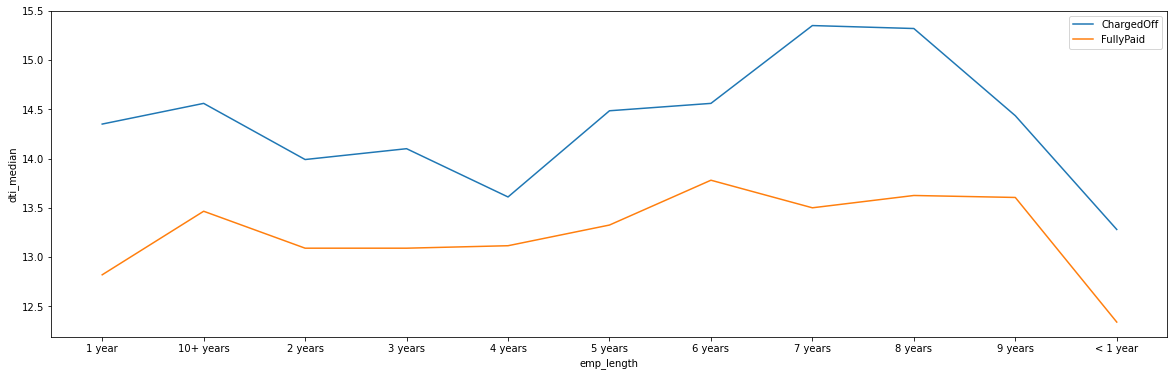

In [171]:
plt.plot(pivot_dti_empLength['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_empLength['Fully Paid'], label = 'FullyPaid')
plt.xlabel('emp_length')
plt.ylabel('dti_median')
plt.legend();

In [172]:
## Pivoting the median value of revol_bal across loan status and emp_length
pivot_revolUtil_empLength = df2.pivot_table(values='revol_util', index='emp_length', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_empLength

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,54.10,48.10
10+ years,58.80,47.65
2 years,57.70,47.65
3 years,55.10,46.50
4 years,58.55,48.00
5 years,60.65,47.00
6 years,62.40,48.90
7 years,59.90,48.80
8 years,58.50,45.20


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


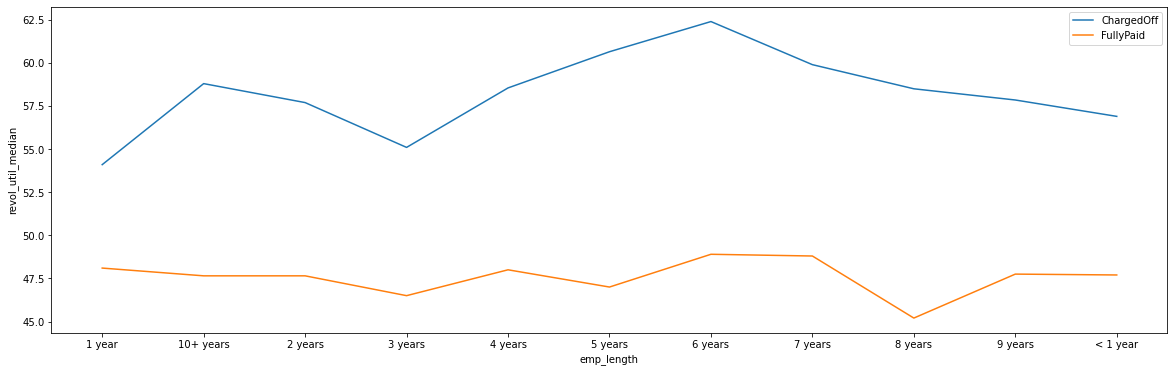

In [173]:
plt.plot(pivot_revolUtil_empLength['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_empLength['Fully Paid'], label = 'FullyPaid')
plt.xlabel('emp_length')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment and Fully paid segment acorss all the categories of 'emp_length' is almost constant
- However, the median values of 'loan_amnt', 'annual_inc, 'dti', and 'revol_util' differ grately for both segments of loan_status across all the categories of 'emp_length', median value is higher for above variable for Charged Off Segment
- ‘emp_length’ when used with these variables can be a good indicator

**Loan_status vs home_ownership**

In [174]:
## inspecting the proportion of each home_ownership counts across loan status segments

ct_status_home = pd.crosstab(df2.home_ownership, df2.loan_status, normalize= 'index', margins=True,)
# ct_status_home.drop(index=['All'], inplace=True)
ct_status_home.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
home_ownership,,
OTHER,0.183673,0.816327
RENT,0.153601,0.846399
OWN,0.148908,0.851092
All,0.145864,0.854136
MORTGAGE,0.136713,0.863287


In [175]:
## Pivoting the median value of loan_amnt across home_ownership and loan status
pivot_loaAmt_homeOwnership = df2.pivot_table(values='loan_amnt', index='home_ownership', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_homeOwnership

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,12000,10000
OTHER,14000,8500
OWN,9600,8000
RENT,9000,8000


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


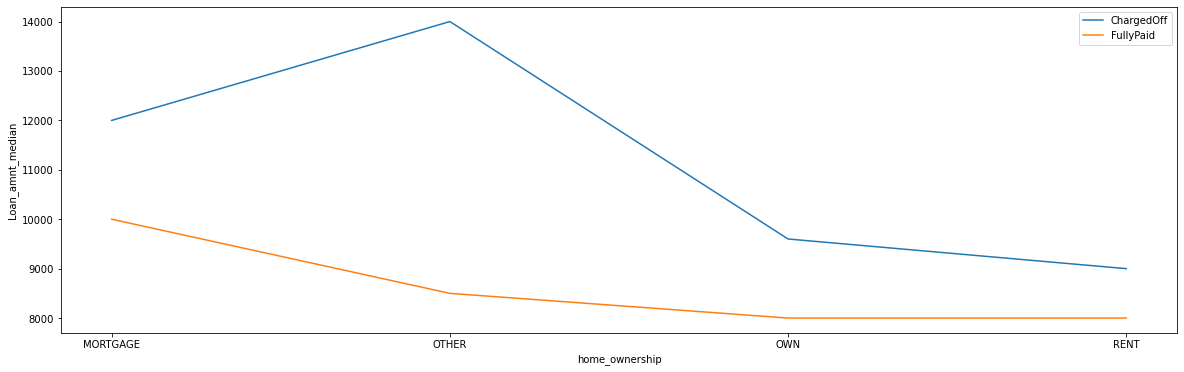

In [176]:
plt.plot(pivot_loaAmt_homeOwnership['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_homeOwnership['Fully Paid'], label = 'FullyPaid')
plt.xlabel('home_ownership')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [177]:
## Pivoting the median value of annual income across loan status and home_ownership, with outliers removed for annual_inc
pivot_annInc_homeOwnership = df4.pivot_table(values='annual_inc', index='home_ownership', columns='loan_status', aggfunc=np.median)
pivot_annInc_homeOwnership

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,62000.0,69000.0
OTHER,57500.0,58300.0
OWN,45000.0,48000.0
RENT,45000.0,50000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


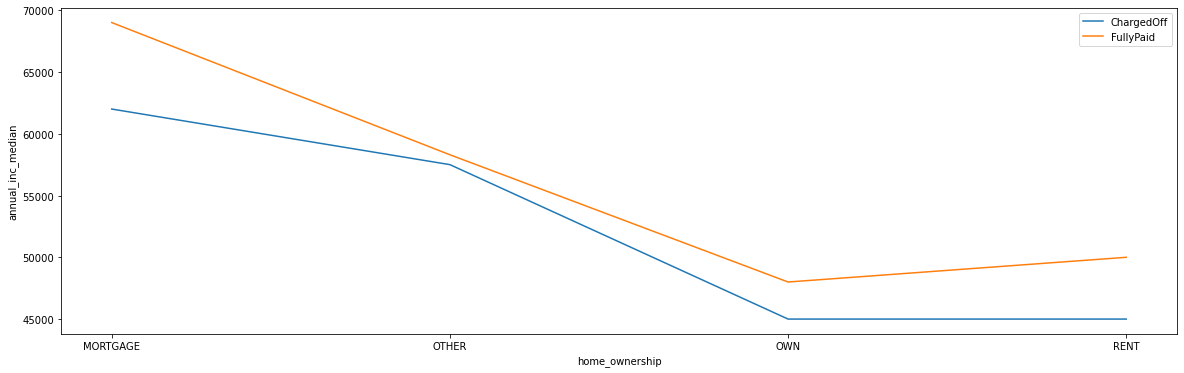

In [178]:
plt.plot(pivot_annInc_homeOwnership['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_homeOwnership['Fully Paid'], label = 'FullyPaid')
plt.xlabel('home_ownership')
plt.ylabel('annual_inc_median')
plt.legend();

In [179]:
## Pivoting the median value of dti income across loan status and home_ownership
pivot_dti_homeOwnership = df2.pivot_table(values='dti', index='home_ownership', columns='loan_status', aggfunc=np.median)
pivot_dti_homeOwnership

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,14.330,12.92
OTHER,12.065,10.33
OWN,14.830,13.17
RENT,14.210,13.50


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


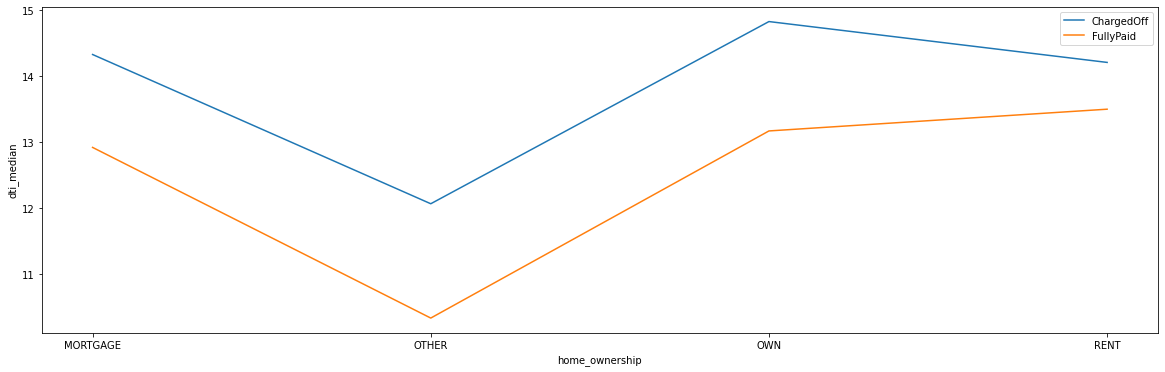

In [180]:
plt.plot(pivot_dti_homeOwnership['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_homeOwnership['Fully Paid'], label = 'FullyPaid')
plt.xlabel('home_ownership')
plt.ylabel('dti_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment is higher for "OTHER" compated to other segments of home_ownership
- However, the median values of 'loan_amnt', 'annual_inc, 'dti', differ grately for both segments of loan_status across all the categories of 'home_ownership', median value is higher for `Charged Off Segment`
- ‘home_ownership’ can be a good indicator, when used with above mentioned variables

**Loan_status vs verification_status**

In [181]:
## inspecting the proportion of each verification_status counts across loan status segments

ct_status_verifi = pd.crosstab(df2.verification_status, df2.loan_status, normalize= 'index', margins=True,)
# ct_status_verifi.drop(index=['All'], inplace=True)
ct_status_verifi.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
verification_status,,
Verified,0.168032,0.831968
Source Verified,0.148186,0.851814
All,0.145864,0.854136
Not Verified,0.128310,0.871690


In [182]:
## Pivoting the median value of loan_amnt across verification_status and loan status
pivot_loaAmt_veriStatus = df2.pivot_table(values='loan_amnt', index='verification_status', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_veriStatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,7575,7500
Source Verified,9600,8500
Verified,16000,15000


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


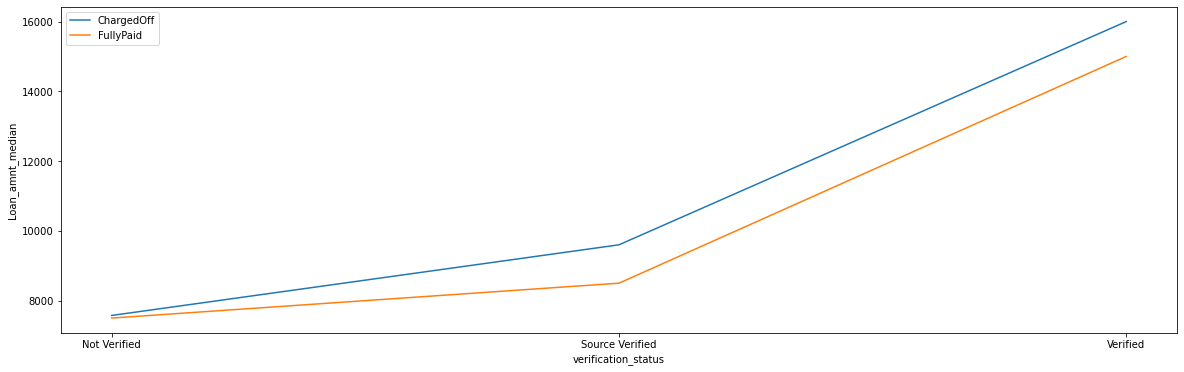

In [183]:
plt.plot(pivot_loaAmt_veriStatus['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_veriStatus['Fully Paid'], label = 'FullyPaid')
plt.xlabel('verification_status')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [184]:
## Pivoting the median value of annual income across loan status and verification_status, with outliers removed for annual_inc
pivot_annInc_veriStatus = df4.pivot_table(values='annual_inc', index='verification_status', columns='loan_status', aggfunc=np.median)
pivot_annInc_veriStatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,48000.0,52000.0
Source Verified,50000.0,54996.0
Verified,60000.0,67200.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


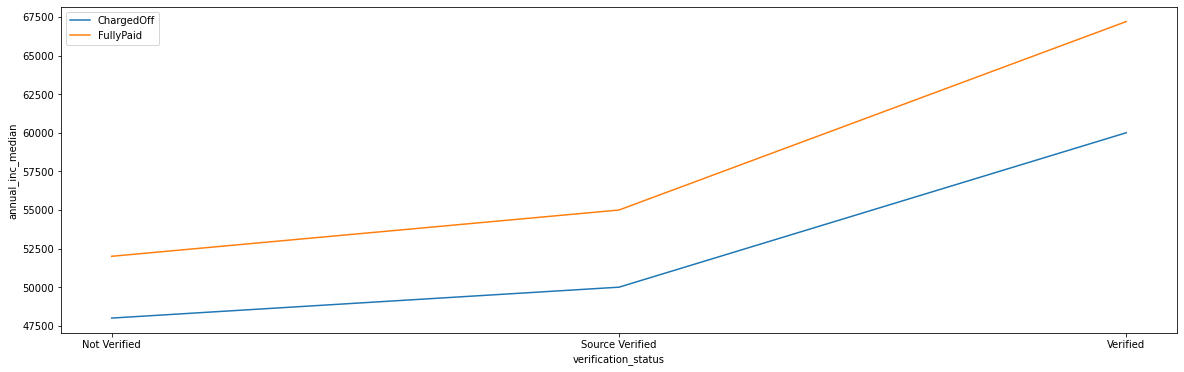

In [185]:
plt.plot(pivot_annInc_veriStatus['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_veriStatus['Fully Paid'], label = 'FullyPaid')
plt.xlabel('verification_status')
plt.ylabel('annual_inc_median')
plt.legend();

In [186]:
## Pivoting the median value of dti income across loan status and verification_status
pivot_dti_veriStatus = df2.pivot_table(values='dti', index='verification_status', columns='loan_status', aggfunc=np.median)
pivot_dti_veriStatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.33,12.92
Source Verified,13.06,12.53
Verified,15.40,14.22


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


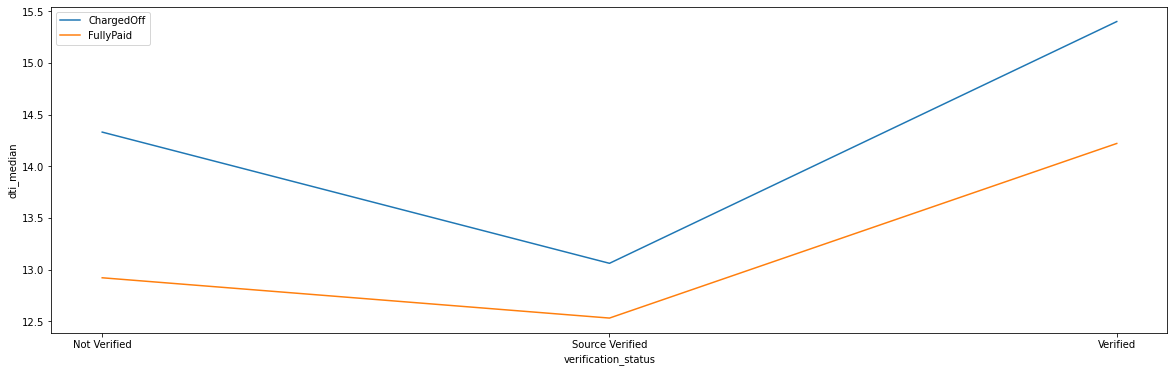

In [187]:
plt.plot(pivot_dti_veriStatus['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_veriStatus['Fully Paid'], label = 'FullyPaid')
plt.xlabel('verification_status')
plt.ylabel('dti_median')
plt.legend();

In [188]:
## Pivoting the median value of revol_bal across loan status and verification_status, with outliers removed for revol_bal
pivot_revolBal_veriStatus = df5.pivot_table(values='revol_bal', index='verification_status', columns='loan_status', aggfunc=np.median)
pivot_revolBal_veriStatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,7761.0,7315.0
Source Verified,7414.0,6967.5
Verified,10529.0,10377.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


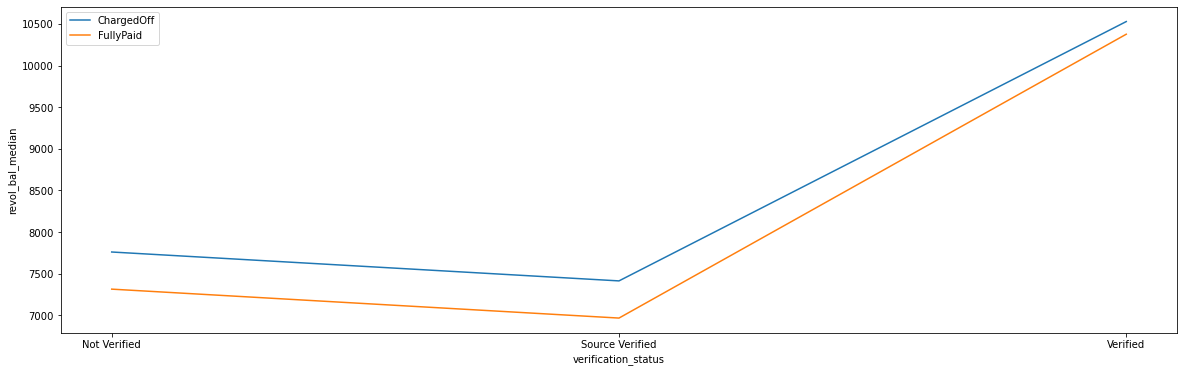

In [189]:
plt.plot(pivot_revolBal_veriStatus['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_veriStatus['Fully Paid'], label = 'FullyPaid')
plt.xlabel('verification_status')
plt.ylabel('revol_bal_median')
plt.legend();

In [190]:
## Pivoting the median value of revol_util across loan status and verification_status
pivot_revolUtil_veriStatus = df2.pivot_table(values='revol_util', index='verification_status', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_veriStatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,56.90,45.1
Source Verified,59.55,48.2
Verified,59.30,50.5


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


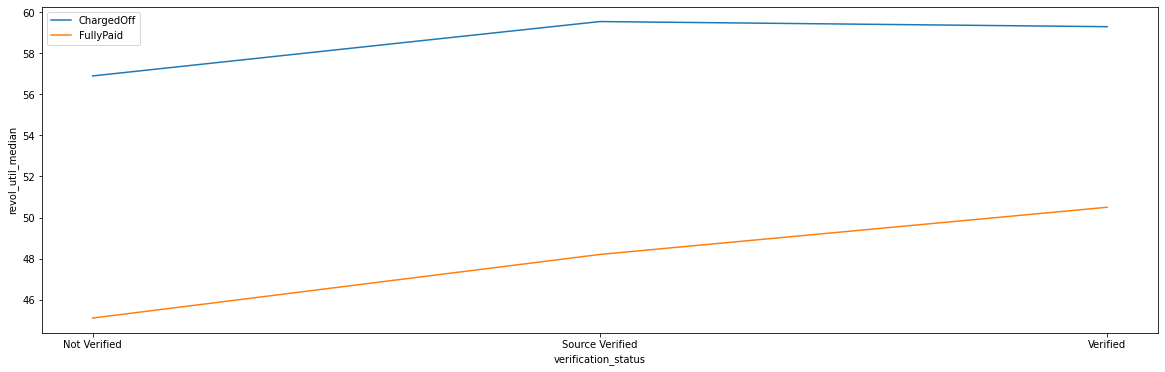

In [191]:
plt.plot(pivot_revolUtil_veriStatus['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_veriStatus['Fully Paid'], label = 'FullyPaid')
plt.xlabel('verification_status')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment is higher for "Verified" and lower for "Not Verified"
- However, the median values of 'loan_amnt', 'annual_inc, 'dti', 'revol_bal' and 'revol_util' differ greately for both segments of loan_status across all the categories of 'verification_status', median value is higher for `Charged Off Segment`
- ‘verification_status’ can be a good indicator, when used with above mentioned variables

**Loan_status vs purpose**

In [192]:
## inspecting the proportion of each purpose counts across loan status segments

ct_status_purpose = pd.crosstab(df2.purpose, df2.loan_status, normalize= 'index', margins=True,)
ct_status_purpose.drop(index=['All'], inplace=True)
ct_status_purpose.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
purpose,,
small_business,0.270810,0.729190
renewable_energy,0.186275,0.813725
educational,0.172308,0.827692
other,0.163777,0.836223
house,0.160763,0.839237
moving,0.159722,0.840278
medical,0.155653,0.844347
debt_consolidation,0.153254,0.846746
vacation,0.141333,0.858667


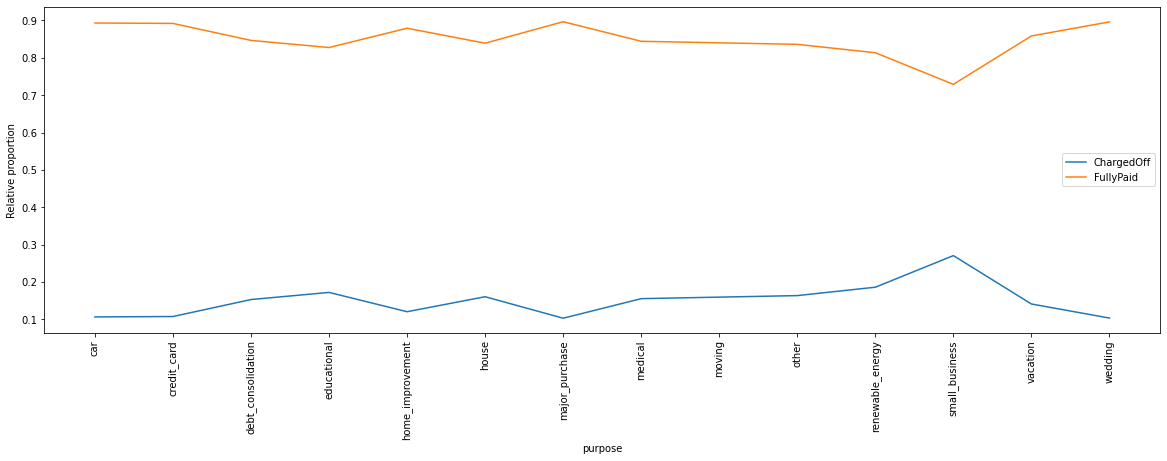

In [193]:
plt.plot(ct_status_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('Relative proportion')
plt.xticks(rotation = 90)
plt.legend();

In [194]:
## Pivoting the median value of loan_amnt across purpose and loan status
pivot_loaAmt_purpose = df2.pivot_table(values='loan_amnt', index='purpose', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,6000,5900
credit_card,12000,10000
debt_consolidation,12000,10800
educational,6000,5000
home_improvement,10000,9600
house,10000,10000
major_purchase,7000,6000
medical,6000,6000
moving,4650,5000


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


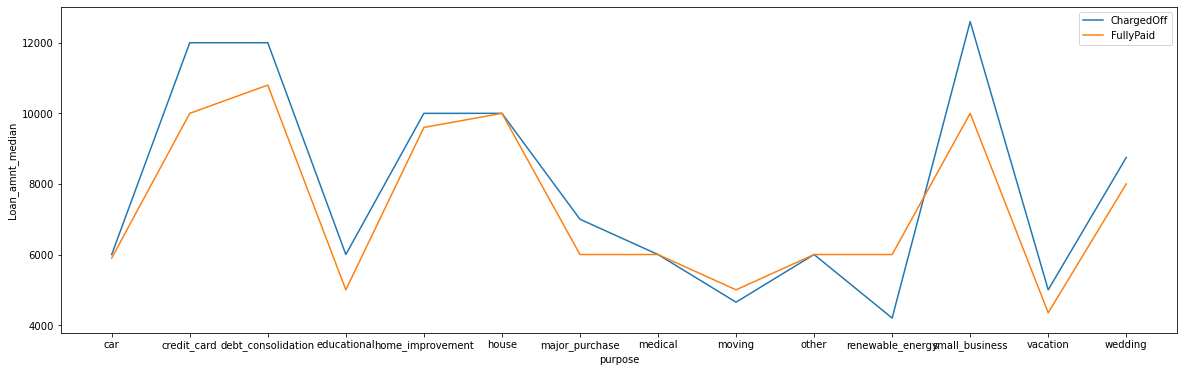

In [195]:
plt.plot(pivot_loaAmt_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [196]:
## Pivoting the median value of annual income across loan status and purpose, with outliers removed for annual_inc
pivot_annInc_purpose = df4.pivot_table(values='annual_inc', index='purpose', columns='loan_status', aggfunc=np.median)
pivot_annInc_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,48000.00,54000.0
credit_card,53450.00,60000.0
debt_consolidation,52528.36,57000.0
educational,39500.00,40800.0
home_improvement,57600.00,68000.0
house,54000.00,60000.0
major_purchase,44500.00,54996.0
medical,52500.00,52000.0
moving,38400.00,50000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


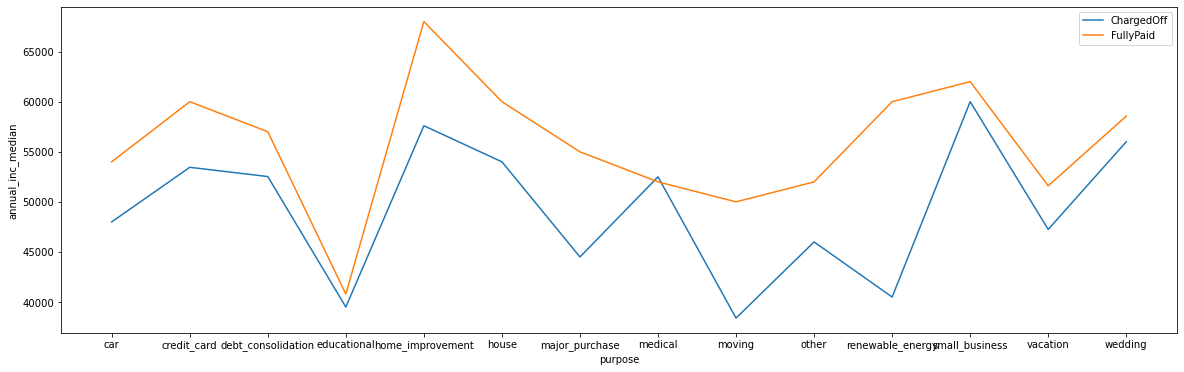

In [197]:
plt.plot(pivot_annInc_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('annual_inc_median')
plt.legend();

In [198]:
## Pivoting the median value of dti income across loan status and purpose
pivot_dti_purpose = df2.pivot_table(values='dti', index='purpose', columns='loan_status', aggfunc=np.median)
pivot_dti_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,11.830,10.470
credit_card,15.935,14.560
debt_consolidation,15.530,14.400
educational,10.775,11.170
home_improvement,11.990,10.400
house,11.350,10.150
major_purchase,11.530,10.225
medical,11.695,12.500
moving,13.595,11.340


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


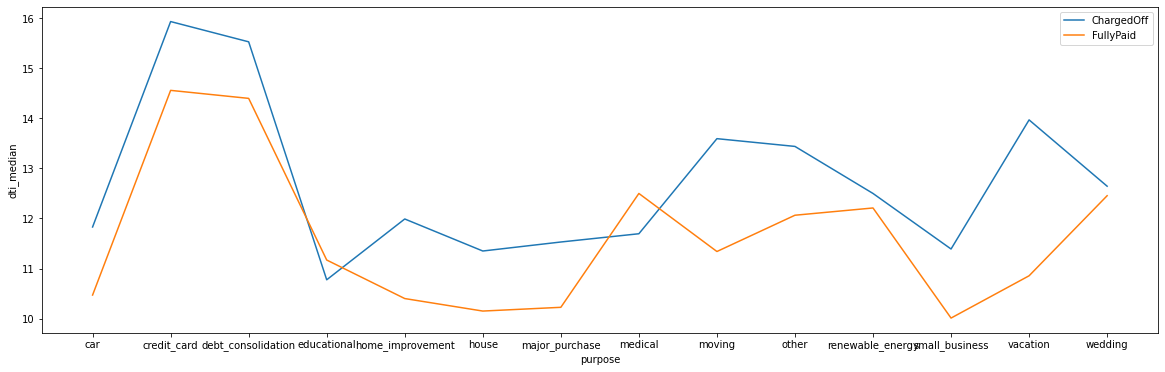

In [199]:
plt.plot(pivot_dti_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('dti_median')
plt.legend();

In [200]:
## Pivoting the median value of revol_bal across loan status and purpose, with outliers removed for revol_bal
pivot_revolBal_purpose = df5.pivot_table(values='revol_bal', index='purpose', columns='loan_status', aggfunc=np.median)
pivot_revolBal_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,4824.0,4504.0
credit_card,12294.0,11708.0
debt_consolidation,9952.0,9866.0
educational,3634.5,3146.0
home_improvement,6796.0,5220.0
house,5737.0,4388.0
major_purchase,3971.0,3868.5
medical,6342.0,4390.0
moving,4159.0,3981.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


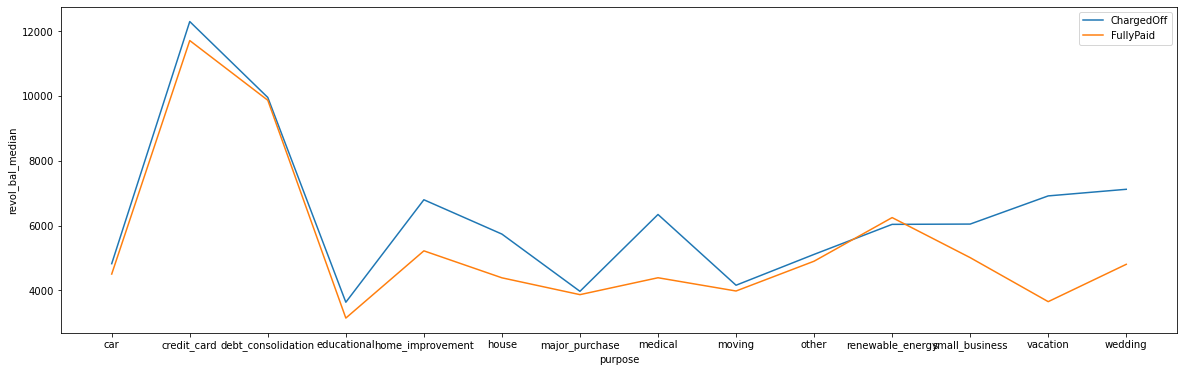

In [201]:
plt.plot(pivot_revolBal_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('revol_bal_median')
plt.legend();

In [202]:
## Pivoting the median value of revol_util across loan status and purpose
pivot_revolUtil_purpose = df2.pivot_table(values='revol_util', index='purpose', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,42.55,29.90
credit_card,64.95,57.60
debt_consolidation,63.00,53.80
educational,47.00,29.80
home_improvement,48.20,29.35
house,56.00,26.25
major_purchase,40.45,29.70
medical,52.45,36.10
moving,52.40,40.05


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


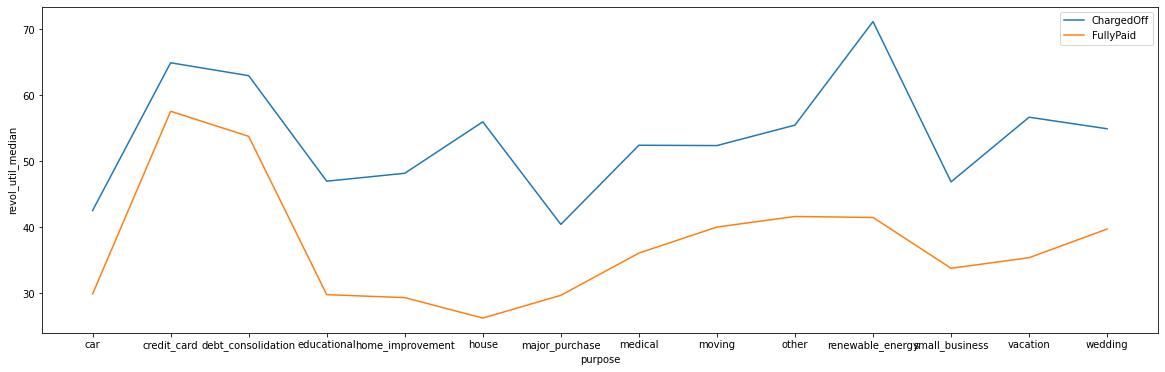

In [203]:
plt.plot(pivot_revolUtil_purpose['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_purpose['Fully Paid'], label = 'FullyPaid')
plt.xlabel('purpose')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment is relatively higher for "small_business" and lower for "wedding" and "major_purchase"
- However, the median values of 'loan_amnt', 'annual_inc, 'dti', 'revol_bal' does not differ significantly across all the categories of 'purpose', 
- The median values of 'revol_util' is higher for charged off segment across all categories of purpose


**Loan_status vs delinq_2yrs**

In [204]:
## inspecting the proportion of each delinq_2yrs counts across loan status segments

ct_status_delinq_2yrs = pd.crosstab(df2.delinq_2yrs, df2.loan_status, normalize= 'index', margins=True,)
ct_status_delinq_2yrs.drop(index=['All'], inplace=True)
ct_status_delinq_2yrs.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
8,0.500000,0.500000
7,0.250000,0.750000
4,0.216667,0.783333
2,0.193165,0.806835
3,0.165094,0.834906
1,0.158092,0.841908
0,0.143547,0.856453
5,0.142857,0.857143
6,0.100000,0.900000


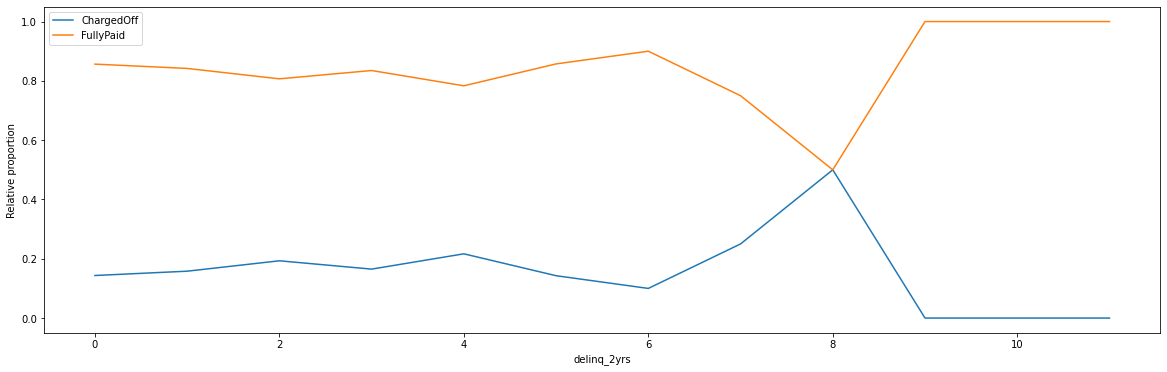

In [205]:
plt.plot(ct_status_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('Relative proportion')
# plt.xticks(rotation = 90)
plt.legend();

In [206]:
## Pivoting the median value of loan_amnt across delinq_2yrs and loan status
pivot_loaAmt_delinq_2yrs = df2.pivot_table(values='loan_amnt', index='delinq_2yrs', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_delinq_2yrs

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,10000.0,9600.0
1,10000.0,8400.0
2,9600.0,8000.0
3,6500.0,8700.0
4,5000.0,8000.0
5,7500.0,6500.0
6,20000.0,4500.0
7,5600.0,8875.0
8,12000.0,4200.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


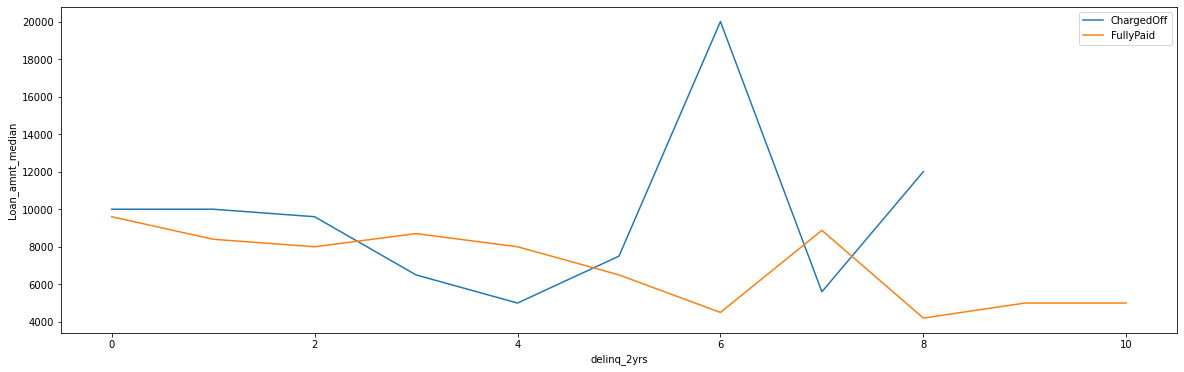

In [207]:
plt.plot(pivot_loaAmt_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [208]:
## Pivoting the median value of annual income across loan status and delinq_2yrs, with outliers removed for annual_inc
pivot_annInc_delinq_2yrs = df4.pivot_table(values='annual_inc', index='delinq_2yrs', columns='loan_status', aggfunc=np.median)
pivot_annInc_delinq_2yrs

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,51600.0,57000.0
1,54996.0,60000.0
2,55600.0,60000.0
3,50000.0,55000.0
4,50000.0,69996.0
5,56800.0,74568.0
6,63820.0,56810.0
7,67200.0,50004.0
8,67200.0,35000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


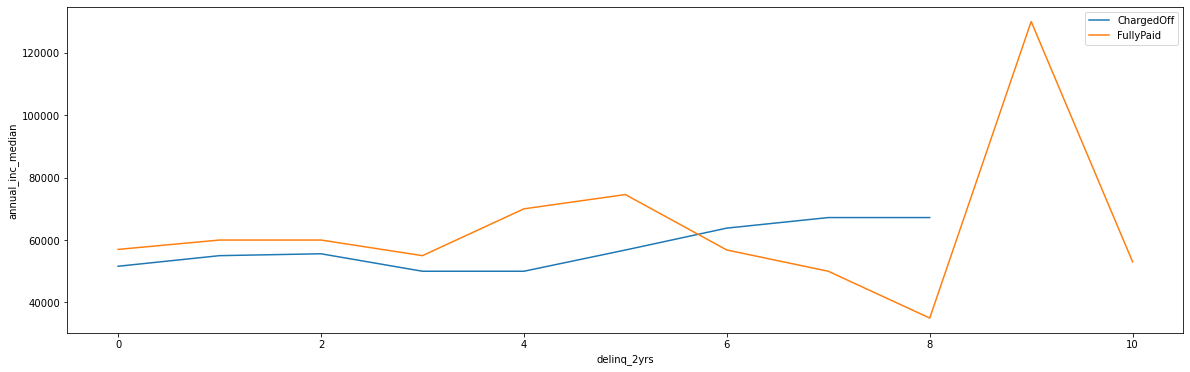

In [209]:
plt.plot(pivot_annInc_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('annual_inc_median')
plt.legend();

In [210]:
## Pivoting the median value of dti income across loan status and delinq_2yrs
pivot_dti_delinq_2yrs = df2.pivot_table(values='dti', index='delinq_2yrs', columns='loan_status', aggfunc=np.median)
pivot_dti_delinq_2yrs

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,14.46,13.270
1,13.20,12.600
2,11.80,11.940
3,11.41,12.360
4,16.10,13.060
5,8.39,11.745
6,2.44,20.900
7,13.54,16.610
8,12.11,9.700


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


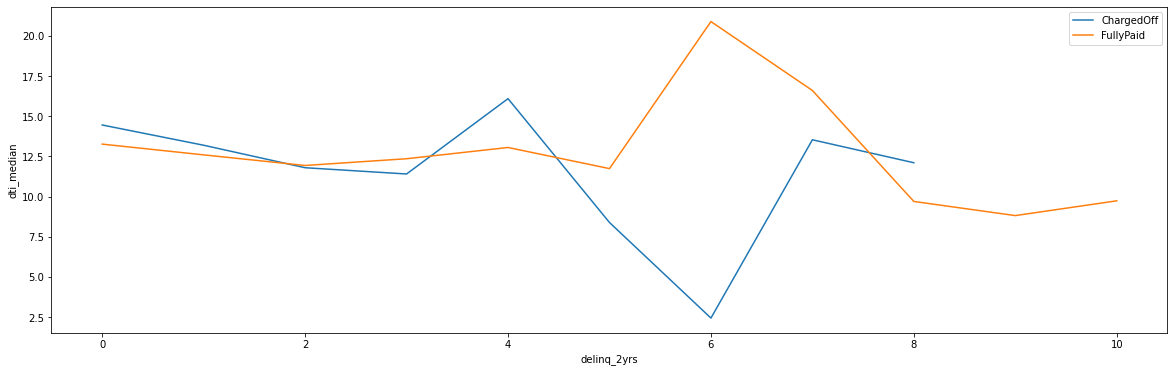

In [211]:
plt.plot(pivot_dti_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('dti_median')
plt.legend();

In [212]:
## Pivoting the median value of revol_bal across loan status and delinq_2yrs, with outliers removed for revol_bal
pivot_revolBal_delinq_2yrs = df5.pivot_table(values='revol_bal', index='delinq_2yrs', columns='loan_status', aggfunc=np.median)
pivot_revolBal_delinq_2yrs

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,8793.0,8179.5
1,6557.0,6491.0
2,4728.5,5464.5
3,2146.0,2958.0
4,1462.0,3025.0
5,721.0,3493.5
6,3042.0,4749.0
7,820.0,1326.0
8,2409.0,478.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


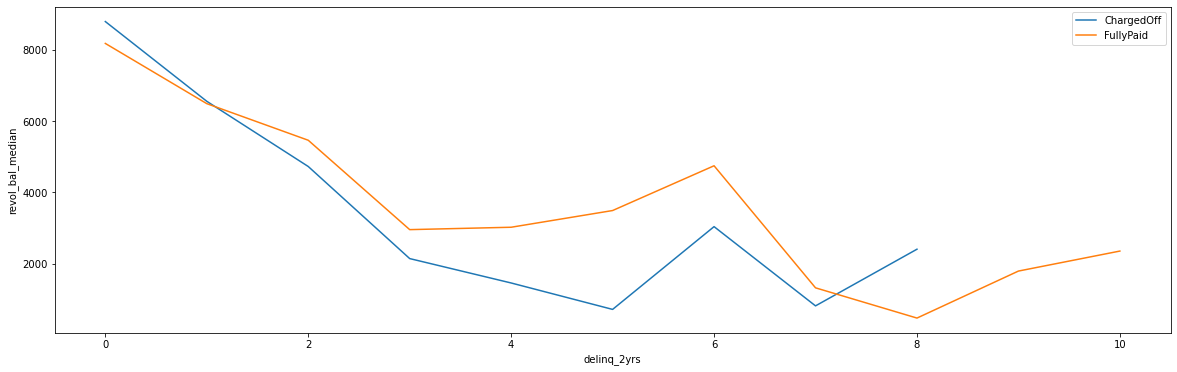

In [213]:
plt.plot(pivot_revolBal_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('revol_bal_median')
plt.legend();

In [214]:
## Pivoting the median value of revol_util across loan status and purpose
pivot_revolUtil_delinq_2yrs = df2.pivot_table(values='revol_util', index='delinq_2yrs', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_delinq_2yrs

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,59.4,48.0
1,50.8,44.9
2,49.1,40.0
3,33.6,36.2
4,48.1,43.2
5,35.0,29.4
6,25.5,31.2
7,7.5,55.3
8,65.1,79.7


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


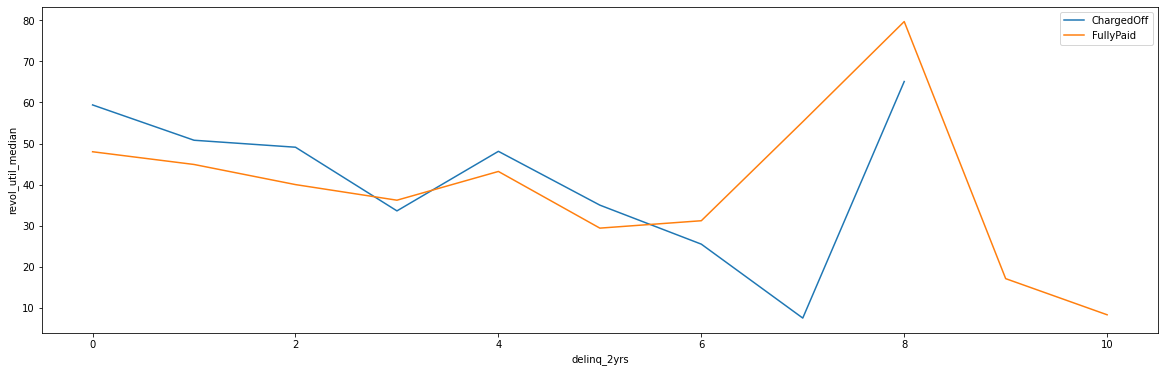

In [215]:
plt.plot(pivot_revolUtil_delinq_2yrs['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_delinq_2yrs['Fully Paid'], label = 'FullyPaid')
plt.xlabel('delinq_2yrs')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment is relatively higher for "8", "7" and "4" nil for "9" and "10"
- However, the median values of 'loan_amnt', 'annual_inc, 'dti', 'revol_bal' and 'revol_util' does not differ significantly across all the categories of 'delinq_2yrs', 
- 'delinq_2yrs', does not look like a driving factor


**Loan_status vs inq_last_6mths**

In [216]:
## inspecting the proportion of each inq_last_6mths counts across loan status segments

ct_status_inq_last_6mths = pd.crosstab(df2.inq_last_6mths, df2.loan_status, normalize= 'index', margins=True,)
ct_status_inq_last_6mths.drop(index=['All'], inplace=True)
ct_status_inq_last_6mths.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
7,0.294118,0.705882
6,0.253968,0.746032
8,0.214286,0.785714
3,0.207509,0.792491
5,0.194444,0.805556
2,0.166785,0.833215
4,0.161392,0.838608
1,0.157317,0.842683
0,0.121866,0.878134


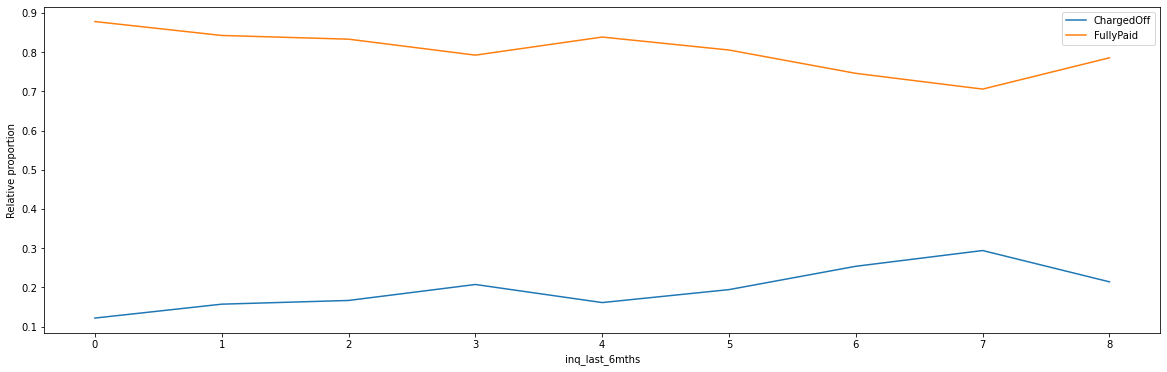

In [217]:
plt.plot(ct_status_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('Relative proportion')
# plt.xticks(rotation = 90)
plt.legend();

In [218]:
## Pivoting the median value of loan_amnt across inq_last_6mths and loan status
pivot_loaAmt_inq_last_6mths = df2.pivot_table(values='loan_amnt', index='inq_last_6mths', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_inq_last_6mths

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,10000,9600
1,10000,9200
2,10000,9600
3,10000,9000
4,12000,11000
5,19125,10000
6,11000,10000
7,15000,9250
8,20000,13800


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


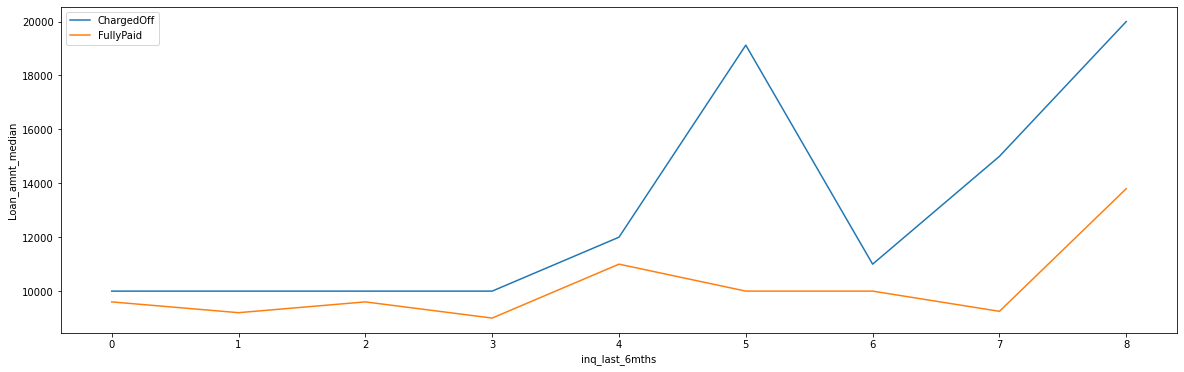

In [219]:
plt.plot(pivot_loaAmt_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [220]:
## Pivoting the median value of annual income across loan status and inq_last_6mths, with outliers removed for annual_inc
pivot_annInc_inq_last_6mths = df4.pivot_table(values='annual_inc', index='inq_last_6mths', columns='loan_status', aggfunc=np.median)
pivot_annInc_inq_last_6mths

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,50000.0,56500.0
1,52000.0,57000.0
2,54000.0,59126.0
3,54000.0,60000.0
4,61200.0,65000.0
5,55444.0,64496.0
6,68000.0,71400.0
7,67500.0,64805.0
8,80000.0,35500.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


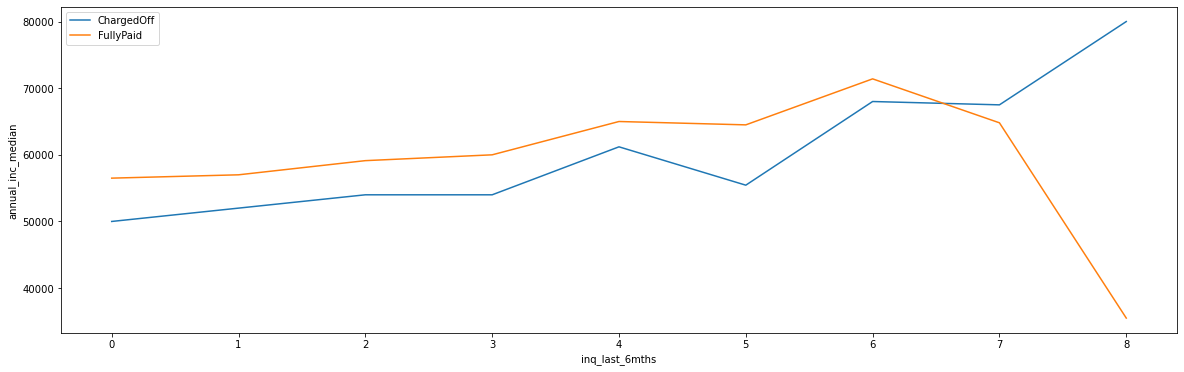

In [221]:
plt.plot(pivot_annInc_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('annual_inc_median')
plt.legend();

In [222]:
## Pivoting the median value of dti income across loan status and inq_last_6mths
pivot_dti_inq_last_6mths = df2.pivot_table(values='dti', index='inq_last_6mths', columns='loan_status', aggfunc=np.median)
pivot_dti_inq_last_6mths

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,14.22,13.030
1,14.49,13.300
2,14.26,13.560
3,14.43,13.555
4,11.81,11.970
5,9.98,11.130
6,12.14,12.590
7,11.98,5.520
8,6.90,9.960


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


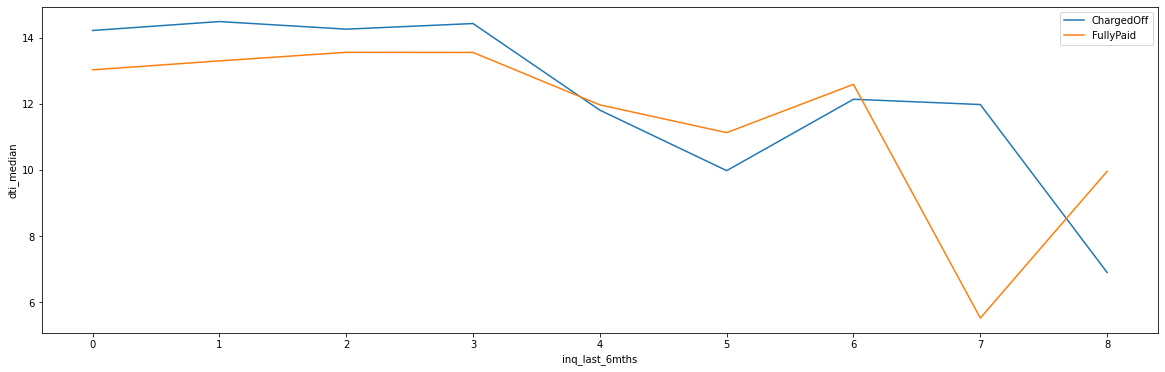

In [223]:
plt.plot(pivot_dti_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('dti_median')
plt.legend();

In [224]:
## Pivoting the median value of revol_bal across loan status and inq_last_6mths, with outliers removed for revol_bal
pivot_revolBal_inq_last_6mths = df5.pivot_table(values='revol_bal', index='inq_last_6mths', columns='loan_status', aggfunc=np.median)
pivot_revolBal_inq_last_6mths

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,8714.0,8100.5
1,8800.0,8095.0
2,7966.0,7787.5
3,8063.0,7193.5
4,2917.0,6208.0
5,8146.5,4698.5
6,1274.0,5063.0
7,8317.5,2245.0
8,264.0,7998.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


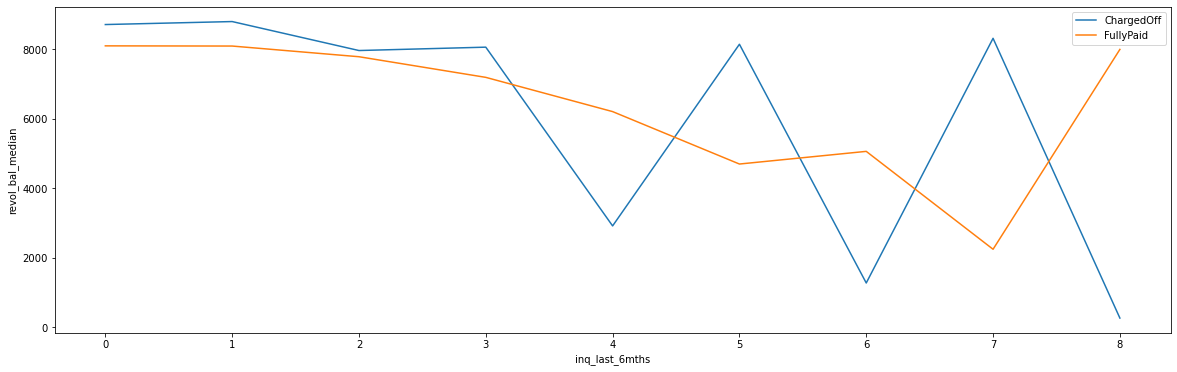

In [225]:
plt.plot(pivot_revolBal_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('revol_bal_median')
plt.legend();

In [226]:
## Pivoting the median value of revol_util across loan status and inq_last_6mths
pivot_revolUtil_inq_last_6mths = df2.pivot_table(values='revol_util', index='inq_last_6mths', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_inq_last_6mths

loan_status,Charged Off,Fully Paid
inq_last_6mths,,
0,62.00,48.80
1,57.90,48.20
2,57.40,46.40
3,53.80,45.05
4,14.70,23.40
5,27.35,19.80
6,14.95,21.00
7,37.75,15.35
8,1.10,13.50


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


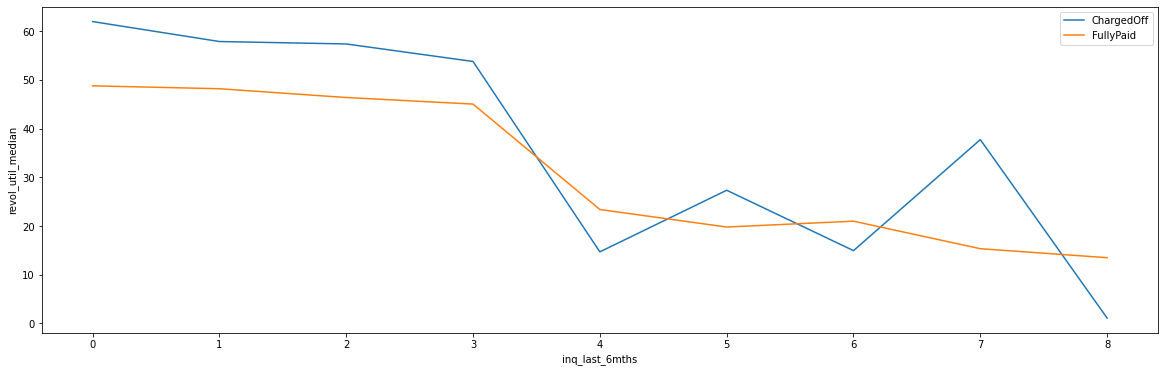

In [227]:
plt.plot(pivot_revolUtil_inq_last_6mths['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_inq_last_6mths['Fully Paid'], label = 'FullyPaid')
plt.xlabel('inq_last_6mths')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- Relative proportion of Charged Off segment is relatively higher for "7", "6" and low for "0"
- However, the median values of 'annual_inc, 'dti', 'revol_bal' and 'revol_util' does not differ significantly across all the categories of 'inq_last_6mths', 
- The median value for 'loan_amnt' is higher for Charged off segment across all the categories of 'inq_last_6mths'
- 'inq_last_6mths', can be driving factor but not a major one


**Loan_status vs open_acc**

In [228]:
df2.open_acc.unique()

[3, 2, 10, 9, 7, ..., 36, 38, 44, 41, 42]
Length: 40
Categories (40, int64): [2, 3, 4, 5, ..., 39, 41, 42, 44]

In [229]:
## creating new segments for open_acc

bins = [-np.inf, 10, 20, 30, 40, np.inf]
df2['binned_open_acc'] = pd.cut(df2.open_acc, bins, labels=['<10', '10-20', '20-30', '30-40', '40+'])

In [230]:
## inspecting the proportion of each open_acc counts across loan status segments

ct_status_open_acc = pd.crosstab(df2.binned_open_acc, df2.loan_status, normalize= 'index', margins=True,)
ct_status_open_acc.drop(index=['All'], inplace=True)
ct_status_open_acc.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
binned_open_acc,,
30-40,0.307692,0.692308
20-30,0.155492,0.844508
<10,0.147689,0.852311
10-20,0.141109,0.858891
40+,0.000000,1.000000


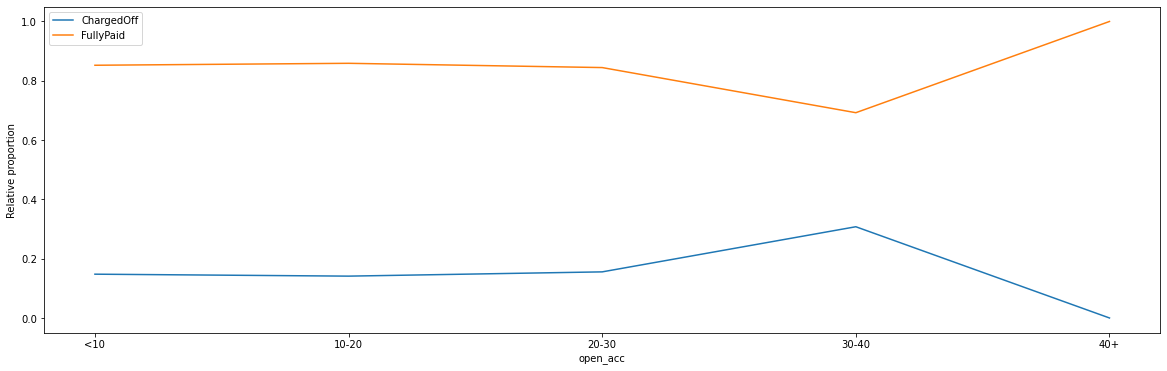

In [231]:
plt.plot(ct_status_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('Relative proportion')
# plt.xticks(rotation = 90)
plt.legend();

In [232]:
## Pivoting the median value of loan_amnt across open_acc and loan status
pivot_loaAmt_open_acc = df2.pivot_table(values='loan_amnt', index='binned_open_acc', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_open_acc

loan_status,Charged Off,Fully Paid
binned_open_acc,,
<10,9600.0,8400.0
10-20,12000.0,10000.0
20-30,13650.0,11000.0
30-40,7000.0,10000.0
40+,NaN,7000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


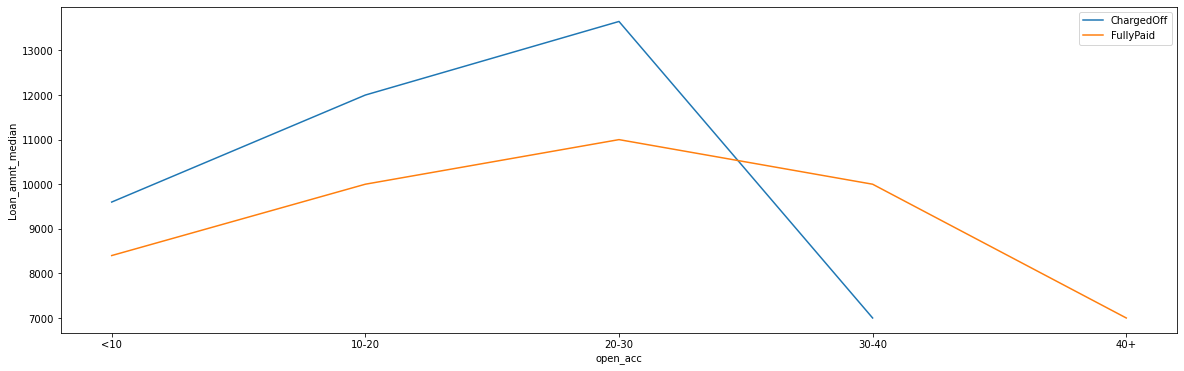

In [233]:
plt.plot(pivot_loaAmt_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [234]:
## Pivoting the median value of annual income across loan status and open_acc, with outliers removed for annual_inc
pivot_annInc_open_acc = df2.pivot_table(values='annual_inc', index='binned_open_acc', columns='loan_status', aggfunc=np.median)
pivot_annInc_open_acc

loan_status,Charged Off,Fully Paid
binned_open_acc,,
<10,48422.0,54000.0
10-20,63000.0,70000.0
20-30,68000.0,75000.0
30-40,62450.0,72500.0
40+,NaN,75000.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


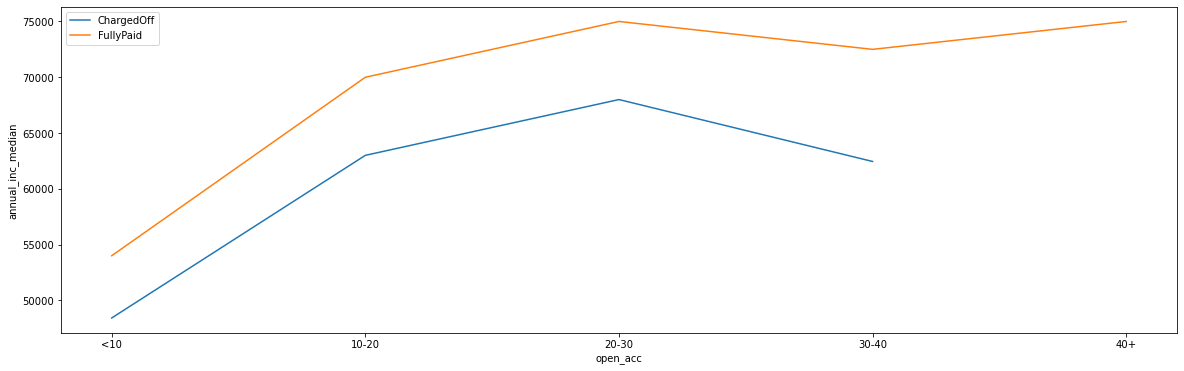

In [235]:
plt.plot(pivot_annInc_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('annual_inc_median')
plt.legend();

In [236]:
## Pivoting the median value of dti income across loan status and open_acc
pivot_dti_open_acc = df2.pivot_table(values='dti', index='binned_open_acc', columns='loan_status', aggfunc=np.median)
pivot_dti_open_acc

loan_status,Charged Off,Fully Paid
binned_open_acc,,
<10,13.05,11.840
10-20,16.61,15.490
20-30,17.49,16.950
30-40,17.13,13.765
40+,NaN,2.540


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


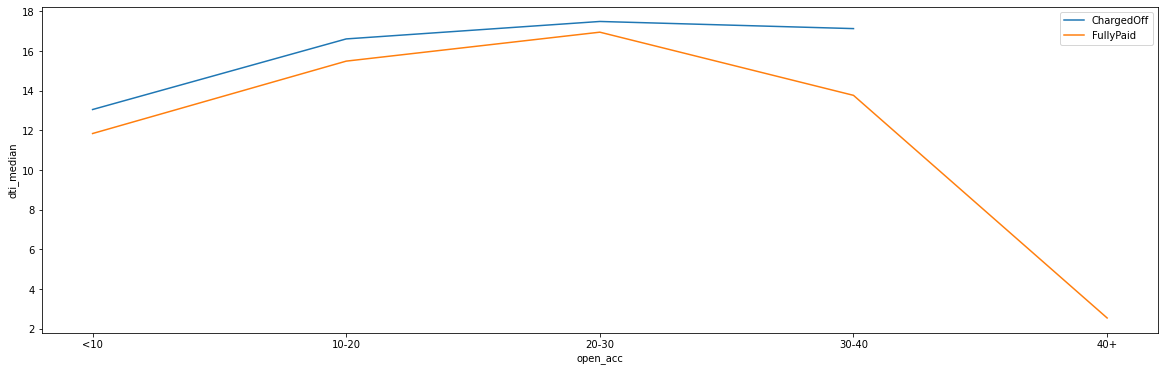

In [237]:
plt.plot(pivot_dti_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('dti_median')
plt.legend();

In [238]:
## Pivoting the median value of revol_bal across loan status and open_acc, with outliers removed for revol_bal
pivot_revolBal_open_acc = df2.pivot_table(values='revol_bal', index='binned_open_acc', columns='loan_status', aggfunc=np.median)
pivot_revolBal_open_acc

loan_status,Charged Off,Fully Paid
binned_open_acc,,
<10,7122.0,6800.0
10-20,14209.0,13090.0
20-30,17732.0,15917.5
30-40,9446.0,11140.5
40+,NaN,6094.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


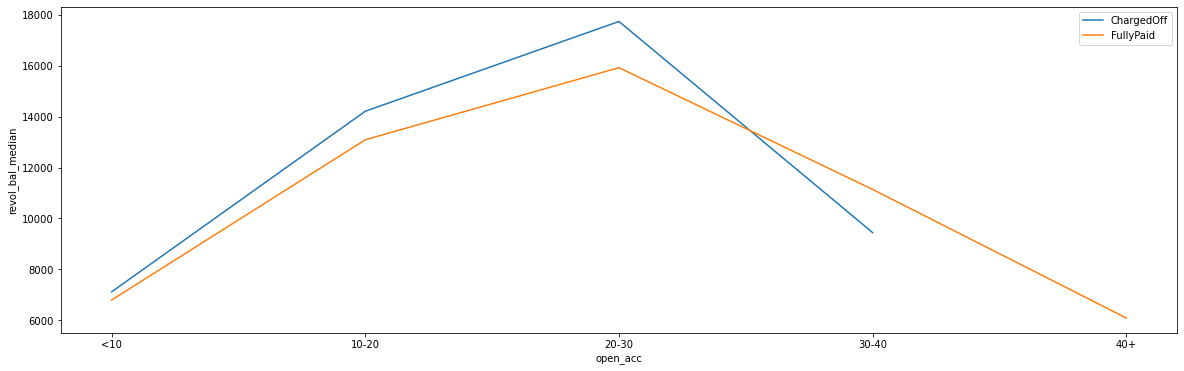

In [239]:
plt.plot(pivot_revolBal_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('revol_bal_median')
plt.legend();

In [240]:
## Pivoting the median value of revol_util across loan status and open_acc
pivot_revolUtil_open_acc = df2.pivot_table(values='revol_util', index='binned_open_acc', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_open_acc

loan_status,Charged Off,Fully Paid
binned_open_acc,,
<10,60.7,49.80
10-20,54.1,43.90
20-30,50.7,34.80
30-40,48.4,29.55
40+,NaN,2.80


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


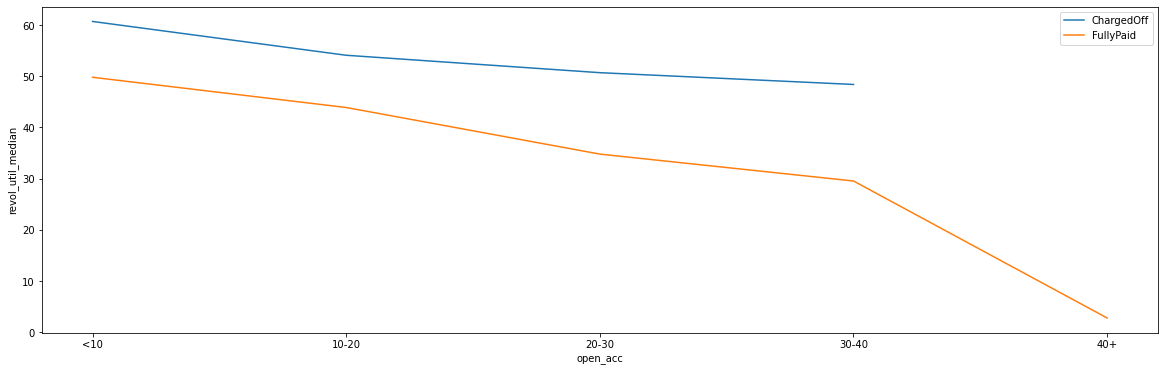

In [241]:
plt.plot(pivot_revolUtil_open_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_open_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('open_acc')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- 'open_acc' had 40 different categories, we have binned thouse 40 into 5 groupd - 0-10, 10-20, 20-30, 30-40 and 40+
- After binning, the group 30-40 open_acc has high Charge off propotion relatively to other segments
- The median values of 'annual_inc', 'dti', and 'revol_util' for Charge off segment is higher
- open_acc after binning can be a driving factor but not a strong indicator

**Loan_status vs pub_rec**

In [242]:
df2.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [243]:
## Creating 2 categories by combining category 4, 3, 2, with 1 and retaining category 0 as is
df2['pub_rec'] = df2.pub_rec.apply(lambda x : 1 if(x!=0) else 0)
df2.pub_rec.value_counts()

0    36507
1     2070
Name: pub_rec, dtype: int64

In [244]:
## inspecting the proportion of each pub_rec counts across loan status segments

ct_status_pub_rec = pd.crosstab(df2.pub_rec, df2.loan_status, normalize= 'index', margins=True,)
ct_status_pub_rec.drop(index=['All'], inplace=True)
ct_status_pub_rec.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
pub_rec,,
1,0.225604,0.774396
0,0.141343,0.858657


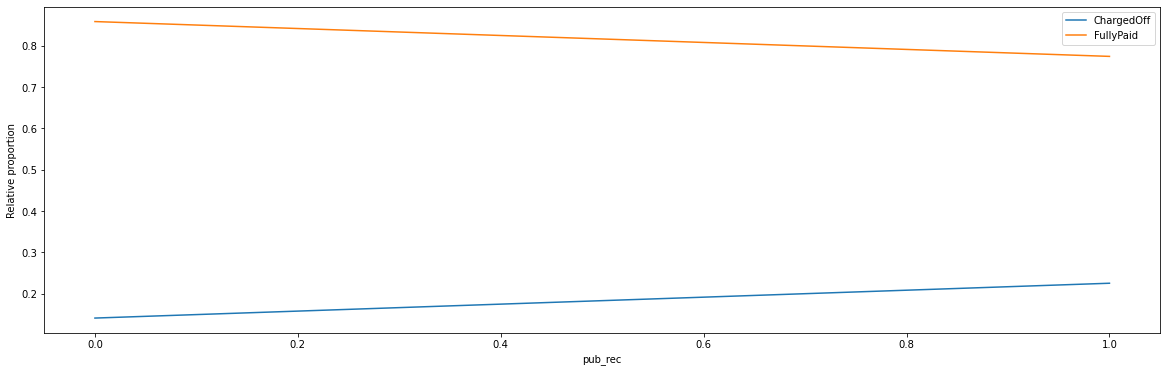

In [245]:
plt.plot(ct_status_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('Relative proportion')
# plt.xticks(rotation = 90)
plt.legend();

In [246]:
## Pivoting the median value of loan_amnt across pub_rec and loan status
pivot_loaAmt_pub_rec = df2.pivot_table(values='loan_amnt', index='pub_rec', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,10000,9600
1,10000,8000


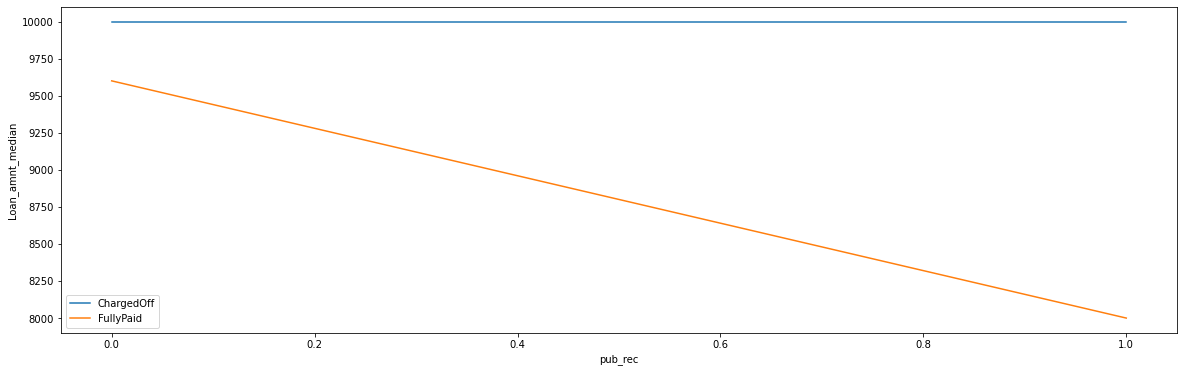

In [247]:
plt.plot(pivot_loaAmt_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [248]:
## Pivoting the median value of annual income across loan status and pub_rec, with outliers removed for annual_inc
pivot_annInc_pub_rec = df2.pivot_table(values='annual_inc', index='pub_rec', columns='loan_status', aggfunc=np.median)
pivot_annInc_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,53000.0,60000.0
1,55000.0,57600.0


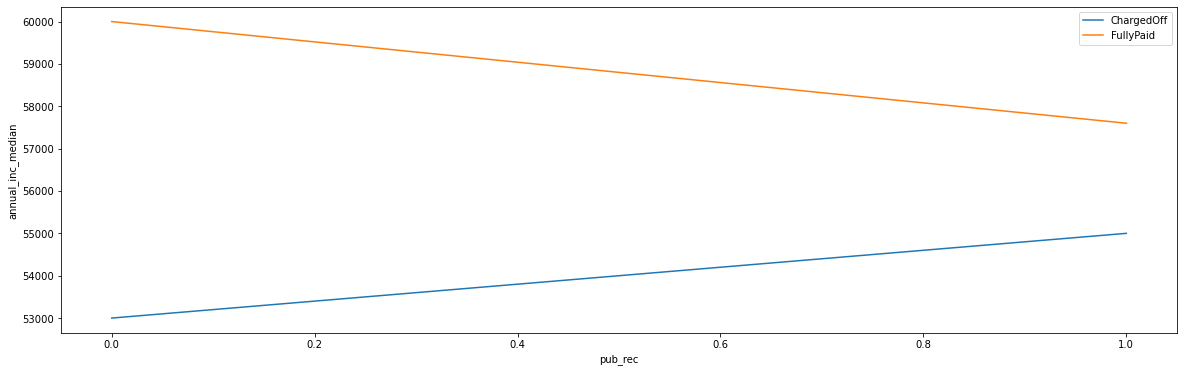

In [249]:
plt.plot(pivot_annInc_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('annual_inc_median')
plt.legend();

In [250]:
## Pivoting the median value of dti income across loan status and pub_rec
pivot_dti_pub_rec = df2.pivot_table(values='dti', index='pub_rec', columns='loan_status', aggfunc=np.median)
pivot_dti_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,14.30,13.20
1,14.29,13.08


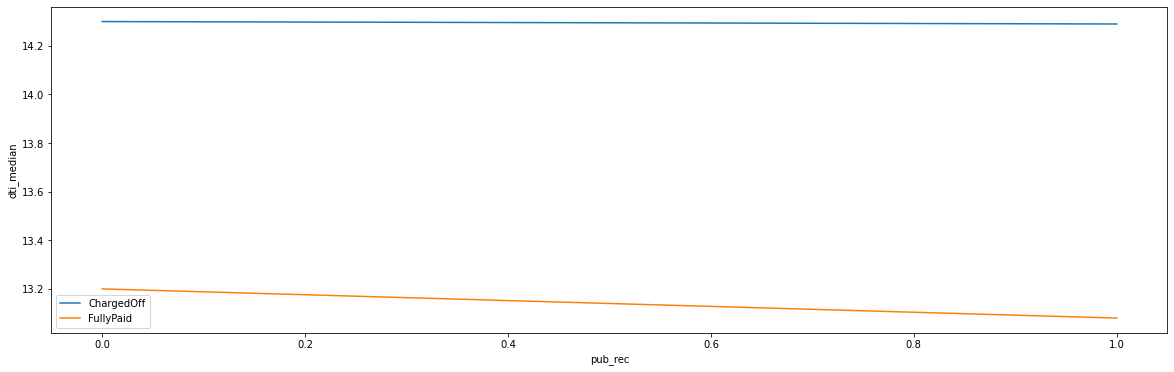

In [251]:
plt.plot(pivot_dti_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('dti_median')
plt.legend();

In [252]:
## Pivoting the median value of revol_bal across loan status and pub_rec, with outliers removed for revol_bal
pivot_revolBal_pub_rec = df2.pivot_table(values='revol_bal', index='pub_rec', columns='loan_status', aggfunc=np.median)
pivot_revolBal_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,9350,8817
1,8043,6905


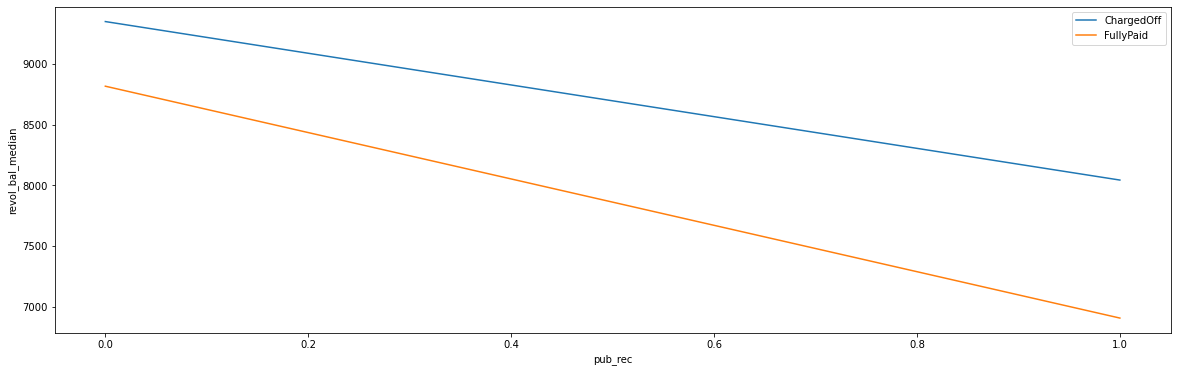

In [253]:
plt.plot(pivot_revolBal_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('revol_bal_median')
plt.legend();

In [254]:
## Pivoting the median value of revol_util across loan status and pub_rec
pivot_revolUtil_pub_rec = df2.pivot_table(values='revol_util', index='pub_rec', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,57.6,47.1
1,65.1,55.9


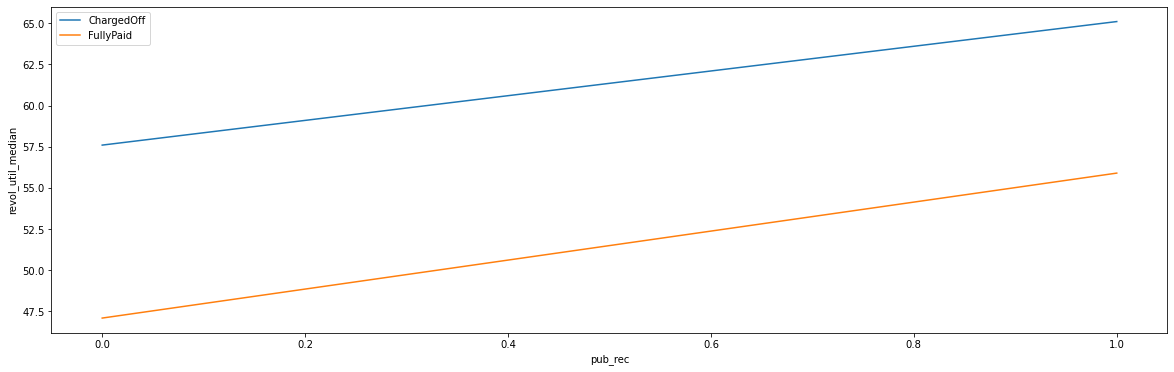

In [255]:
plt.plot(pivot_revolUtil_pub_rec['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_pub_rec['Fully Paid'], label = 'FullyPaid')
plt.xlabel('pub_rec')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- 'pub_rec' had 5 different categories, we have created 2 categories out of it, 0 and 1, 1 is created by combining 1, 2, 3 & 4 categories, as they had very small representations  
- After combining the category 1 has the high proportion of Charge Off
- The median values of 'loan_amt', 'annual_inc', 'dti', 'revol_bal' and 'revol_util' for Charge off segment is higher
- pub_rec after re-grouping can be a driving factor

**Loan_status vs pub_rec_bankruptcies**

In [256]:
df2.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [257]:
## Creating 2 categories by combining category 1 and 2 and retaining category 0 as is
df2['pub_rec_bankruptcies'] = df2.pub_rec_bankruptcies.apply(lambda x : 1 if(x!=0) else 0)
df2.pub_rec_bankruptcies.value_counts()

0    36935
1     1642
Name: pub_rec_bankruptcies, dtype: int64

In [258]:
## inspecting the proportion of each pub_rec_bankruptcies counts across loan status segments

ct_status_pub_rec_bankruptcies = pd.crosstab(df2.pub_rec_bankruptcies, df2.loan_status, normalize= 'index', margins=True,)
ct_status_pub_rec_bankruptcies.drop(index=['All'], inplace=True)
ct_status_pub_rec_bankruptcies.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
1,0.224117,0.775883
0,0.142385,0.857615


In [259]:
## Pivoting the median value of loan_amnt across pub_rec_bankruptcies and loan status
pivot_loaAmt_pub_rec_bankruptcies = df2.pivot_table(values='loan_amnt', index='pub_rec_bankruptcies', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,10000,9600
1,10000,8000


In [260]:
## Pivoting the median value of annual income across loan status and pub_rec_bankruptcies, with outliers removed for annual_inc
pivot_annInc_pub_rec_bankruptcies = df2.pivot_table(values='annual_inc', index='pub_rec_bankruptcies', columns='loan_status', aggfunc=np.median)
pivot_annInc_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,53000.0,60000.0
1,56000.0,58000.0


In [261]:
## Pivoting the median value of dti income across loan status and pub_rec_bankruptcies
pivot_dti_pub_rec_bankruptcies = df2.pivot_table(values='dti', index='pub_rec_bankruptcies', columns='loan_status', aggfunc=np.median)
pivot_dti_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,14.28,13.19
1,14.55,13.41


In [262]:
## Pivoting the median value of revol_bal across loan status and pub_rec_bankruptcies, with outliers removed for revol_bal
pivot_revolBal_pub_rec_bankruptcies = df2.pivot_table(values='revol_bal', index='pub_rec_bankruptcies', columns='loan_status', aggfunc=np.median)
pivot_revolBal_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,9273.0,8774.0
1,8682.5,7255.5


In [263]:
## Pivoting the median value of revol_util across loan status and pub_rec_bankruptcies
pivot_revolUtil_pub_rec_bankruptcies = df2.pivot_table(values='revol_util', index='pub_rec_bankruptcies', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,57.6,47.2
1,66.7,57.2


**Observations**
- 'pub_rec_bankruptcies' had 3 different categories, we have created 2 categories out of it, 0 and 1, 1 is created by combining 1, and 2 categories, as they had very small representations  
- After combining the category 1 has the high proportion of Charge Off
- The median values of 'loan_amt', 'annual_inc', 'dti', 'revol_bal' and 'revol_util' for Charge off segment is higher
- pub_rec_bankruptcies after re-grouping can be a driving factor

**Loan_status vs total_acc**

In [264]:
df2.total_acc.unique()

[9, 4, 10, 37, 12, ..., 73, 70, 68, 65, 2]
Length: 82
Categories (82, int64): [2, 3, 4, 5, ..., 80, 81, 87, 90]

In [265]:
## creating new segments for total_acc

bins = [-np.inf, 20, 40, 60, np.inf]
df2['binned_total_acc'] = pd.cut(df2.total_acc, bins, labels=['<20', '20-40', '40-60', '60>'])

In [266]:
## inspecting the proportion of each total_acc counts across loan status segments

ct_status_total_acc = pd.crosstab(df2.binned_total_acc, df2.loan_status, normalize= 'index', margins=True,)
ct_status_total_acc.drop(index=['All'], inplace=True)
ct_status_total_acc.sort_values(by = 'Charged Off', ascending= False)

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,0.153716,0.846284
40-60,0.139099,0.860901
20-40,0.137820,0.862180
60>,0.126214,0.873786


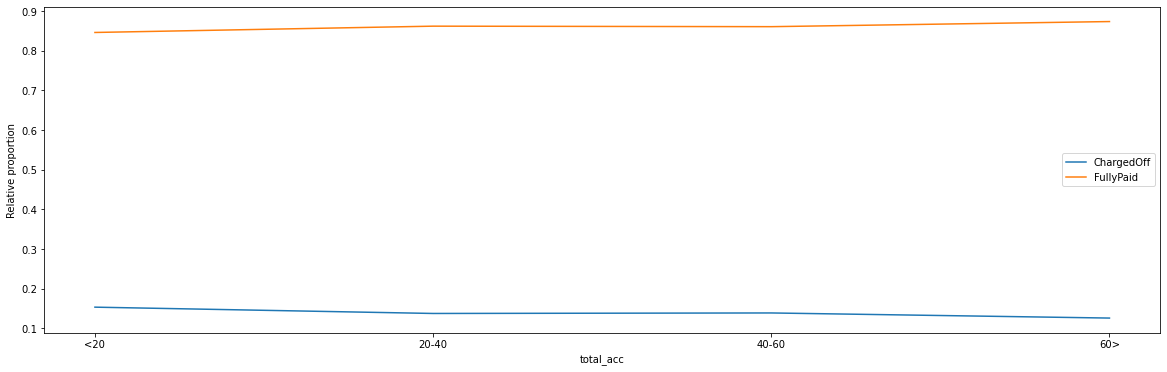

In [267]:
plt.plot(ct_status_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(ct_status_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('Relative proportion')
# plt.xticks(rotation = 90)
plt.legend();

In [268]:
## Pivoting the median value of loan_amnt across total_acc and loan status
pivot_loaAmt_total_acc = df2.pivot_table(values='loan_amnt', index='binned_total_acc', columns='loan_status', aggfunc=np.median)
pivot_loaAmt_total_acc

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,8200,8000
20-40,12000,10000
40-60,15000,12000
60>,15125,12000


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


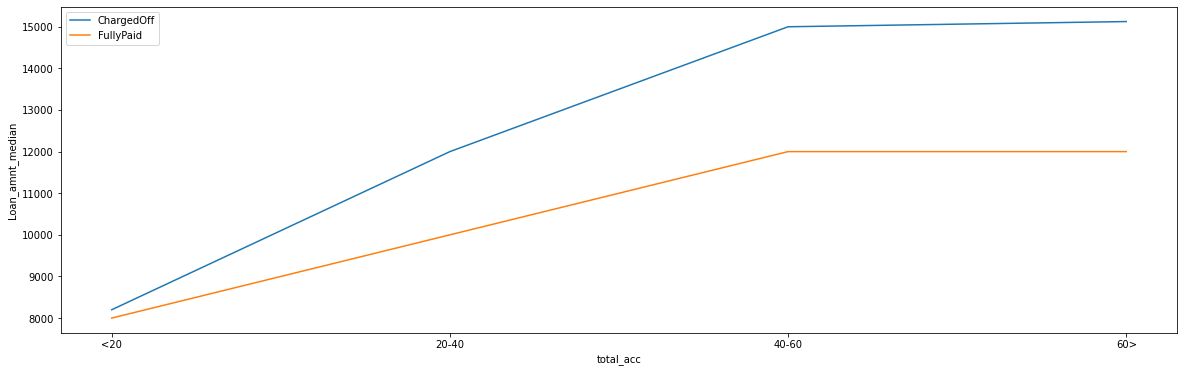

In [269]:
plt.plot(pivot_loaAmt_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_loaAmt_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('Loan_amnt_median')
plt.legend();

In [270]:
## Pivoting the median value of annual income across loan status and total_acc, with outliers removed for annual_inc
pivot_annInc_total_acc = df2.pivot_table(values='annual_inc', index='binned_total_acc', columns='loan_status', aggfunc=np.median)
pivot_annInc_total_acc

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,44400.00,49000.0
20-40,60000.00,69295.0
40-60,74551.92,84000.0
60>,83000.00,86202.0


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


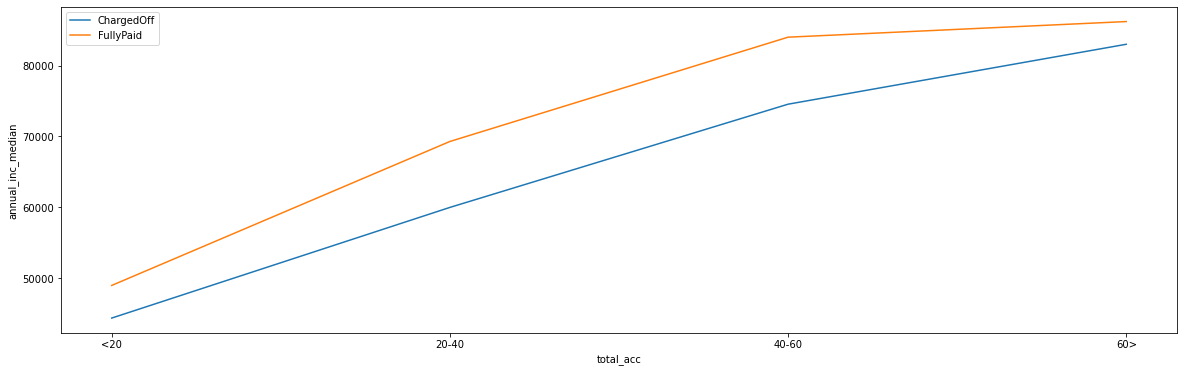

In [271]:
plt.plot(pivot_annInc_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_annInc_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('annual_inc_median')
plt.legend();

In [272]:
## Pivoting the median value of dti income across loan status and total_acc
pivot_dti_total_acc = df2.pivot_table(values='dti', index='binned_total_acc', columns='loan_status', aggfunc=np.median)
pivot_dti_total_acc

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,12.56,11.64
20-40,16.05,14.47
40-60,16.89,15.70
60>,19.84,15.52


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


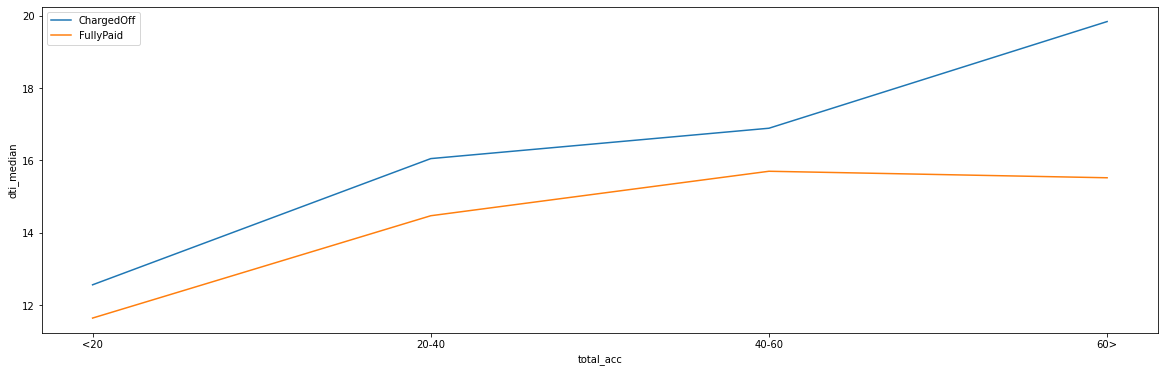

In [273]:
plt.plot(pivot_dti_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_dti_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('dti_median')
plt.legend();

In [274]:
## Pivoting the median value of revol_bal across loan status and total_acc, with outliers removed for revol_bal
pivot_revolBal_total_acc = df2.pivot_table(values='revol_bal', index='binned_total_acc', columns='loan_status', aggfunc=np.median)
pivot_revolBal_total_acc

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,6148.0,6123.5
20-40,13385.0,11755.5
40-60,18146.0,15979.0
60>,22578.5,16520.5


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


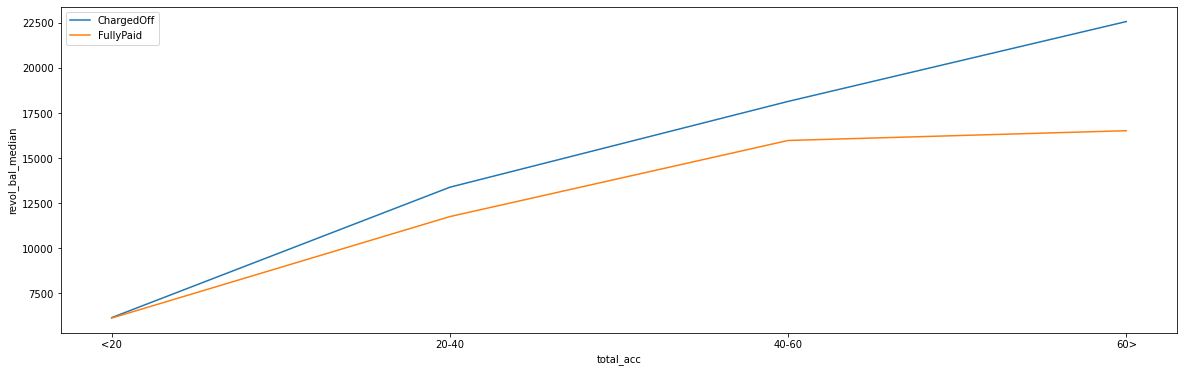

In [275]:
plt.plot(pivot_revolBal_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolBal_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('revol_bal_median')
plt.legend();

In [276]:
## Pivoting the median value of revol_util across loan status and total_acc
pivot_revolUtil_total_acc = df2.pivot_table(values='revol_util', index='binned_total_acc', columns='loan_status', aggfunc=np.median)
pivot_revolUtil_total_acc

loan_status,Charged Off,Fully Paid
binned_total_acc,,
<20,59.90,49.7
20-40,57.50,46.4
40-60,54.00,40.8
60>,55.95,33.3


C:\Users\dhana\anaconda3\envs\MS\lib\site-packages\matplotlib\axes\_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


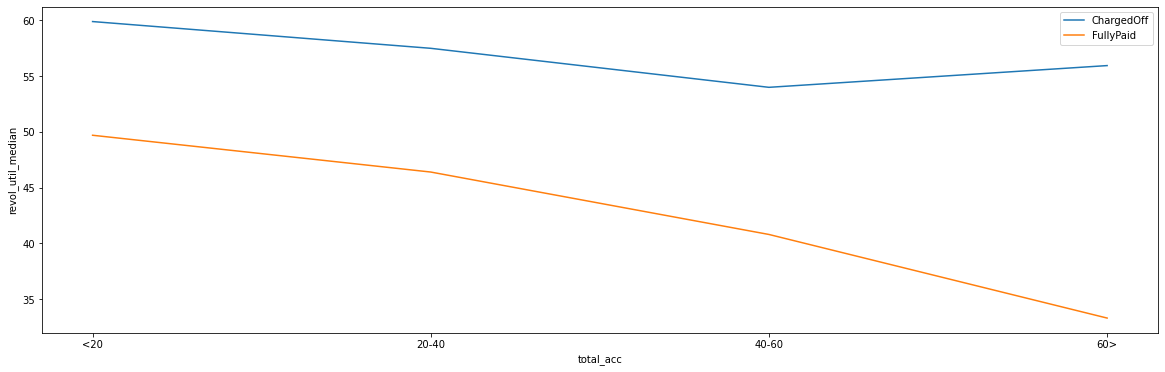

In [277]:
plt.plot(pivot_revolUtil_total_acc['Charged Off'], label = 'ChargedOff')
plt.plot(pivot_revolUtil_total_acc['Fully Paid'], label = 'FullyPaid')
plt.xlabel('total_acc')
plt.ylabel('revol_util_median')
plt.legend();

**Observations**
- 'total_acc' had 82 different categories, we have binned thouse into 4 groupd - 0-20, 20-40, 40-60 and 60+
- After binning, proportion of Charged off to Fully paid is constant across 4 groups
- The median values of 'loan_amnt', 'annual_inc', 'dti', 'revol_bal' and 'revol_util' for Charge off segment is higher
- total_acc after binning can be a driving factor

### Conclusions

- Continuous values like – ‘loan_amnt’, ‘dti’, ‘revol_bal’ and ‘revol_util’, have clear higher median values for Charge Off and lower median values for Fully Paid
- ‘annual_inc’, has clear higher median value for Fully paid and lower median value for Charge Off
- However, continuous variables on their own has less power to distinguish between risky application vs non-risky application. But when used along with categorical variables like ‘emp_lenght’, ‘verification-status’, they are good indicator of risky application
- This holds same for categorical variables, hence propose the use of categorical variables along with continuous variable to classify risky application
- From our analysis we propose these variables are driving variables that are indicators of risky application;
    - Continuous variables;
        - loan_amt, annual_inc, dti, revol_bal, revol_util
        
    - Categorical variables;
        - emp_length, Verification_status, pub_rec (regrouped), Pub_rec_bankruptcies (regrouped), total_acc (binned), grade, open_acc